In [1]:
import time as time
import json
import numpy as np
from collections import defaultdict
import itertools
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
!pwd

/home/wzy/ultralytics/tools/coco_demo


In [136]:
img=Image.open('/home/wzy/ultralytics/data/coco8-seg/images/train/000000000030.jpg')
lis="0.616156 0.364042 0.631188 0.395514 0.631188 0.462921 0.608641 0.561799 0.569562 0.602243 0.551531 0.653925 0.544016 0.676402 0.554531 0.710117 0.581594 0.730327 0.599625 0.755047 0.581594 0.793248 0.510953 0.817967 0.462859 0.820234 0.422297 0.788762 0.417781 0.773037 0.416281 0.764042 0.456859 0.728084 0.461359 0.638201 0.438812 0.606752 0.39975 0.548318 0.371188 0.447196 0.407266 0.510117 0.446328 0.489883 0.498937 0.480888 0.516969 0.460678 0.528984 0.408995 0.545516 0.397757 0.586094 0.386519 0.578578 0.431472 0.587594 0.429206 0.596609 0.4 0.608641 0.37528 0.614656 0.368528"
lis=lis.split(" ")

lis=[float(lis[i])*img.width if i%2==0 else float(lis[i])*img.height for i in range(len(lis))]
print(lis)
# lis=[float(i) for i in lis]
plots=[]
for i in range(0,len(lis),2):
    plots.append((lis[i],lis[i+1]))
print(plots)


[394.33984000000004, 155.80997599999998, 403.96031999999997, 169.279992, 403.96031999999997, 198.130188, 389.53024, 240.44997200000003, 364.51968, 257.760004, 352.97983999999997, 279.87989999999996, 348.17024000000004, 289.500056, 354.89984, 303.930076, 372.22016, 312.579956, 383.76, 323.160116, 372.22016, 339.51014399999997, 327.00991999999997, 350.089876, 296.22976, 351.060152, 270.27008, 337.590136, 267.37984, 330.859836, 266.41984, 327.009976, 292.38976, 311.61995199999996, 295.26976, 273.150028, 280.83968, 259.68985599999996, 255.84, 234.680104, 237.56032000000002, 191.399888, 260.65024, 218.33007600000002, 285.64992, 209.669924, 319.31968, 205.820064, 330.86016, 197.17018399999998, 338.54976, 175.04986, 349.13024, 170.23999600000002, 375.10016, 165.43013200000001, 370.28992000000005, 184.670016, 376.06016, 183.700168, 381.82975999999996, 171.20000000000002, 389.53024, 160.61984, 393.37984, 157.729984]
[(394.33984000000004, 155.80997599999998), (403.96031999999997, 169.279992), (4

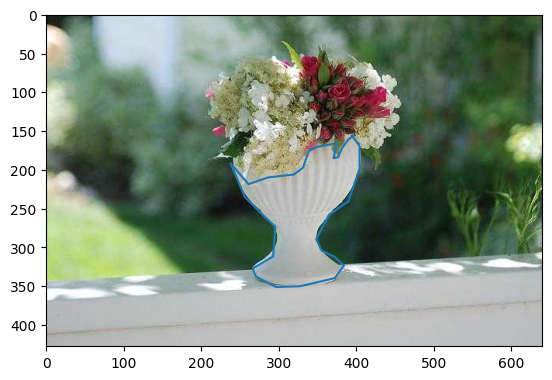

In [133]:
plt.figure()
plt.imshow(img)
plt.plot([plots[i][0] for i in range(len(plots))],[plots[i][1] for i in range(len(plots))])
plt.show()


In [47]:
from ultralytics import YOLO
model = YOLO('/home/wzy/ultralytics/checkpoints/yolov8s-seg.pt') 

In [48]:
results = model('/home/wzy/ultralytics/data/coco8-seg/images/train/000000000030.jpg',save=True) 


image 1/1 /home/wzy/ultralytics/data/coco8-seg/images/train/000000000030.jpg: 448x640 1 potted plant, 1 vase, 9.0ms
Speed: 1.1ms preprocess, 9.0ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /home/wzy/ultralytics/runs/segment/predict3


In [135]:
xy=results[0].masks.xy
xy=xy[0].tolist()
xy


[[387.0, 162.0],
 [386.0, 163.0],
 [384.0, 163.0],
 [383.0, 164.0],
 [383.0, 166.0],
 [382.0, 167.0],
 [382.0, 168.0],
 [379.0, 171.0],
 [379.0, 172.0],
 [376.0, 175.0],
 [373.0, 175.0],
 [372.0, 174.0],
 [372.0, 173.0],
 [371.0, 172.0],
 [371.0, 170.0],
 [370.0, 169.0],
 [370.0, 167.0],
 [369.0, 166.0],
 [369.0, 165.0],
 [368.0, 164.0],
 [359.0, 164.0],
 [358.0, 165.0],
 [355.0, 165.0],
 [354.0, 164.0],
 [353.0, 164.0],
 [352.0, 165.0],
 [349.0, 165.0],
 [348.0, 166.0],
 [347.0, 166.0],
 [344.0, 169.0],
 [343.0, 169.0],
 [337.0, 175.0],
 [337.0, 176.0],
 [336.0, 177.0],
 [336.0, 178.0],
 [335.0, 179.0],
 [335.0, 180.0],
 [334.0, 181.0],
 [334.0, 182.0],
 [331.0, 185.0],
 [331.0, 186.0],
 [326.0, 191.0],
 [326.0, 192.0],
 [325.0, 193.0],
 [324.0, 193.0],
 [320.0, 197.0],
 [319.0, 197.0],
 [318.0, 198.0],
 [317.0, 198.0],
 [316.0, 199.0],
 [315.0, 199.0],
 [314.0, 200.0],
 [298.0, 200.0],
 [297.0, 199.0],
 [294.0, 199.0],
 [293.0, 198.0],
 [292.0, 198.0],
 [291.0, 197.0],
 [290.0, 197.0

In [34]:
xyn=results[0].masks.xyn
xyn=xyn[0].tolist()
xyn

[[0.604687511920929, 0.3785046637058258],
 [0.6031249761581421, 0.38084113597869873],
 [0.6000000238418579, 0.38084113597869873],
 [0.598437488079071, 0.38317757844924927],
 [0.598437488079071, 0.38785046339035034],
 [0.596875011920929, 0.3901869058609009],
 [0.596875011920929, 0.3925233781337738],
 [0.5921875238418579, 0.3995327055454254],
 [0.5921875238418579, 0.40186914801597595],
 [0.5874999761581421, 0.40887850522994995],
 [0.582812488079071, 0.40887850522994995],
 [0.581250011920929, 0.4065420627593994],
 [0.581250011920929, 0.4042056202888489],
 [0.5796874761581421, 0.40186914801597595],
 [0.5796874761581421, 0.3971962630748749],
 [0.578125, 0.39485982060432434],
 [0.578125, 0.3901869058609009],
 [0.5765625238418579, 0.38785046339035034],
 [0.5765625238418579, 0.3855140209197998],
 [0.574999988079071, 0.38317757844924927],
 [0.5609375238418579, 0.38317757844924927],
 [0.559374988079071, 0.3855140209197998],
 [0.5546875, 0.3855140209197998],
 [0.5531250238418579, 0.38317757844924

In [37]:
for xy in xyn:
    print(xy[0]*img.width,xy[1]*img.height)

387.00000762939453 161.99999606609344
385.99998474121094 163.00000619888306
384.00001525878906 163.00000619888306
382.99999237060547 164.0000035762787
382.99999237060547 165.99999833106995
382.00000762939453 166.99999570846558
382.00000762939453 168.0000058412552
379.00001525878906 170.99999797344208
379.00001525878906 171.9999953508377
375.99998474121094 175.00000023841858
372.99999237060547 175.00000023841858
372.00000762939453 174.00000286102295
372.00000762939453 173.00000548362732
370.99998474121094 171.9999953508377
370.99998474121094 170.00000059604645
370.0 169.00000321865082
370.0 166.99999570846558
369.00001525878906 165.99999833106995
369.00001525878906 165.00000095367432
367.99999237060547 164.0000035762787
359.00001525878906 164.0000035762787
357.99999237060547 165.00000095367432
355.0 165.00000095367432
354.00001525878906 164.0000035762787
352.99999237060547 164.0000035762787
352.00000762939453 165.00000095367432
349.00001525878906 165.00000095367432
347.99999237060547 16

In [ ]:
# 虽然我不知道他是怎么可视化的，但是至少证明了标注文档的格式是
# x1/w, y1/h, x2/w, y2/h


In [115]:
import pickle 
filename="/home/wzy/ultralytics/data/SAMRS/ins/P0000_0005.pkl"
with open(filename , "rb") as f:
    data = pickle.load(f)


In [116]:
print(len(data))
print(data[0])

2
{'mask': {'size': [1024, 1024], 'counts': 'bSne04lo02N1O1N2O1O1O0lPOFbn0;YQOLdn06XQOMgn04TQO1kn0b000000000001N1O1O2N1O1N3N1O2O0O101O00001O01O1O100fPOBPo0h0O010O1O1O001O1O1N3L7H=E<E7I5K1O1O1O010N2O001O0O100O2N1O0001YOSSOkM\\m0c1h0O3O000001O100O1O1O1O[OjQOBUn0=oQOBom0<TRODkm0<WROChm0<ZROEdm0;^RODam0<`ROD_m0<bROE\\m0;fRODYm0<hRODXm0:kROETm0;mROFQm0:QSOEnl0:TSOGjl09XSOFhl09YSOGfl09[SOHcl08_SOGal07aSOI^l07dSOI[l06fSOJZl05gSOKYl04iSOLWl02jSONWl00kSOOVl0NlSO3Ul0JmSO5Tl0ImSO8Sl0EPTO:Sl0BnSO?im01O3M3M3M3L1O2O1N10O001O01O2N2N3N2M3M2N3N00O1M3K6gN`QOk0mn0M3M3M3N1N3N2N1O2O1O0O2O2Lck_5'}, 'bbox': array([        683,          62,         864,         225]), 'category': 'plane', 'size': 5930, 'label': 4}


AttributeError: 'numpy.ndarray' object has no attribute 'width'

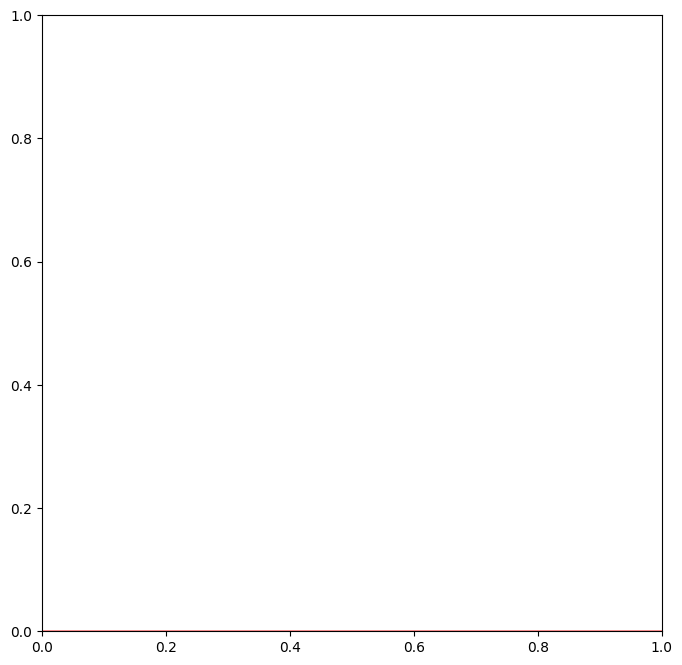

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import torch
def visualize_segmentation(image_path, segmentation_coords):
    # 读取图像
    image = plt.imread(image_path)

    # 创建画布
    plt.figure(figsize=(8, 8))
    # plt.imshow(image)

    # 绘制分割区域
    poly = patches.Polygon(segmentation_coords, edgecolor='r', facecolor='none')
    plt.gca().add_patch(poly)

    # 显示图像和分割区域
    # plt.axis('off')
    plt.xlim(img.width)
    plt.ylim(img.height)
    plt.show()

# 图像路径
image_path = '/home/wzy/ultralytics/data/coco8-seg/images/train/000000000030.jpg'

# 分割标注坐标 [x1, y1, x2, y2, ...]

segmentation_coords = xy # 示例坐标

# 可视化分割区域
visualize_segmentation(image_path, segmentation_coords)


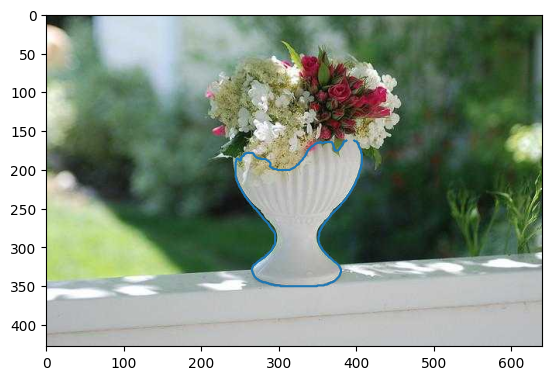

In [90]:
x=[]
y=[]
for i in range(0,len(xy)):
    x.append(xy[i][0])
    y.append(xy[i][1])
plt.figure()
plt.imshow(img)
plt.plot(x,y)
plt.show()

13870


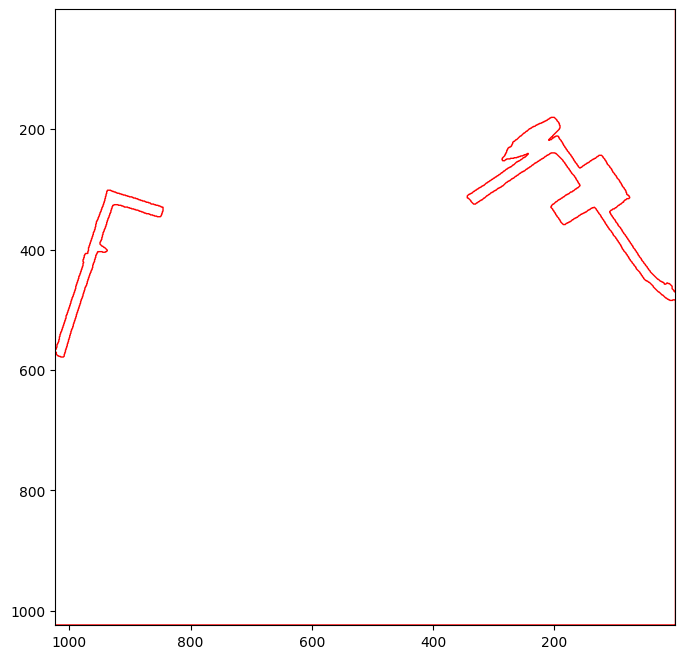

In [14]:
# 图像路径
image_path = '/home/wzy/ultralytics/data/SAMRS/images/P0541_0001.png'
img=Image.open(image_path)
# 分割标注坐标 [x1, y1, x2, y2, ...]
lis="631.0 202.0 813.0 202.0 813.0 365.0 631.0 365.0"
lis=lis.split(" ")
lis=[float(i) for i in lis]
lis= [
                    1023.0,
                    1023.5,
                    1022.0,
                    1023.5,
                    1021.0,
                    1023.5,
                    1020.0,
                    1023.5,
                    1019.0,
                    1023.5,
                    1018.0,
                    1023.5,
                    1017.0,
                    1023.5,
                    1016.0,
                    1023.5,
                    1015.0,
                    1023.5,
                    1014.0,
                    1023.5,
                    1013.0,
                    1023.5,
                    1012.0,
                    1023.5,
                    1011.0,
                    1023.5,
                    1010.0,
                    1023.5,
                    1009.0,
                    1023.5,
                    1008.0,
                    1023.5,
                    1007.0,
                    1023.5,
                    1006.0,
                    1023.5,
                    1005.0,
                    1023.5,
                    1004.0,
                    1023.5,
                    1003.0,
                    1023.5,
                    1002.0,
                    1023.5,
                    1001.0,
                    1023.5,
                    1000.0,
                    1023.5,
                    999.0,
                    1023.5,
                    998.0,
                    1023.5,
                    997.0,
                    1023.5,
                    996.0,
                    1023.5,
                    995.0,
                    1023.5,
                    994.0,
                    1023.5,
                    993.0,
                    1023.5,
                    992.0,
                    1023.5,
                    991.0,
                    1023.5,
                    990.0,
                    1023.5,
                    989.0,
                    1023.5,
                    988.0,
                    1023.5,
                    987.0,
                    1023.5,
                    986.0,
                    1023.5,
                    985.0,
                    1023.5,
                    984.0,
                    1023.5,
                    983.0,
                    1023.5,
                    982.0,
                    1023.5,
                    981.0,
                    1023.5,
                    980.0,
                    1023.5,
                    979.0,
                    1023.5,
                    978.0,
                    1023.5,
                    977.0,
                    1023.5,
                    976.0,
                    1023.5,
                    975.0,
                    1023.5,
                    974.0,
                    1023.5,
                    973.0,
                    1023.5,
                    972.0,
                    1023.5,
                    971.0,
                    1023.5,
                    970.0,
                    1023.5,
                    969.0,
                    1023.5,
                    968.0,
                    1023.5,
                    967.0,
                    1023.5,
                    966.0,
                    1023.5,
                    965.0,
                    1023.5,
                    964.0,
                    1023.5,
                    963.0,
                    1023.5,
                    962.0,
                    1023.5,
                    961.0,
                    1023.5,
                    960.0,
                    1023.5,
                    959.0,
                    1023.5,
                    958.0,
                    1023.5,
                    957.0,
                    1023.5,
                    956.0,
                    1023.5,
                    955.0,
                    1023.5,
                    954.0,
                    1023.5,
                    953.0,
                    1023.5,
                    952.0,
                    1023.5,
                    951.0,
                    1023.5,
                    950.0,
                    1023.5,
                    949.0,
                    1023.5,
                    948.0,
                    1023.5,
                    947.0,
                    1023.5,
                    946.0,
                    1023.5,
                    945.0,
                    1023.5,
                    944.0,
                    1023.5,
                    943.0,
                    1023.5,
                    942.0,
                    1023.5,
                    941.0,
                    1023.5,
                    940.0,
                    1023.5,
                    939.0,
                    1023.5,
                    938.0,
                    1023.5,
                    937.0,
                    1023.5,
                    936.0,
                    1023.5,
                    935.0,
                    1023.5,
                    934.0,
                    1023.5,
                    933.0,
                    1023.5,
                    932.0,
                    1023.5,
                    931.0,
                    1023.5,
                    930.0,
                    1023.5,
                    929.0,
                    1023.5,
                    928.0,
                    1023.5,
                    927.0,
                    1023.5,
                    926.0,
                    1023.5,
                    925.0,
                    1023.5,
                    924.0,
                    1023.5,
                    923.0,
                    1023.5,
                    922.0,
                    1023.5,
                    921.0,
                    1023.5,
                    920.0,
                    1023.5,
                    919.0,
                    1023.5,
                    918.0,
                    1023.5,
                    917.0,
                    1023.5,
                    916.0,
                    1023.5,
                    915.0,
                    1023.5,
                    914.0,
                    1023.5,
                    913.0,
                    1023.5,
                    912.0,
                    1023.5,
                    911.0,
                    1023.5,
                    910.0,
                    1023.5,
                    909.0,
                    1023.5,
                    908.0,
                    1023.5,
                    907.0,
                    1023.5,
                    906.0,
                    1023.5,
                    905.0,
                    1023.5,
                    904.0,
                    1023.5,
                    903.0,
                    1023.5,
                    902.0,
                    1023.5,
                    901.0,
                    1023.5,
                    900.0,
                    1023.5,
                    899.0,
                    1023.5,
                    898.0,
                    1023.5,
                    897.0,
                    1023.5,
                    896.0,
                    1023.5,
                    895.0,
                    1023.5,
                    894.0,
                    1023.5,
                    893.0,
                    1023.5,
                    892.0,
                    1023.5,
                    891.0,
                    1023.5,
                    890.0,
                    1023.5,
                    889.0,
                    1023.5,
                    888.0,
                    1023.5,
                    887.0,
                    1023.5,
                    886.0,
                    1023.5,
                    885.0,
                    1023.5,
                    884.0,
                    1023.5,
                    883.0,
                    1023.5,
                    882.0,
                    1023.5,
                    881.0,
                    1023.5,
                    880.0,
                    1023.5,
                    879.0,
                    1023.5,
                    878.0,
                    1023.5,
                    877.0,
                    1023.5,
                    876.0,
                    1023.5,
                    875.0,
                    1023.5,
                    874.0,
                    1023.5,
                    873.0,
                    1023.5,
                    872.0,
                    1023.5,
                    871.0,
                    1023.5,
                    870.0,
                    1023.5,
                    869.0,
                    1023.5,
                    868.0,
                    1023.5,
                    867.0,
                    1023.5,
                    866.0,
                    1023.5,
                    865.0,
                    1023.5,
                    864.0,
                    1023.5,
                    863.0,
                    1023.5,
                    862.0,
                    1023.5,
                    861.0,
                    1023.5,
                    860.0,
                    1023.5,
                    859.0,
                    1023.5,
                    858.0,
                    1023.5,
                    857.0,
                    1023.5,
                    856.0,
                    1023.5,
                    855.0,
                    1023.5,
                    854.0,
                    1023.5,
                    853.0,
                    1023.5,
                    852.0,
                    1023.5,
                    851.0,
                    1023.5,
                    850.0,
                    1023.5,
                    849.0,
                    1023.5,
                    848.0,
                    1023.5,
                    847.0,
                    1023.5,
                    846.0,
                    1023.5,
                    845.0,
                    1023.5,
                    844.0,
                    1023.5,
                    843.0,
                    1023.5,
                    842.0,
                    1023.5,
                    841.0,
                    1023.5,
                    840.0,
                    1023.5,
                    839.0,
                    1023.5,
                    838.0,
                    1023.5,
                    837.0,
                    1023.5,
                    836.0,
                    1023.5,
                    835.0,
                    1023.5,
                    834.0,
                    1023.5,
                    833.0,
                    1023.5,
                    832.0,
                    1023.5,
                    831.0,
                    1023.5,
                    830.0,
                    1023.5,
                    829.0,
                    1023.5,
                    828.0,
                    1023.5,
                    827.0,
                    1023.5,
                    826.0,
                    1023.5,
                    825.0,
                    1023.5,
                    824.0,
                    1023.5,
                    823.0,
                    1023.5,
                    822.0,
                    1023.5,
                    821.0,
                    1023.5,
                    820.0,
                    1023.5,
                    819.0,
                    1023.5,
                    818.0,
                    1023.5,
                    817.0,
                    1023.5,
                    816.0,
                    1023.5,
                    815.0,
                    1023.5,
                    814.0,
                    1023.5,
                    813.0,
                    1023.5,
                    812.0,
                    1023.5,
                    811.0,
                    1023.5,
                    810.0,
                    1023.5,
                    809.0,
                    1023.5,
                    808.0,
                    1023.5,
                    807.0,
                    1023.5,
                    806.0,
                    1023.5,
                    805.0,
                    1023.5,
                    804.0,
                    1023.5,
                    803.0,
                    1023.5,
                    802.0,
                    1023.5,
                    801.0,
                    1023.5,
                    800.0,
                    1023.5,
                    799.0,
                    1023.5,
                    798.0,
                    1023.5,
                    797.0,
                    1023.5,
                    796.0,
                    1023.5,
                    795.0,
                    1023.5,
                    794.0,
                    1023.5,
                    793.0,
                    1023.5,
                    792.0,
                    1023.5,
                    791.0,
                    1023.5,
                    790.0,
                    1023.5,
                    789.0,
                    1023.5,
                    788.0,
                    1023.5,
                    787.0,
                    1023.5,
                    786.0,
                    1023.5,
                    785.0,
                    1023.5,
                    784.0,
                    1023.5,
                    783.0,
                    1023.5,
                    782.0,
                    1023.5,
                    781.0,
                    1023.5,
                    780.0,
                    1023.5,
                    779.0,
                    1023.5,
                    778.0,
                    1023.5,
                    777.0,
                    1023.5,
                    776.0,
                    1023.5,
                    775.0,
                    1023.5,
                    774.0,
                    1023.5,
                    773.0,
                    1023.5,
                    772.0,
                    1023.5,
                    771.0,
                    1023.5,
                    770.0,
                    1023.5,
                    769.0,
                    1023.5,
                    768.0,
                    1023.5,
                    767.0,
                    1023.5,
                    766.0,
                    1023.5,
                    765.0,
                    1023.5,
                    764.0,
                    1023.5,
                    763.0,
                    1023.5,
                    762.0,
                    1023.5,
                    761.0,
                    1023.5,
                    760.0,
                    1023.5,
                    759.0,
                    1023.5,
                    758.0,
                    1023.5,
                    757.0,
                    1023.5,
                    756.0,
                    1023.5,
                    755.0,
                    1023.5,
                    754.0,
                    1023.5,
                    753.0,
                    1023.5,
                    752.0,
                    1023.5,
                    751.0,
                    1023.5,
                    750.0,
                    1023.5,
                    749.0,
                    1023.5,
                    748.0,
                    1023.5,
                    747.0,
                    1023.5,
                    746.0,
                    1023.5,
                    745.0,
                    1023.5,
                    744.0,
                    1023.5,
                    743.0,
                    1023.5,
                    742.0,
                    1023.5,
                    741.0,
                    1023.5,
                    740.0,
                    1023.5,
                    739.0,
                    1023.5,
                    738.0,
                    1023.5,
                    737.0,
                    1023.5,
                    736.0,
                    1023.5,
                    735.0,
                    1023.5,
                    734.0,
                    1023.5,
                    733.0,
                    1023.5,
                    732.0,
                    1023.5,
                    731.0,
                    1023.5,
                    730.0,
                    1023.5,
                    729.0,
                    1023.5,
                    728.0,
                    1023.5,
                    727.0,
                    1023.5,
                    726.0,
                    1023.5,
                    725.0,
                    1023.5,
                    724.0,
                    1023.5,
                    723.0,
                    1023.5,
                    722.0,
                    1023.5,
                    721.0,
                    1023.5,
                    720.0,
                    1023.5,
                    719.0,
                    1023.5,
                    718.0,
                    1023.5,
                    717.0,
                    1023.5,
                    716.0,
                    1023.5,
                    715.0,
                    1023.5,
                    714.0,
                    1023.5,
                    713.0,
                    1023.5,
                    712.0,
                    1023.5,
                    711.0,
                    1023.5,
                    710.0,
                    1023.5,
                    709.0,
                    1023.5,
                    708.0,
                    1023.5,
                    707.0,
                    1023.5,
                    706.0,
                    1023.5,
                    705.0,
                    1023.5,
                    704.0,
                    1023.5,
                    703.0,
                    1023.5,
                    702.0,
                    1023.5,
                    701.0,
                    1023.5,
                    700.0,
                    1023.5,
                    699.0,
                    1023.5,
                    698.0,
                    1023.5,
                    697.0,
                    1023.5,
                    696.0,
                    1023.5,
                    695.0,
                    1023.5,
                    694.0,
                    1023.5,
                    693.0,
                    1023.5,
                    692.0,
                    1023.5,
                    691.0,
                    1023.5,
                    690.0,
                    1023.5,
                    689.0,
                    1023.5,
                    688.0,
                    1023.5,
                    687.0,
                    1023.5,
                    686.0,
                    1023.5,
                    685.0,
                    1023.5,
                    684.0,
                    1023.5,
                    683.0,
                    1023.5,
                    682.0,
                    1023.5,
                    681.0,
                    1023.5,
                    680.0,
                    1023.5,
                    679.0,
                    1023.5,
                    678.0,
                    1023.5,
                    677.0,
                    1023.5,
                    676.0,
                    1023.5,
                    675.0,
                    1023.5,
                    674.0,
                    1023.5,
                    673.0,
                    1023.5,
                    672.0,
                    1023.5,
                    671.0,
                    1023.5,
                    670.0,
                    1023.5,
                    669.0,
                    1023.5,
                    668.0,
                    1023.5,
                    667.0,
                    1023.5,
                    666.0,
                    1023.5,
                    665.0,
                    1023.5,
                    664.0,
                    1023.5,
                    663.0,
                    1023.5,
                    662.0,
                    1023.5,
                    661.0,
                    1023.5,
                    660.0,
                    1023.5,
                    659.0,
                    1023.5,
                    658.0,
                    1023.5,
                    657.0,
                    1023.5,
                    656.0,
                    1023.5,
                    655.0,
                    1023.5,
                    654.0,
                    1023.5,
                    653.0,
                    1023.5,
                    652.0,
                    1023.5,
                    651.0,
                    1023.5,
                    650.0,
                    1023.5,
                    649.0,
                    1023.5,
                    648.0,
                    1023.5,
                    647.0,
                    1023.5,
                    646.0,
                    1023.5,
                    645.0,
                    1023.5,
                    644.0,
                    1023.5,
                    643.0,
                    1023.5,
                    642.0,
                    1023.5,
                    641.0,
                    1023.5,
                    640.0,
                    1023.5,
                    639.0,
                    1023.5,
                    638.0,
                    1023.5,
                    637.0,
                    1023.5,
                    636.0,
                    1023.5,
                    635.0,
                    1023.5,
                    634.0,
                    1023.5,
                    633.0,
                    1023.5,
                    632.0,
                    1023.5,
                    631.0,
                    1023.5,
                    630.0,
                    1023.5,
                    629.0,
                    1023.5,
                    628.0,
                    1023.5,
                    627.0,
                    1023.5,
                    626.0,
                    1023.5,
                    625.0,
                    1023.5,
                    624.0,
                    1023.5,
                    623.0,
                    1023.5,
                    622.0,
                    1023.5,
                    621.0,
                    1023.5,
                    620.0,
                    1023.5,
                    619.0,
                    1023.5,
                    618.0,
                    1023.5,
                    617.0,
                    1023.5,
                    616.0,
                    1023.5,
                    615.0,
                    1023.5,
                    614.0,
                    1023.5,
                    613.0,
                    1023.5,
                    612.0,
                    1023.5,
                    611.0,
                    1023.5,
                    610.0,
                    1023.5,
                    609.0,
                    1023.5,
                    608.0,
                    1023.5,
                    607.0,
                    1023.5,
                    606.0,
                    1023.5,
                    605.0,
                    1023.5,
                    604.0,
                    1023.5,
                    603.0,
                    1023.5,
                    602.0,
                    1023.5,
                    601.0,
                    1023.5,
                    600.0,
                    1023.5,
                    599.0,
                    1023.5,
                    598.0,
                    1023.5,
                    597.0,
                    1023.5,
                    596.0,
                    1023.5,
                    595.0,
                    1023.5,
                    594.0,
                    1023.5,
                    593.0,
                    1023.5,
                    592.0,
                    1023.5,
                    591.0,
                    1023.5,
                    590.0,
                    1023.5,
                    589.0,
                    1023.5,
                    588.0,
                    1023.5,
                    587.0,
                    1023.5,
                    586.0,
                    1023.5,
                    585.0,
                    1023.5,
                    584.0,
                    1023.5,
                    583.0,
                    1023.5,
                    582.0,
                    1023.5,
                    581.0,
                    1023.5,
                    580.0,
                    1023.5,
                    579.0,
                    1023.5,
                    578.0,
                    1023.5,
                    577.0,
                    1023.5,
                    576.0,
                    1023.5,
                    575.0,
                    1023.5,
                    574.0,
                    1023.5,
                    573.0,
                    1023.5,
                    572.0,
                    1023.5,
                    571.0,
                    1023.5,
                    570.0,
                    1023.5,
                    569.0,
                    1023.5,
                    568.0,
                    1023.5,
                    567.0,
                    1023.5,
                    566.0,
                    1023.5,
                    565.0,
                    1023.5,
                    564.0,
                    1023.5,
                    563.0,
                    1023.5,
                    562.0,
                    1023.5,
                    561.0,
                    1023.5,
                    560.0,
                    1023.5,
                    559.0,
                    1023.5,
                    558.0,
                    1023.5,
                    557.0,
                    1023.5,
                    556.0,
                    1023.5,
                    555.0,
                    1023.5,
                    554.0,
                    1023.5,
                    553.0,
                    1023.5,
                    552.0,
                    1023.5,
                    551.0,
                    1023.5,
                    550.0,
                    1023.5,
                    549.0,
                    1023.5,
                    548.0,
                    1023.5,
                    547.0,
                    1023.5,
                    546.0,
                    1023.5,
                    545.0,
                    1023.5,
                    544.0,
                    1023.5,
                    543.0,
                    1023.5,
                    542.0,
                    1023.5,
                    541.0,
                    1023.5,
                    540.0,
                    1023.5,
                    539.0,
                    1023.5,
                    538.0,
                    1023.5,
                    537.0,
                    1023.5,
                    536.0,
                    1023.5,
                    535.0,
                    1023.5,
                    534.0,
                    1023.5,
                    533.0,
                    1023.5,
                    532.0,
                    1023.5,
                    531.0,
                    1023.5,
                    530.0,
                    1023.5,
                    529.0,
                    1023.5,
                    528.0,
                    1023.5,
                    527.0,
                    1023.5,
                    526.0,
                    1023.5,
                    525.0,
                    1023.5,
                    524.0,
                    1023.5,
                    523.0,
                    1023.5,
                    522.0,
                    1023.5,
                    521.0,
                    1023.5,
                    520.0,
                    1023.5,
                    519.0,
                    1023.5,
                    518.0,
                    1023.5,
                    517.0,
                    1023.5,
                    516.0,
                    1023.5,
                    515.0,
                    1023.5,
                    514.0,
                    1023.5,
                    513.0,
                    1023.5,
                    512.0,
                    1023.5,
                    511.0,
                    1023.5,
                    510.0,
                    1023.5,
                    509.0,
                    1023.5,
                    508.0,
                    1023.5,
                    507.0,
                    1023.5,
                    506.0,
                    1023.5,
                    505.0,
                    1023.5,
                    504.0,
                    1023.5,
                    503.0,
                    1023.5,
                    502.0,
                    1023.5,
                    501.0,
                    1023.5,
                    500.0,
                    1023.5,
                    499.0,
                    1023.5,
                    498.0,
                    1023.5,
                    497.0,
                    1023.5,
                    496.0,
                    1023.5,
                    495.0,
                    1023.5,
                    494.0,
                    1023.5,
                    493.0,
                    1023.5,
                    492.0,
                    1023.5,
                    491.0,
                    1023.5,
                    490.0,
                    1023.5,
                    489.0,
                    1023.5,
                    488.0,
                    1023.5,
                    487.0,
                    1023.5,
                    486.0,
                    1023.5,
                    485.0,
                    1023.5,
                    484.0,
                    1023.5,
                    483.0,
                    1023.5,
                    482.0,
                    1023.5,
                    481.0,
                    1023.5,
                    480.0,
                    1023.5,
                    479.0,
                    1023.5,
                    478.0,
                    1023.5,
                    477.0,
                    1023.5,
                    476.0,
                    1023.5,
                    475.0,
                    1023.5,
                    474.0,
                    1023.5,
                    473.0,
                    1023.5,
                    472.0,
                    1023.5,
                    471.0,
                    1023.5,
                    470.0,
                    1023.5,
                    469.0,
                    1023.5,
                    468.0,
                    1023.5,
                    467.0,
                    1023.5,
                    466.0,
                    1023.5,
                    465.0,
                    1023.5,
                    464.0,
                    1023.5,
                    463.0,
                    1023.5,
                    462.0,
                    1023.5,
                    461.0,
                    1023.5,
                    460.0,
                    1023.5,
                    459.0,
                    1023.5,
                    458.0,
                    1023.5,
                    457.0,
                    1023.5,
                    456.0,
                    1023.5,
                    455.0,
                    1023.5,
                    454.0,
                    1023.5,
                    453.0,
                    1023.5,
                    452.0,
                    1023.5,
                    451.0,
                    1023.5,
                    450.0,
                    1023.5,
                    449.0,
                    1023.5,
                    448.0,
                    1023.5,
                    447.0,
                    1023.5,
                    446.0,
                    1023.5,
                    445.0,
                    1023.5,
                    444.0,
                    1023.5,
                    443.0,
                    1023.5,
                    442.0,
                    1023.5,
                    441.0,
                    1023.5,
                    440.0,
                    1023.5,
                    439.0,
                    1023.5,
                    438.0,
                    1023.5,
                    437.0,
                    1023.5,
                    436.0,
                    1023.5,
                    435.0,
                    1023.5,
                    434.0,
                    1023.5,
                    433.0,
                    1023.5,
                    432.0,
                    1023.5,
                    431.0,
                    1023.5,
                    430.0,
                    1023.5,
                    429.0,
                    1023.5,
                    428.0,
                    1023.5,
                    427.0,
                    1023.5,
                    426.0,
                    1023.5,
                    425.0,
                    1023.5,
                    424.0,
                    1023.5,
                    423.0,
                    1023.5,
                    422.0,
                    1023.5,
                    421.0,
                    1023.5,
                    420.0,
                    1023.5,
                    419.0,
                    1023.5,
                    418.0,
                    1023.5,
                    417.0,
                    1023.5,
                    416.0,
                    1023.5,
                    415.0,
                    1023.5,
                    414.0,
                    1023.5,
                    413.0,
                    1023.5,
                    412.0,
                    1023.5,
                    411.0,
                    1023.5,
                    410.0,
                    1023.5,
                    409.0,
                    1023.5,
                    408.0,
                    1023.5,
                    407.0,
                    1023.5,
                    406.0,
                    1023.5,
                    405.0,
                    1023.5,
                    404.0,
                    1023.5,
                    403.0,
                    1023.5,
                    402.0,
                    1023.5,
                    401.0,
                    1023.5,
                    400.0,
                    1023.5,
                    399.0,
                    1023.5,
                    398.0,
                    1023.5,
                    397.0,
                    1023.5,
                    396.0,
                    1023.5,
                    395.0,
                    1023.5,
                    394.0,
                    1023.5,
                    393.0,
                    1023.5,
                    392.0,
                    1023.5,
                    391.0,
                    1023.5,
                    390.0,
                    1023.5,
                    389.0,
                    1023.5,
                    388.0,
                    1023.5,
                    387.0,
                    1023.5,
                    386.0,
                    1023.5,
                    385.0,
                    1023.5,
                    384.0,
                    1023.5,
                    383.0,
                    1023.5,
                    382.0,
                    1023.5,
                    381.0,
                    1023.5,
                    380.0,
                    1023.5,
                    379.0,
                    1023.5,
                    378.0,
                    1023.5,
                    377.0,
                    1023.5,
                    376.0,
                    1023.5,
                    375.0,
                    1023.5,
                    374.0,
                    1023.5,
                    373.0,
                    1023.5,
                    372.0,
                    1023.5,
                    371.0,
                    1023.5,
                    370.0,
                    1023.5,
                    369.0,
                    1023.5,
                    368.0,
                    1023.5,
                    367.0,
                    1023.5,
                    366.0,
                    1023.5,
                    365.0,
                    1023.5,
                    364.0,
                    1023.5,
                    363.0,
                    1023.5,
                    362.0,
                    1023.5,
                    361.0,
                    1023.5,
                    360.0,
                    1023.5,
                    359.0,
                    1023.5,
                    358.0,
                    1023.5,
                    357.0,
                    1023.5,
                    356.0,
                    1023.5,
                    355.0,
                    1023.5,
                    354.0,
                    1023.5,
                    353.0,
                    1023.5,
                    352.0,
                    1023.5,
                    351.0,
                    1023.5,
                    350.0,
                    1023.5,
                    349.0,
                    1023.5,
                    348.0,
                    1023.5,
                    347.0,
                    1023.5,
                    346.0,
                    1023.5,
                    345.0,
                    1023.5,
                    344.0,
                    1023.5,
                    343.0,
                    1023.5,
                    342.0,
                    1023.5,
                    341.0,
                    1023.5,
                    340.0,
                    1023.5,
                    339.0,
                    1023.5,
                    338.0,
                    1023.5,
                    337.0,
                    1023.5,
                    336.0,
                    1023.5,
                    335.0,
                    1023.5,
                    334.0,
                    1023.5,
                    333.0,
                    1023.5,
                    332.0,
                    1023.5,
                    331.0,
                    1023.5,
                    330.0,
                    1023.5,
                    329.0,
                    1023.5,
                    328.0,
                    1023.5,
                    327.0,
                    1023.5,
                    326.0,
                    1023.5,
                    325.0,
                    1023.5,
                    324.0,
                    1023.5,
                    323.0,
                    1023.5,
                    322.0,
                    1023.5,
                    321.0,
                    1023.5,
                    320.0,
                    1023.5,
                    319.0,
                    1023.5,
                    318.0,
                    1023.5,
                    317.0,
                    1023.5,
                    316.0,
                    1023.5,
                    315.0,
                    1023.5,
                    314.0,
                    1023.5,
                    313.0,
                    1023.5,
                    312.0,
                    1023.5,
                    311.0,
                    1023.5,
                    310.0,
                    1023.5,
                    309.0,
                    1023.5,
                    308.0,
                    1023.5,
                    307.0,
                    1023.5,
                    306.0,
                    1023.5,
                    305.0,
                    1023.5,
                    304.0,
                    1023.5,
                    303.0,
                    1023.5,
                    302.0,
                    1023.5,
                    301.0,
                    1023.5,
                    300.0,
                    1023.5,
                    299.0,
                    1023.5,
                    298.0,
                    1023.5,
                    297.0,
                    1023.5,
                    296.0,
                    1023.5,
                    295.0,
                    1023.5,
                    294.0,
                    1023.5,
                    293.0,
                    1023.5,
                    292.0,
                    1023.5,
                    291.0,
                    1023.5,
                    290.0,
                    1023.5,
                    289.0,
                    1023.5,
                    288.0,
                    1023.5,
                    287.0,
                    1023.5,
                    286.0,
                    1023.5,
                    285.0,
                    1023.5,
                    284.0,
                    1023.5,
                    283.0,
                    1023.5,
                    282.0,
                    1023.5,
                    281.0,
                    1023.5,
                    280.0,
                    1023.5,
                    279.0,
                    1023.5,
                    278.0,
                    1023.5,
                    277.0,
                    1023.5,
                    276.0,
                    1023.5,
                    275.0,
                    1023.5,
                    274.0,
                    1023.5,
                    273.0,
                    1023.5,
                    272.0,
                    1023.5,
                    271.0,
                    1023.5,
                    270.0,
                    1023.5,
                    269.0,
                    1023.5,
                    268.0,
                    1023.5,
                    267.0,
                    1023.5,
                    266.0,
                    1023.5,
                    265.0,
                    1023.5,
                    264.0,
                    1023.5,
                    263.0,
                    1023.5,
                    262.0,
                    1023.5,
                    261.0,
                    1023.5,
                    260.0,
                    1023.5,
                    259.0,
                    1023.5,
                    258.0,
                    1023.5,
                    257.0,
                    1023.5,
                    256.0,
                    1023.5,
                    255.0,
                    1023.5,
                    254.0,
                    1023.5,
                    253.0,
                    1023.5,
                    252.0,
                    1023.5,
                    251.0,
                    1023.5,
                    250.0,
                    1023.5,
                    249.0,
                    1023.5,
                    248.0,
                    1023.5,
                    247.0,
                    1023.5,
                    246.0,
                    1023.5,
                    245.0,
                    1023.5,
                    244.0,
                    1023.5,
                    243.0,
                    1023.5,
                    242.0,
                    1023.5,
                    241.0,
                    1023.5,
                    240.0,
                    1023.5,
                    239.0,
                    1023.5,
                    238.0,
                    1023.5,
                    237.0,
                    1023.5,
                    236.0,
                    1023.5,
                    235.0,
                    1023.5,
                    234.0,
                    1023.5,
                    233.0,
                    1023.5,
                    232.0,
                    1023.5,
                    231.0,
                    1023.5,
                    230.0,
                    1023.5,
                    229.0,
                    1023.5,
                    228.0,
                    1023.5,
                    227.0,
                    1023.5,
                    226.0,
                    1023.5,
                    225.0,
                    1023.5,
                    224.0,
                    1023.5,
                    223.0,
                    1023.5,
                    222.0,
                    1023.5,
                    221.0,
                    1023.5,
                    220.0,
                    1023.5,
                    219.0,
                    1023.5,
                    218.0,
                    1023.5,
                    217.0,
                    1023.5,
                    216.0,
                    1023.5,
                    215.0,
                    1023.5,
                    214.0,
                    1023.5,
                    213.0,
                    1023.5,
                    212.0,
                    1023.5,
                    211.0,
                    1023.5,
                    210.0,
                    1023.5,
                    209.0,
                    1023.5,
                    208.0,
                    1023.5,
                    207.0,
                    1023.5,
                    206.0,
                    1023.5,
                    205.0,
                    1023.5,
                    204.0,
                    1023.5,
                    203.0,
                    1023.5,
                    202.0,
                    1023.5,
                    201.0,
                    1023.5,
                    200.0,
                    1023.5,
                    199.0,
                    1023.5,
                    198.0,
                    1023.5,
                    197.0,
                    1023.5,
                    196.0,
                    1023.5,
                    195.0,
                    1023.5,
                    194.0,
                    1023.5,
                    193.0,
                    1023.5,
                    192.0,
                    1023.5,
                    191.0,
                    1023.5,
                    190.0,
                    1023.5,
                    189.0,
                    1023.5,
                    188.0,
                    1023.5,
                    187.0,
                    1023.5,
                    186.0,
                    1023.5,
                    185.0,
                    1023.5,
                    184.0,
                    1023.5,
                    183.0,
                    1023.5,
                    182.0,
                    1023.5,
                    181.0,
                    1023.5,
                    180.0,
                    1023.5,
                    179.0,
                    1023.5,
                    178.0,
                    1023.5,
                    177.0,
                    1023.5,
                    176.0,
                    1023.5,
                    175.0,
                    1023.5,
                    174.0,
                    1023.5,
                    173.0,
                    1023.5,
                    172.0,
                    1023.5,
                    171.0,
                    1023.5,
                    170.0,
                    1023.5,
                    169.0,
                    1023.5,
                    168.0,
                    1023.5,
                    167.0,
                    1023.5,
                    166.0,
                    1023.5,
                    165.0,
                    1023.5,
                    164.0,
                    1023.5,
                    163.0,
                    1023.5,
                    162.0,
                    1023.5,
                    161.0,
                    1023.5,
                    160.0,
                    1023.5,
                    159.0,
                    1023.5,
                    158.0,
                    1023.5,
                    157.0,
                    1023.5,
                    156.0,
                    1023.5,
                    155.0,
                    1023.5,
                    154.0,
                    1023.5,
                    153.0,
                    1023.5,
                    152.0,
                    1023.5,
                    151.0,
                    1023.5,
                    150.0,
                    1023.5,
                    149.0,
                    1023.5,
                    148.0,
                    1023.5,
                    147.0,
                    1023.5,
                    146.0,
                    1023.5,
                    145.0,
                    1023.5,
                    144.0,
                    1023.5,
                    143.0,
                    1023.5,
                    142.0,
                    1023.5,
                    141.0,
                    1023.5,
                    140.0,
                    1023.5,
                    139.0,
                    1023.5,
                    138.0,
                    1023.5,
                    137.0,
                    1023.5,
                    136.0,
                    1023.5,
                    135.0,
                    1023.5,
                    134.0,
                    1023.5,
                    133.0,
                    1023.5,
                    132.0,
                    1023.5,
                    131.0,
                    1023.5,
                    130.0,
                    1023.5,
                    129.0,
                    1023.5,
                    128.0,
                    1023.5,
                    127.0,
                    1023.5,
                    126.0,
                    1023.5,
                    125.0,
                    1023.5,
                    124.0,
                    1023.5,
                    123.0,
                    1023.5,
                    122.0,
                    1023.5,
                    121.0,
                    1023.5,
                    120.0,
                    1023.5,
                    119.0,
                    1023.5,
                    118.0,
                    1023.5,
                    117.0,
                    1023.5,
                    116.0,
                    1023.5,
                    115.0,
                    1023.5,
                    114.0,
                    1023.5,
                    113.0,
                    1023.5,
                    112.0,
                    1023.5,
                    111.0,
                    1023.5,
                    110.0,
                    1023.5,
                    109.0,
                    1023.5,
                    108.0,
                    1023.5,
                    107.0,
                    1023.5,
                    106.0,
                    1023.5,
                    105.0,
                    1023.5,
                    104.0,
                    1023.5,
                    103.0,
                    1023.5,
                    102.0,
                    1023.5,
                    101.0,
                    1023.5,
                    100.0,
                    1023.5,
                    99.0,
                    1023.5,
                    98.0,
                    1023.5,
                    97.0,
                    1023.5,
                    96.0,
                    1023.5,
                    95.0,
                    1023.5,
                    94.0,
                    1023.5,
                    93.0,
                    1023.5,
                    92.0,
                    1023.5,
                    91.0,
                    1023.5,
                    90.0,
                    1023.5,
                    89.0,
                    1023.5,
                    88.0,
                    1023.5,
                    87.0,
                    1023.5,
                    86.0,
                    1023.5,
                    85.0,
                    1023.5,
                    84.0,
                    1023.5,
                    83.0,
                    1023.5,
                    82.0,
                    1023.5,
                    81.0,
                    1023.5,
                    80.0,
                    1023.5,
                    79.0,
                    1023.5,
                    78.0,
                    1023.5,
                    77.0,
                    1023.5,
                    76.0,
                    1023.5,
                    75.0,
                    1023.5,
                    74.0,
                    1023.5,
                    73.0,
                    1023.5,
                    72.0,
                    1023.5,
                    71.0,
                    1023.5,
                    70.0,
                    1023.5,
                    69.0,
                    1023.5,
                    68.0,
                    1023.5,
                    67.0,
                    1023.5,
                    66.0,
                    1023.5,
                    65.0,
                    1023.5,
                    64.0,
                    1023.5,
                    63.0,
                    1023.5,
                    62.0,
                    1023.5,
                    61.0,
                    1023.5,
                    60.0,
                    1023.5,
                    59.0,
                    1023.5,
                    58.0,
                    1023.5,
                    57.0,
                    1023.5,
                    56.0,
                    1023.5,
                    55.0,
                    1023.5,
                    54.0,
                    1023.5,
                    53.0,
                    1023.5,
                    52.0,
                    1023.5,
                    51.0,
                    1023.5,
                    50.0,
                    1023.5,
                    49.0,
                    1023.5,
                    48.0,
                    1023.5,
                    47.0,
                    1023.5,
                    46.0,
                    1023.5,
                    45.0,
                    1023.5,
                    44.0,
                    1023.5,
                    43.0,
                    1023.5,
                    42.0,
                    1023.5,
                    41.0,
                    1023.5,
                    40.0,
                    1023.5,
                    39.0,
                    1023.5,
                    38.0,
                    1023.5,
                    37.0,
                    1023.5,
                    36.0,
                    1023.5,
                    35.0,
                    1023.5,
                    34.0,
                    1023.5,
                    33.0,
                    1023.5,
                    32.0,
                    1023.5,
                    31.0,
                    1023.5,
                    30.0,
                    1023.5,
                    29.0,
                    1023.5,
                    28.0,
                    1023.5,
                    27.0,
                    1023.5,
                    26.0,
                    1023.5,
                    25.0,
                    1023.5,
                    24.0,
                    1023.5,
                    23.0,
                    1023.5,
                    22.0,
                    1023.5,
                    21.0,
                    1023.5,
                    20.0,
                    1023.5,
                    19.0,
                    1023.5,
                    18.0,
                    1023.5,
                    17.0,
                    1023.5,
                    16.0,
                    1023.5,
                    15.0,
                    1023.5,
                    14.0,
                    1023.5,
                    13.0,
                    1023.5,
                    12.0,
                    1023.5,
                    11.0,
                    1023.5,
                    10.0,
                    1023.5,
                    9.0,
                    1023.5,
                    8.0,
                    1023.5,
                    7.0,
                    1023.5,
                    6.0,
                    1023.5,
                    5.0,
                    1023.5,
                    4.0,
                    1023.5,
                    3.0,
                    1023.5,
                    2.0,
                    1023.5,
                    1.0,
                    1023.5,
                    0.0,
                    1023.5,
                    0.0,
                    1023.0,
                    0.0,
                    1022.0,
                    0.0,
                    1021.0,
                    0.0,
                    1020.0,
                    0.0,
                    1019.0,
                    0.0,
                    1018.0,
                    0.0,
                    1017.0,
                    0.0,
                    1016.0,
                    0.0,
                    1015.0,
                    0.0,
                    1014.0,
                    0.0,
                    1013.0,
                    0.0,
                    1012.0,
                    0.0,
                    1011.0,
                    0.0,
                    1010.0,
                    0.0,
                    1009.0,
                    0.0,
                    1008.0,
                    0.0,
                    1007.0,
                    0.0,
                    1006.0,
                    0.0,
                    1005.0,
                    0.0,
                    1004.0,
                    0.0,
                    1003.0,
                    0.0,
                    1002.0,
                    0.0,
                    1001.0,
                    0.0,
                    1000.0,
                    0.0,
                    999.0,
                    0.0,
                    998.0,
                    0.0,
                    997.0,
                    0.0,
                    996.0,
                    0.0,
                    995.0,
                    0.0,
                    994.0,
                    0.0,
                    993.0,
                    0.0,
                    992.0,
                    0.0,
                    991.0,
                    0.0,
                    990.0,
                    0.0,
                    989.0,
                    0.0,
                    988.0,
                    0.0,
                    987.0,
                    0.0,
                    986.0,
                    0.0,
                    985.0,
                    0.0,
                    984.0,
                    0.0,
                    983.0,
                    0.0,
                    982.0,
                    0.0,
                    981.0,
                    0.0,
                    980.0,
                    0.0,
                    979.0,
                    0.0,
                    978.0,
                    0.0,
                    977.0,
                    0.0,
                    976.0,
                    0.0,
                    975.0,
                    0.0,
                    974.0,
                    0.0,
                    973.0,
                    0.0,
                    972.0,
                    0.0,
                    971.0,
                    0.0,
                    970.0,
                    0.0,
                    969.0,
                    0.0,
                    968.0,
                    0.0,
                    967.0,
                    0.0,
                    966.0,
                    0.0,
                    965.0,
                    0.0,
                    964.0,
                    0.0,
                    963.0,
                    0.0,
                    962.0,
                    0.0,
                    961.0,
                    0.0,
                    960.0,
                    0.0,
                    959.0,
                    0.0,
                    958.0,
                    0.0,
                    957.0,
                    0.0,
                    956.0,
                    0.0,
                    955.0,
                    0.0,
                    954.0,
                    0.0,
                    953.0,
                    0.0,
                    952.0,
                    0.0,
                    951.0,
                    0.0,
                    950.0,
                    0.0,
                    949.0,
                    0.0,
                    948.0,
                    0.0,
                    947.0,
                    0.0,
                    946.0,
                    0.0,
                    945.0,
                    0.0,
                    944.0,
                    0.0,
                    943.0,
                    0.0,
                    942.0,
                    0.0,
                    941.0,
                    0.0,
                    940.0,
                    0.0,
                    939.0,
                    0.0,
                    938.0,
                    0.0,
                    937.0,
                    0.0,
                    936.0,
                    0.0,
                    935.0,
                    0.0,
                    934.0,
                    0.0,
                    933.0,
                    0.0,
                    932.0,
                    0.0,
                    931.0,
                    0.0,
                    930.0,
                    0.0,
                    929.0,
                    0.0,
                    928.0,
                    0.0,
                    927.0,
                    0.0,
                    926.0,
                    0.0,
                    925.0,
                    0.0,
                    924.0,
                    0.0,
                    923.0,
                    0.0,
                    922.0,
                    0.0,
                    921.0,
                    0.0,
                    920.0,
                    0.0,
                    919.0,
                    0.0,
                    918.0,
                    0.0,
                    917.0,
                    0.0,
                    916.0,
                    0.0,
                    915.0,
                    0.0,
                    914.0,
                    0.0,
                    913.0,
                    0.0,
                    912.0,
                    0.0,
                    911.0,
                    0.0,
                    910.0,
                    0.0,
                    909.0,
                    0.0,
                    908.0,
                    0.0,
                    907.0,
                    0.0,
                    906.0,
                    0.0,
                    905.0,
                    0.0,
                    904.0,
                    0.0,
                    903.0,
                    0.0,
                    902.0,
                    0.0,
                    901.0,
                    0.0,
                    900.0,
                    0.0,
                    899.0,
                    0.0,
                    898.0,
                    0.0,
                    897.0,
                    0.0,
                    896.0,
                    0.0,
                    895.0,
                    0.0,
                    894.0,
                    0.0,
                    893.0,
                    0.0,
                    892.0,
                    0.0,
                    891.0,
                    0.0,
                    890.0,
                    0.0,
                    889.0,
                    0.0,
                    888.0,
                    0.0,
                    887.0,
                    0.0,
                    886.0,
                    0.0,
                    885.0,
                    0.0,
                    884.0,
                    0.0,
                    883.0,
                    0.0,
                    882.0,
                    0.0,
                    881.0,
                    0.0,
                    880.0,
                    0.0,
                    879.0,
                    0.0,
                    878.0,
                    0.0,
                    877.0,
                    0.0,
                    876.0,
                    0.0,
                    875.0,
                    0.0,
                    874.0,
                    0.0,
                    873.0,
                    0.0,
                    872.0,
                    0.0,
                    871.0,
                    0.0,
                    870.0,
                    0.0,
                    869.0,
                    0.0,
                    868.0,
                    0.0,
                    867.0,
                    0.0,
                    866.0,
                    0.0,
                    865.0,
                    0.0,
                    864.0,
                    0.0,
                    863.0,
                    0.0,
                    862.0,
                    0.0,
                    861.0,
                    0.0,
                    860.0,
                    0.0,
                    859.0,
                    0.0,
                    858.0,
                    0.0,
                    857.0,
                    0.0,
                    856.0,
                    0.0,
                    855.0,
                    0.0,
                    854.0,
                    0.0,
                    853.0,
                    0.0,
                    852.0,
                    0.0,
                    851.0,
                    0.0,
                    850.0,
                    0.0,
                    849.0,
                    0.0,
                    848.0,
                    0.0,
                    847.0,
                    0.0,
                    846.0,
                    0.0,
                    845.0,
                    0.0,
                    844.0,
                    0.0,
                    843.0,
                    0.0,
                    842.0,
                    0.0,
                    841.0,
                    0.0,
                    840.0,
                    0.0,
                    839.0,
                    0.0,
                    838.0,
                    0.0,
                    837.0,
                    0.0,
                    836.0,
                    0.0,
                    835.0,
                    0.0,
                    834.0,
                    0.0,
                    833.0,
                    0.0,
                    832.0,
                    0.0,
                    831.0,
                    0.0,
                    830.0,
                    0.0,
                    829.0,
                    0.0,
                    828.0,
                    0.0,
                    827.0,
                    0.0,
                    826.0,
                    0.0,
                    825.0,
                    0.0,
                    824.0,
                    0.0,
                    823.0,
                    0.0,
                    822.0,
                    0.0,
                    821.0,
                    0.0,
                    820.0,
                    0.0,
                    819.0,
                    0.0,
                    818.0,
                    0.0,
                    817.0,
                    0.0,
                    816.0,
                    0.0,
                    815.0,
                    0.0,
                    814.0,
                    0.0,
                    813.0,
                    0.0,
                    812.0,
                    0.0,
                    811.0,
                    0.0,
                    810.0,
                    0.0,
                    809.0,
                    0.0,
                    808.0,
                    0.0,
                    807.0,
                    0.0,
                    806.0,
                    0.0,
                    805.0,
                    0.0,
                    804.0,
                    0.0,
                    803.0,
                    0.0,
                    802.0,
                    0.0,
                    801.0,
                    0.0,
                    800.0,
                    0.0,
                    799.0,
                    0.0,
                    798.0,
                    0.0,
                    797.0,
                    0.0,
                    796.0,
                    0.0,
                    795.0,
                    0.0,
                    794.0,
                    0.0,
                    793.0,
                    0.0,
                    792.0,
                    0.0,
                    791.0,
                    0.0,
                    790.0,
                    0.0,
                    789.0,
                    0.0,
                    788.0,
                    0.0,
                    787.0,
                    0.0,
                    786.0,
                    0.0,
                    785.0,
                    0.0,
                    784.0,
                    0.0,
                    783.0,
                    0.0,
                    782.0,
                    0.0,
                    781.0,
                    0.0,
                    780.0,
                    0.0,
                    779.0,
                    0.0,
                    778.0,
                    0.0,
                    777.0,
                    0.0,
                    776.0,
                    0.0,
                    775.0,
                    0.0,
                    774.0,
                    0.0,
                    773.0,
                    0.0,
                    772.0,
                    0.0,
                    771.0,
                    0.0,
                    770.0,
                    0.0,
                    769.0,
                    0.0,
                    768.0,
                    0.0,
                    767.0,
                    0.0,
                    766.0,
                    0.0,
                    765.0,
                    0.0,
                    764.0,
                    0.0,
                    763.0,
                    0.0,
                    762.0,
                    0.0,
                    761.0,
                    0.0,
                    760.0,
                    0.0,
                    759.0,
                    0.0,
                    758.0,
                    0.0,
                    757.0,
                    0.0,
                    756.0,
                    0.0,
                    755.0,
                    0.0,
                    754.0,
                    0.0,
                    753.0,
                    0.0,
                    752.0,
                    0.0,
                    751.0,
                    0.0,
                    750.0,
                    0.0,
                    749.0,
                    0.0,
                    748.0,
                    0.0,
                    747.0,
                    0.0,
                    746.0,
                    0.0,
                    745.0,
                    0.0,
                    744.0,
                    0.0,
                    743.0,
                    0.0,
                    742.0,
                    0.0,
                    741.0,
                    0.0,
                    740.0,
                    0.0,
                    739.0,
                    0.0,
                    738.0,
                    0.0,
                    737.0,
                    0.0,
                    736.0,
                    0.0,
                    735.0,
                    0.0,
                    734.0,
                    0.0,
                    733.0,
                    0.0,
                    732.0,
                    0.0,
                    731.0,
                    0.0,
                    730.0,
                    0.0,
                    729.0,
                    0.0,
                    728.0,
                    0.0,
                    727.0,
                    0.0,
                    726.0,
                    0.0,
                    725.0,
                    0.0,
                    724.0,
                    0.0,
                    723.0,
                    0.0,
                    722.0,
                    0.0,
                    721.0,
                    0.0,
                    720.0,
                    0.0,
                    719.0,
                    0.0,
                    718.0,
                    0.0,
                    717.0,
                    0.0,
                    716.0,
                    0.0,
                    715.0,
                    0.0,
                    714.0,
                    0.0,
                    713.0,
                    0.0,
                    712.0,
                    0.0,
                    711.0,
                    0.0,
                    710.0,
                    0.0,
                    709.0,
                    0.0,
                    708.0,
                    0.0,
                    707.0,
                    0.0,
                    706.0,
                    0.0,
                    705.0,
                    0.0,
                    704.0,
                    0.0,
                    703.0,
                    0.0,
                    702.0,
                    0.0,
                    701.0,
                    0.0,
                    700.0,
                    0.0,
                    699.0,
                    0.0,
                    698.0,
                    0.0,
                    697.0,
                    0.0,
                    696.0,
                    0.0,
                    695.0,
                    0.0,
                    694.0,
                    0.0,
                    693.0,
                    0.0,
                    692.0,
                    0.0,
                    691.0,
                    0.0,
                    690.0,
                    0.0,
                    689.0,
                    0.0,
                    688.0,
                    0.0,
                    687.0,
                    0.0,
                    686.0,
                    0.0,
                    685.0,
                    0.0,
                    684.0,
                    0.0,
                    683.0,
                    0.0,
                    682.0,
                    0.0,
                    681.0,
                    0.0,
                    680.0,
                    0.0,
                    679.0,
                    0.0,
                    678.0,
                    0.0,
                    677.0,
                    0.0,
                    676.0,
                    0.0,
                    675.0,
                    0.0,
                    674.0,
                    0.0,
                    673.0,
                    0.0,
                    672.0,
                    0.0,
                    671.0,
                    0.0,
                    670.0,
                    0.0,
                    669.0,
                    0.0,
                    668.0,
                    0.0,
                    667.0,
                    0.0,
                    666.0,
                    0.0,
                    665.0,
                    0.0,
                    664.0,
                    0.0,
                    663.0,
                    0.0,
                    662.0,
                    0.0,
                    661.0,
                    0.0,
                    660.0,
                    0.0,
                    659.0,
                    0.0,
                    658.0,
                    0.0,
                    657.0,
                    0.0,
                    656.0,
                    0.0,
                    655.0,
                    0.0,
                    654.0,
                    0.0,
                    653.0,
                    0.0,
                    652.0,
                    0.0,
                    651.0,
                    0.0,
                    650.0,
                    0.0,
                    649.0,
                    0.0,
                    648.0,
                    0.0,
                    647.0,
                    0.0,
                    646.0,
                    0.0,
                    645.0,
                    0.0,
                    644.0,
                    0.0,
                    643.0,
                    0.0,
                    642.0,
                    0.0,
                    641.0,
                    0.0,
                    640.0,
                    0.0,
                    639.0,
                    0.0,
                    638.0,
                    0.0,
                    637.0,
                    0.0,
                    636.0,
                    0.0,
                    635.0,
                    0.0,
                    634.0,
                    0.0,
                    633.0,
                    0.0,
                    632.0,
                    0.0,
                    631.0,
                    0.0,
                    630.0,
                    0.0,
                    629.0,
                    0.0,
                    628.0,
                    0.0,
                    627.0,
                    0.0,
                    626.0,
                    0.0,
                    625.0,
                    0.0,
                    624.0,
                    0.0,
                    623.0,
                    0.0,
                    622.0,
                    0.0,
                    621.0,
                    0.0,
                    620.0,
                    0.0,
                    619.0,
                    0.0,
                    618.0,
                    0.0,
                    617.0,
                    0.0,
                    616.0,
                    0.0,
                    615.0,
                    0.0,
                    614.0,
                    0.0,
                    613.0,
                    0.0,
                    612.0,
                    0.0,
                    611.0,
                    0.0,
                    610.0,
                    0.0,
                    609.0,
                    0.0,
                    608.0,
                    0.0,
                    607.0,
                    0.0,
                    606.0,
                    0.0,
                    605.0,
                    0.0,
                    604.0,
                    0.0,
                    603.0,
                    0.0,
                    602.0,
                    0.0,
                    601.0,
                    0.0,
                    600.0,
                    0.0,
                    599.0,
                    0.0,
                    598.0,
                    0.0,
                    597.0,
                    0.0,
                    596.0,
                    0.0,
                    595.0,
                    0.0,
                    594.0,
                    0.0,
                    593.0,
                    0.0,
                    592.0,
                    0.0,
                    591.0,
                    0.0,
                    590.0,
                    0.0,
                    589.0,
                    0.0,
                    588.0,
                    0.0,
                    587.0,
                    0.0,
                    586.0,
                    0.0,
                    585.0,
                    0.0,
                    584.0,
                    0.0,
                    583.0,
                    0.0,
                    582.0,
                    0.0,
                    581.0,
                    0.0,
                    580.0,
                    0.0,
                    579.0,
                    0.0,
                    578.0,
                    0.0,
                    577.0,
                    0.0,
                    576.0,
                    0.0,
                    575.0,
                    0.0,
                    574.0,
                    0.0,
                    573.0,
                    0.0,
                    572.0,
                    0.0,
                    571.0,
                    0.0,
                    570.0,
                    0.0,
                    569.0,
                    0.0,
                    568.0,
                    0.0,
                    567.0,
                    0.0,
                    566.0,
                    0.0,
                    565.0,
                    0.0,
                    564.0,
                    0.0,
                    563.0,
                    0.0,
                    562.0,
                    0.0,
                    561.0,
                    0.0,
                    560.0,
                    0.0,
                    559.0,
                    0.0,
                    558.0,
                    0.0,
                    557.0,
                    0.0,
                    556.0,
                    0.0,
                    555.0,
                    0.0,
                    554.0,
                    0.0,
                    553.0,
                    0.0,
                    552.0,
                    0.0,
                    551.0,
                    0.0,
                    550.0,
                    0.0,
                    549.0,
                    0.0,
                    548.0,
                    0.0,
                    547.0,
                    0.0,
                    546.0,
                    0.0,
                    545.0,
                    0.0,
                    544.0,
                    0.0,
                    543.0,
                    0.0,
                    542.0,
                    0.0,
                    541.0,
                    0.0,
                    540.0,
                    0.0,
                    539.0,
                    0.0,
                    538.0,
                    0.0,
                    537.0,
                    0.0,
                    536.0,
                    0.0,
                    535.0,
                    0.0,
                    534.0,
                    0.0,
                    533.0,
                    0.0,
                    532.0,
                    0.0,
                    531.0,
                    0.0,
                    530.0,
                    0.0,
                    529.0,
                    0.0,
                    528.0,
                    0.0,
                    527.0,
                    0.0,
                    526.0,
                    0.0,
                    525.0,
                    0.0,
                    524.0,
                    0.0,
                    523.0,
                    0.0,
                    522.0,
                    0.0,
                    521.0,
                    0.0,
                    520.0,
                    0.0,
                    519.0,
                    0.0,
                    518.0,
                    0.0,
                    517.0,
                    0.0,
                    516.0,
                    0.0,
                    515.0,
                    0.0,
                    514.0,
                    0.0,
                    513.0,
                    0.0,
                    512.0,
                    0.0,
                    511.0,
                    0.0,
                    510.0,
                    0.0,
                    509.0,
                    0.0,
                    508.0,
                    0.0,
                    507.0,
                    0.0,
                    506.0,
                    0.0,
                    505.0,
                    0.0,
                    504.0,
                    0.0,
                    503.0,
                    0.0,
                    502.0,
                    0.0,
                    501.0,
                    0.0,
                    500.0,
                    0.0,
                    499.0,
                    0.0,
                    498.0,
                    0.0,
                    497.0,
                    0.0,
                    496.0,
                    0.0,
                    495.0,
                    0.0,
                    494.0,
                    0.0,
                    493.0,
                    0.0,
                    492.0,
                    0.0,
                    491.0,
                    0.0,
                    490.0,
                    0.0,
                    489.0,
                    0.0,
                    488.0,
                    0.0,
                    487.0,
                    0.0,
                    486.0,
                    0.0,
                    485.0,
                    0.0,
                    484.0,
                    0.0,
                    483.5,
                    1.0,
                    483.5,
                    2.0,
                    483.5,
                    3.0,
                    483.5,
                    4.0,
                    483.5,
                    4.5,
                    484.0,
                    5.0,
                    484.5,
                    6.0,
                    484.5,
                    7.0,
                    484.5,
                    8.0,
                    484.5,
                    9.0,
                    484.5,
                    9.5,
                    484.0,
                    10.0,
                    483.5,
                    11.0,
                    483.5,
                    11.5,
                    483.0,
                    12.0,
                    482.5,
                    13.0,
                    482.5,
                    13.5,
                    482.0,
                    14.0,
                    481.5,
                    14.5,
                    481.0,
                    15.0,
                    480.5,
                    16.0,
                    480.5,
                    16.5,
                    480.0,
                    17.0,
                    479.5,
                    17.5,
                    479.0,
                    18.0,
                    478.5,
                    18.5,
                    478.0,
                    19.0,
                    477.5,
                    19.5,
                    477.0,
                    20.0,
                    476.5,
                    20.5,
                    476.0,
                    21.0,
                    475.5,
                    22.0,
                    475.5,
                    22.5,
                    475.0,
                    23.0,
                    474.5,
                    23.5,
                    474.0,
                    24.0,
                    473.5,
                    24.5,
                    473.0,
                    25.0,
                    472.5,
                    25.5,
                    472.0,
                    26.0,
                    471.5,
                    26.5,
                    471.0,
                    27.0,
                    470.5,
                    28.0,
                    470.5,
                    28.5,
                    470.0,
                    29.0,
                    469.5,
                    29.5,
                    469.0,
                    30.0,
                    468.5,
                    30.5,
                    468.0,
                    31.0,
                    467.5,
                    31.5,
                    467.0,
                    32.0,
                    466.5,
                    32.5,
                    466.0,
                    33.0,
                    465.5,
                    33.5,
                    465.0,
                    34.0,
                    464.5,
                    34.5,
                    464.0,
                    35.0,
                    463.5,
                    35.5,
                    463.0,
                    36.0,
                    462.5,
                    36.5,
                    462.0,
                    36.5,
                    461.0,
                    37.0,
                    460.5,
                    37.5,
                    460.0,
                    38.0,
                    459.5,
                    38.5,
                    459.0,
                    39.0,
                    458.5,
                    39.5,
                    458.0,
                    40.0,
                    457.5,
                    40.5,
                    457.0,
                    41.0,
                    456.5,
                    41.5,
                    456.0,
                    42.0,
                    455.5,
                    42.5,
                    455.0,
                    43.0,
                    454.5,
                    44.0,
                    454.5,
                    44.5,
                    454.0,
                    45.0,
                    453.5,
                    45.5,
                    453.0,
                    46.0,
                    452.5,
                    47.0,
                    452.5,
                    47.5,
                    452.0,
                    48.0,
                    451.5,
                    49.0,
                    451.5,
                    49.5,
                    451.0,
                    50.0,
                    450.5,
                    50.5,
                    450.0,
                    51.0,
                    449.5,
                    51.5,
                    449.0,
                    52.0,
                    448.5,
                    52.5,
                    448.0,
                    52.5,
                    447.0,
                    53.0,
                    446.5,
                    53.5,
                    446.0,
                    54.0,
                    445.5,
                    54.5,
                    445.0,
                    54.5,
                    444.0,
                    55.0,
                    443.5,
                    55.5,
                    443.0,
                    56.0,
                    442.5,
                    56.5,
                    442.0,
                    56.5,
                    441.0,
                    57.0,
                    440.5,
                    57.5,
                    440.0,
                    58.0,
                    439.5,
                    58.5,
                    439.0,
                    58.5,
                    438.0,
                    59.0,
                    437.5,
                    59.5,
                    437.0,
                    60.0,
                    436.5,
                    60.5,
                    436.0,
                    61.0,
                    435.5,
                    61.5,
                    435.0,
                    62.0,
                    434.5,
                    62.5,
                    434.0,
                    63.0,
                    433.5,
                    63.5,
                    433.0,
                    64.0,
                    432.5,
                    64.5,
                    432.0,
                    64.5,
                    431.0,
                    65.0,
                    430.5,
                    65.5,
                    430.0,
                    65.5,
                    429.0,
                    66.0,
                    428.5,
                    66.5,
                    428.0,
                    67.0,
                    427.5,
                    67.5,
                    427.0,
                    68.0,
                    426.5,
                    68.5,
                    426.0,
                    68.5,
                    425.0,
                    69.0,
                    424.5,
                    69.5,
                    424.0,
                    70.0,
                    423.5,
                    70.5,
                    423.0,
                    71.0,
                    422.5,
                    71.5,
                    422.0,
                    71.5,
                    421.0,
                    72.0,
                    420.5,
                    72.5,
                    420.0,
                    73.0,
                    419.5,
                    73.5,
                    419.0,
                    74.0,
                    418.5,
                    74.5,
                    418.0,
                    74.5,
                    417.0,
                    75.0,
                    416.5,
                    75.5,
                    416.0,
                    76.0,
                    415.5,
                    76.5,
                    415.0,
                    76.5,
                    414.0,
                    77.0,
                    413.5,
                    77.5,
                    413.0,
                    77.5,
                    412.0,
                    78.0,
                    411.5,
                    78.5,
                    411.0,
                    79.0,
                    410.5,
                    79.5,
                    410.0,
                    79.5,
                    409.0,
                    80.0,
                    408.5,
                    80.5,
                    408.0,
                    81.0,
                    407.5,
                    81.5,
                    407.0,
                    81.5,
                    406.0,
                    82.0,
                    405.5,
                    82.5,
                    405.0,
                    83.0,
                    404.5,
                    83.5,
                    404.0,
                    84.0,
                    403.5,
                    84.5,
                    403.0,
                    85.0,
                    402.5,
                    85.5,
                    402.0,
                    85.5,
                    401.0,
                    86.0,
                    400.5,
                    86.5,
                    400.0,
                    87.0,
                    399.5,
                    87.5,
                    399.0,
                    87.5,
                    398.0,
                    88.0,
                    397.5,
                    88.5,
                    397.0,
                    88.5,
                    396.0,
                    89.0,
                    395.5,
                    89.5,
                    395.0,
                    89.5,
                    394.0,
                    90.0,
                    393.5,
                    90.5,
                    393.0,
                    90.5,
                    392.0,
                    91.0,
                    391.5,
                    91.5,
                    391.0,
                    92.0,
                    390.5,
                    92.5,
                    390.0,
                    92.5,
                    389.0,
                    93.0,
                    388.5,
                    93.5,
                    388.0,
                    94.0,
                    387.5,
                    94.5,
                    387.0,
                    94.5,
                    386.0,
                    95.0,
                    385.5,
                    95.5,
                    385.0,
                    96.0,
                    384.5,
                    96.5,
                    384.0,
                    96.5,
                    383.0,
                    97.0,
                    382.5,
                    97.5,
                    382.0,
                    98.0,
                    381.5,
                    98.5,
                    381.0,
                    98.5,
                    380.0,
                    99.0,
                    379.5,
                    99.5,
                    379.0,
                    100.0,
                    378.5,
                    100.5,
                    378.0,
                    101.0,
                    377.5,
                    101.5,
                    377.0,
                    102.0,
                    376.5,
                    102.5,
                    376.0,
                    102.5,
                    375.0,
                    103.0,
                    374.5,
                    103.5,
                    374.0,
                    103.5,
                    373.0,
                    104.0,
                    372.5,
                    104.5,
                    372.0,
                    105.0,
                    371.5,
                    105.5,
                    371.0,
                    105.5,
                    370.0,
                    106.0,
                    369.5,
                    106.5,
                    369.0,
                    107.0,
                    368.5,
                    107.5,
                    368.0,
                    108.0,
                    367.5,
                    108.5,
                    367.0,
                    109.0,
                    366.5,
                    109.5,
                    366.0,
                    109.5,
                    365.0,
                    110.0,
                    364.5,
                    110.5,
                    364.0,
                    111.0,
                    363.5,
                    111.5,
                    363.0,
                    111.5,
                    362.0,
                    112.0,
                    361.5,
                    112.5,
                    361.0,
                    113.0,
                    360.5,
                    113.5,
                    360.0,
                    113.5,
                    359.0,
                    114.0,
                    358.5,
                    114.5,
                    358.0,
                    115.0,
                    357.5,
                    115.5,
                    357.0,
                    115.5,
                    356.0,
                    116.0,
                    355.5,
                    116.5,
                    355.0,
                    116.5,
                    354.0,
                    117.0,
                    353.5,
                    117.5,
                    353.0,
                    118.0,
                    352.5,
                    118.5,
                    352.0,
                    118.5,
                    351.0,
                    119.0,
                    350.5,
                    119.5,
                    350.0,
                    120.0,
                    349.5,
                    120.5,
                    349.0,
                    120.5,
                    348.0,
                    121.0,
                    347.5,
                    121.5,
                    347.0,
                    122.0,
                    346.5,
                    122.5,
                    346.0,
                    122.5,
                    345.0,
                    123.0,
                    344.5,
                    123.5,
                    344.0,
                    123.5,
                    343.0,
                    124.0,
                    342.5,
                    124.5,
                    342.0,
                    125.0,
                    341.5,
                    125.5,
                    341.0,
                    126.0,
                    340.5,
                    126.5,
                    340.0,
                    126.5,
                    339.0,
                    127.0,
                    338.5,
                    127.5,
                    338.0,
                    128.0,
                    337.5,
                    128.5,
                    337.0,
                    128.5,
                    336.0,
                    129.0,
                    335.5,
                    129.5,
                    335.0,
                    130.0,
                    334.5,
                    130.5,
                    334.0,
                    130.5,
                    333.0,
                    131.0,
                    332.5,
                    131.5,
                    332.0,
                    132.0,
                    331.5,
                    132.5,
                    331.0,
                    133.0,
                    330.5,
                    133.5,
                    330.0,
                    134.0,
                    329.5,
                    134.5,
                    330.0,
                    135.0,
                    330.5,
                    136.0,
                    330.5,
                    137.0,
                    330.5,
                    137.5,
                    331.0,
                    138.0,
                    331.5,
                    139.0,
                    331.5,
                    139.5,
                    332.0,
                    140.0,
                    332.5,
                    140.5,
                    333.0,
                    141.0,
                    333.5,
                    142.0,
                    333.5,
                    142.5,
                    334.0,
                    143.0,
                    334.5,
                    144.0,
                    334.5,
                    144.5,
                    335.0,
                    145.0,
                    335.5,
                    145.5,
                    336.0,
                    146.0,
                    336.5,
                    146.5,
                    337.0,
                    147.0,
                    337.5,
                    148.0,
                    337.5,
                    148.5,
                    338.0,
                    149.0,
                    338.5,
                    150.0,
                    338.5,
                    150.5,
                    339.0,
                    151.0,
                    339.5,
                    152.0,
                    339.5,
                    152.5,
                    340.0,
                    153.0,
                    340.5,
                    154.0,
                    340.5,
                    154.5,
                    341.0,
                    155.0,
                    341.5,
                    156.0,
                    341.5,
                    156.5,
                    342.0,
                    157.0,
                    342.5,
                    157.5,
                    343.0,
                    158.0,
                    343.5,
                    159.0,
                    343.5,
                    159.5,
                    344.0,
                    160.0,
                    344.5,
                    160.5,
                    345.0,
                    161.0,
                    345.5,
                    161.5,
                    346.0,
                    162.0,
                    346.5,
                    163.0,
                    346.5,
                    163.5,
                    347.0,
                    164.0,
                    347.5,
                    165.0,
                    347.5,
                    165.5,
                    348.0,
                    166.0,
                    348.5,
                    167.0,
                    348.5,
                    167.5,
                    349.0,
                    168.0,
                    349.5,
                    168.5,
                    350.0,
                    169.0,
                    350.5,
                    170.0,
                    350.5,
                    170.5,
                    351.0,
                    171.0,
                    351.5,
                    171.5,
                    352.0,
                    172.0,
                    352.5,
                    172.5,
                    353.0,
                    173.0,
                    353.5,
                    174.0,
                    353.5,
                    174.5,
                    354.0,
                    175.0,
                    354.5,
                    176.0,
                    354.5,
                    176.5,
                    355.0,
                    177.0,
                    355.5,
                    178.0,
                    355.5,
                    178.5,
                    356.0,
                    179.0,
                    356.5,
                    180.0,
                    356.5,
                    180.5,
                    357.0,
                    181.0,
                    357.5,
                    181.5,
                    358.0,
                    182.0,
                    358.5,
                    183.0,
                    358.5,
                    184.0,
                    358.5,
                    185.0,
                    358.5,
                    185.5,
                    358.0,
                    186.0,
                    357.5,
                    186.5,
                    357.0,
                    187.0,
                    356.5,
                    187.5,
                    356.0,
                    188.0,
                    355.5,
                    188.5,
                    355.0,
                    189.0,
                    354.5,
                    189.5,
                    354.0,
                    189.5,
                    353.0,
                    190.0,
                    352.5,
                    190.5,
                    352.0,
                    190.5,
                    351.0,
                    191.0,
                    350.5,
                    191.5,
                    350.0,
                    192.0,
                    349.5,
                    192.5,
                    349.0,
                    192.5,
                    348.0,
                    193.0,
                    347.5,
                    193.5,
                    347.0,
                    194.0,
                    346.5,
                    194.5,
                    346.0,
                    195.0,
                    345.5,
                    195.5,
                    345.0,
                    195.5,
                    344.0,
                    196.0,
                    343.5,
                    196.5,
                    343.0,
                    197.0,
                    342.5,
                    197.5,
                    342.0,
                    197.5,
                    341.0,
                    198.0,
                    340.5,
                    198.5,
                    340.0,
                    198.5,
                    339.0,
                    199.0,
                    338.5,
                    199.5,
                    338.0,
                    200.0,
                    337.5,
                    200.5,
                    337.0,
                    200.5,
                    336.0,
                    201.0,
                    335.5,
                    201.5,
                    335.0,
                    202.0,
                    334.5,
                    202.5,
                    334.0,
                    202.5,
                    333.0,
                    203.0,
                    332.5,
                    203.5,
                    332.0,
                    204.0,
                    331.5,
                    204.5,
                    331.0,
                    205.0,
                    330.5,
                    205.5,
                    330.0,
                    205.5,
                    329.0,
                    205.0,
                    328.5,
                    204.5,
                    328.0,
                    204.5,
                    327.0,
                    204.0,
                    326.5,
                    203.5,
                    326.0,
                    203.0,
                    325.5,
                    202.5,
                    325.0,
                    202.0,
                    324.5,
                    201.0,
                    324.5,
                    200.5,
                    324.0,
                    200.0,
                    323.5,
                    199.5,
                    323.0,
                    199.0,
                    322.5,
                    198.5,
                    322.0,
                    198.0,
                    321.5,
                    197.5,
                    321.0,
                    197.0,
                    320.5,
                    196.0,
                    320.5,
                    195.5,
                    320.0,
                    195.0,
                    319.5,
                    194.5,
                    319.0,
                    194.0,
                    318.5,
                    193.5,
                    318.0,
                    193.0,
                    317.5,
                    192.0,
                    317.5,
                    191.5,
                    317.0,
                    191.0,
                    316.5,
                    190.0,
                    316.5,
                    189.5,
                    316.0,
                    189.0,
                    315.5,
                    188.5,
                    315.0,
                    188.0,
                    314.5,
                    187.0,
                    314.5,
                    186.5,
                    314.0,
                    186.0,
                    313.5,
                    185.5,
                    313.0,
                    185.0,
                    312.5,
                    184.0,
                    312.5,
                    183.5,
                    312.0,
                    183.0,
                    311.5,
                    182.5,
                    311.0,
                    182.0,
                    310.5,
                    181.5,
                    310.0,
                    181.0,
                    309.5,
                    180.0,
                    309.5,
                    179.5,
                    309.0,
                    179.0,
                    308.5,
                    178.0,
                    308.5,
                    177.5,
                    308.0,
                    177.0,
                    307.5,
                    176.0,
                    307.5,
                    175.5,
                    307.0,
                    175.0,
                    306.5,
                    174.5,
                    306.0,
                    174.0,
                    305.5,
                    173.5,
                    305.0,
                    173.0,
                    304.5,
                    172.0,
                    304.5,
                    171.0,
                    304.5,
                    170.5,
                    304.0,
                    170.0,
                    303.5,
                    169.5,
                    303.0,
                    169.0,
                    302.5,
                    168.0,
                    302.5,
                    167.5,
                    302.0,
                    167.0,
                    301.5,
                    166.5,
                    301.0,
                    166.0,
                    300.5,
                    165.5,
                    300.0,
                    165.0,
                    299.5,
                    164.0,
                    299.5,
                    163.5,
                    299.0,
                    163.0,
                    298.5,
                    162.5,
                    298.0,
                    162.0,
                    297.5,
                    161.0,
                    297.5,
                    160.5,
                    297.0,
                    160.0,
                    296.5,
                    159.5,
                    296.0,
                    159.0,
                    295.5,
                    158.5,
                    295.0,
                    158.0,
                    294.5,
                    157.5,
                    294.0,
                    157.5,
                    293.0,
                    158.0,
                    292.5,
                    158.5,
                    292.0,
                    158.5,
                    291.0,
                    159.0,
                    290.5,
                    159.5,
                    290.0,
                    160.0,
                    289.5,
                    160.5,
                    289.0,
                    160.5,
                    288.0,
                    161.0,
                    287.5,
                    161.5,
                    287.0,
                    161.5,
                    286.0,
                    162.0,
                    285.5,
                    162.5,
                    285.0,
                    163.0,
                    284.5,
                    163.5,
                    284.0,
                    163.5,
                    283.0,
                    164.0,
                    282.5,
                    164.5,
                    282.0,
                    164.5,
                    281.0,
                    165.0,
                    280.5,
                    165.5,
                    280.0,
                    166.0,
                    279.5,
                    166.5,
                    279.0,
                    166.5,
                    278.0,
                    167.0,
                    277.5,
                    167.5,
                    277.0,
                    168.0,
                    276.5,
                    168.5,
                    276.0,
                    169.0,
                    275.5,
                    169.5,
                    275.0,
                    170.0,
                    274.5,
                    170.5,
                    274.0,
                    171.0,
                    273.5,
                    171.5,
                    273.0,
                    171.5,
                    272.0,
                    172.0,
                    271.5,
                    172.5,
                    271.0,
                    173.0,
                    270.5,
                    173.5,
                    270.0,
                    173.5,
                    269.0,
                    174.0,
                    268.5,
                    174.5,
                    268.0,
                    175.0,
                    267.5,
                    175.5,
                    267.0,
                    175.5,
                    266.0,
                    176.0,
                    265.5,
                    176.5,
                    265.0,
                    177.0,
                    264.5,
                    177.5,
                    264.0,
                    178.0,
                    263.5,
                    178.5,
                    263.0,
                    178.5,
                    262.0,
                    179.0,
                    261.5,
                    179.5,
                    261.0,
                    180.0,
                    260.5,
                    180.5,
                    260.0,
                    180.5,
                    259.0,
                    181.0,
                    258.5,
                    181.5,
                    258.0,
                    182.0,
                    257.5,
                    182.5,
                    257.0,
                    182.5,
                    256.0,
                    183.0,
                    255.5,
                    183.5,
                    255.0,
                    184.0,
                    254.5,
                    184.5,
                    254.0,
                    185.0,
                    253.5,
                    185.5,
                    253.0,
                    185.5,
                    252.0,
                    186.0,
                    251.5,
                    186.5,
                    251.0,
                    187.0,
                    250.5,
                    187.5,
                    250.0,
                    188.0,
                    249.5,
                    188.5,
                    249.0,
                    189.0,
                    248.5,
                    189.5,
                    248.0,
                    190.0,
                    247.5,
                    190.5,
                    247.0,
                    191.0,
                    246.5,
                    191.5,
                    246.0,
                    192.0,
                    245.5,
                    192.5,
                    245.0,
                    193.0,
                    244.5,
                    193.5,
                    244.0,
                    194.0,
                    243.5,
                    194.5,
                    243.0,
                    195.0,
                    242.5,
                    195.5,
                    242.0,
                    196.0,
                    241.5,
                    196.5,
                    241.0,
                    197.0,
                    240.5,
                    198.0,
                    240.5,
                    198.5,
                    240.0,
                    199.0,
                    239.5,
                    200.0,
                    239.5,
                    201.0,
                    239.5,
                    202.0,
                    239.5,
                    203.0,
                    239.5,
                    204.0,
                    239.5,
                    205.0,
                    239.5,
                    205.5,
                    240.0,
                    206.0,
                    240.5,
                    207.0,
                    240.5,
                    207.5,
                    241.0,
                    208.0,
                    241.5,
                    208.5,
                    242.0,
                    209.0,
                    242.5,
                    210.0,
                    242.5,
                    210.5,
                    243.0,
                    211.0,
                    243.5,
                    212.0,
                    243.5,
                    212.5,
                    244.0,
                    213.0,
                    244.5,
                    213.5,
                    245.0,
                    214.0,
                    245.5,
                    215.0,
                    245.5,
                    215.5,
                    246.0,
                    216.0,
                    246.5,
                    216.5,
                    247.0,
                    217.0,
                    247.5,
                    217.5,
                    248.0,
                    218.0,
                    248.5,
                    219.0,
                    248.5,
                    219.5,
                    249.0,
                    220.0,
                    249.5,
                    221.0,
                    249.5,
                    221.5,
                    250.0,
                    222.0,
                    250.5,
                    222.5,
                    251.0,
                    223.0,
                    251.5,
                    224.0,
                    251.5,
                    224.5,
                    252.0,
                    225.0,
                    252.5,
                    225.5,
                    253.0,
                    226.0,
                    253.5,
                    227.0,
                    253.5,
                    227.5,
                    254.0,
                    228.0,
                    254.5,
                    228.5,
                    255.0,
                    229.0,
                    255.5,
                    230.0,
                    255.5,
                    230.5,
                    256.0,
                    231.0,
                    256.5,
                    232.0,
                    256.5,
                    232.5,
                    257.0,
                    233.0,
                    257.5,
                    233.5,
                    258.0,
                    234.0,
                    258.5,
                    234.5,
                    259.0,
                    235.0,
                    259.5,
                    236.0,
                    259.5,
                    236.5,
                    260.0,
                    237.0,
                    260.5,
                    237.5,
                    261.0,
                    238.0,
                    261.5,
                    238.5,
                    262.0,
                    239.0,
                    262.5,
                    240.0,
                    262.5,
                    240.5,
                    263.0,
                    241.0,
                    263.5,
                    241.5,
                    264.0,
                    242.0,
                    264.5,
                    243.0,
                    264.5,
                    243.5,
                    265.0,
                    244.0,
                    265.5,
                    244.5,
                    266.0,
                    245.0,
                    266.5,
                    246.0,
                    266.5,
                    246.5,
                    267.0,
                    247.0,
                    267.5,
                    247.5,
                    268.0,
                    248.0,
                    268.5,
                    248.5,
                    269.0,
                    249.0,
                    269.5,
                    250.0,
                    269.5,
                    250.5,
                    270.0,
                    251.0,
                    270.5,
                    252.0,
                    270.5,
                    252.5,
                    271.0,
                    253.0,
                    271.5,
                    254.0,
                    271.5,
                    254.5,
                    272.0,
                    255.0,
                    272.5,
                    255.5,
                    273.0,
                    256.0,
                    273.5,
                    257.0,
                    273.5,
                    257.5,
                    274.0,
                    258.0,
                    274.5,
                    258.5,
                    275.0,
                    259.0,
                    275.5,
                    259.5,
                    276.0,
                    260.0,
                    276.5,
                    261.0,
                    276.5,
                    261.5,
                    277.0,
                    262.0,
                    277.5,
                    262.5,
                    278.0,
                    263.0,
                    278.5,
                    264.0,
                    278.5,
                    264.5,
                    279.0,
                    265.0,
                    279.5,
                    265.5,
                    280.0,
                    266.0,
                    280.5,
                    266.5,
                    281.0,
                    267.0,
                    281.5,
                    268.0,
                    281.5,
                    268.5,
                    282.0,
                    269.0,
                    282.5,
                    270.0,
                    282.5,
                    270.5,
                    283.0,
                    271.0,
                    283.5,
                    271.5,
                    284.0,
                    272.0,
                    284.5,
                    272.5,
                    285.0,
                    273.0,
                    285.5,
                    274.0,
                    285.5,
                    274.5,
                    286.0,
                    275.0,
                    286.5,
                    276.0,
                    286.5,
                    276.5,
                    287.0,
                    277.0,
                    287.5,
                    277.5,
                    288.0,
                    278.0,
                    288.5,
                    279.0,
                    288.5,
                    279.5,
                    289.0,
                    280.0,
                    289.5,
                    280.5,
                    290.0,
                    281.0,
                    290.5,
                    281.5,
                    291.0,
                    282.0,
                    291.5,
                    282.5,
                    292.0,
                    283.0,
                    292.5,
                    283.5,
                    293.0,
                    284.0,
                    293.5,
                    284.5,
                    294.0,
                    285.0,
                    294.5,
                    286.0,
                    294.5,
                    286.5,
                    295.0,
                    287.0,
                    295.5,
                    287.5,
                    296.0,
                    288.0,
                    296.5,
                    289.0,
                    296.5,
                    289.5,
                    297.0,
                    290.0,
                    297.5,
                    291.0,
                    297.5,
                    291.5,
                    298.0,
                    292.0,
                    298.5,
                    293.0,
                    298.5,
                    293.5,
                    299.0,
                    294.0,
                    299.5,
                    294.5,
                    300.0,
                    295.0,
                    300.5,
                    295.5,
                    301.0,
                    296.0,
                    301.5,
                    297.0,
                    301.5,
                    297.5,
                    302.0,
                    298.0,
                    302.5,
                    299.0,
                    302.5,
                    299.5,
                    303.0,
                    300.0,
                    303.5,
                    300.5,
                    304.0,
                    301.0,
                    304.5,
                    302.0,
                    304.5,
                    302.5,
                    305.0,
                    303.0,
                    305.5,
                    304.0,
                    305.5,
                    304.5,
                    306.0,
                    305.0,
                    306.5,
                    305.5,
                    307.0,
                    306.0,
                    307.5,
                    306.5,
                    308.0,
                    307.0,
                    308.5,
                    308.0,
                    308.5,
                    308.5,
                    309.0,
                    309.0,
                    309.5,
                    309.5,
                    310.0,
                    310.0,
                    310.5,
                    311.0,
                    310.5,
                    311.5,
                    311.0,
                    312.0,
                    311.5,
                    312.5,
                    312.0,
                    313.0,
                    312.5,
                    313.5,
                    313.0,
                    314.0,
                    313.5,
                    314.5,
                    314.0,
                    315.0,
                    314.5,
                    316.0,
                    314.5,
                    316.5,
                    315.0,
                    317.0,
                    315.5,
                    317.5,
                    316.0,
                    318.0,
                    316.5,
                    318.5,
                    317.0,
                    319.0,
                    317.5,
                    320.0,
                    317.5,
                    320.5,
                    318.0,
                    321.0,
                    318.5,
                    322.0,
                    318.5,
                    322.5,
                    319.0,
                    323.0,
                    319.5,
                    323.5,
                    320.0,
                    324.0,
                    320.5,
                    325.0,
                    320.5,
                    325.5,
                    321.0,
                    326.0,
                    321.5,
                    326.5,
                    322.0,
                    327.0,
                    322.5,
                    328.0,
                    322.5,
                    328.5,
                    323.0,
                    329.0,
                    323.5,
                    329.5,
                    324.0,
                    330.0,
                    324.5,
                    331.0,
                    324.5,
                    332.0,
                    324.5,
                    333.0,
                    324.5,
                    333.5,
                    324.0,
                    334.0,
                    323.5,
                    334.5,
                    323.0,
                    335.0,
                    322.5,
                    335.5,
                    322.0,
                    336.0,
                    321.5,
                    336.5,
                    321.0,
                    337.0,
                    320.5,
                    337.5,
                    320.0,
                    337.5,
                    319.0,
                    338.0,
                    318.5,
                    338.5,
                    318.0,
                    339.0,
                    317.5,
                    339.5,
                    317.0,
                    340.0,
                    316.5,
                    340.5,
                    316.0,
                    341.0,
                    315.5,
                    341.5,
                    315.0,
                    342.0,
                    314.5,
                    343.0,
                    314.5,
                    343.5,
                    314.0,
                    343.5,
                    313.0,
                    343.5,
                    312.0,
                    343.5,
                    311.0,
                    343.0,
                    310.5,
                    342.5,
                    310.0,
                    342.0,
                    309.5,
                    341.5,
                    309.0,
                    341.0,
                    308.5,
                    340.0,
                    308.5,
                    339.5,
                    308.0,
                    339.0,
                    307.5,
                    338.0,
                    307.5,
                    337.5,
                    307.0,
                    337.0,
                    306.5,
                    336.0,
                    306.5,
                    335.5,
                    306.0,
                    335.0,
                    305.5,
                    334.5,
                    305.0,
                    334.0,
                    304.5,
                    333.5,
                    304.0,
                    333.0,
                    303.5,
                    332.0,
                    303.5,
                    331.5,
                    303.0,
                    331.0,
                    302.5,
                    330.5,
                    302.0,
                    330.0,
                    301.5,
                    329.0,
                    301.5,
                    328.5,
                    301.0,
                    328.0,
                    300.5,
                    327.5,
                    300.0,
                    327.0,
                    299.5,
                    326.0,
                    299.5,
                    325.5,
                    299.0,
                    325.0,
                    298.5,
                    324.5,
                    298.0,
                    324.0,
                    297.5,
                    323.0,
                    297.5,
                    322.5,
                    297.0,
                    322.0,
                    296.5,
                    321.0,
                    296.5,
                    320.5,
                    296.0,
                    320.0,
                    295.5,
                    319.5,
                    295.0,
                    319.0,
                    294.5,
                    318.0,
                    294.5,
                    317.5,
                    294.0,
                    317.0,
                    293.5,
                    316.0,
                    293.5,
                    315.5,
                    293.0,
                    315.0,
                    292.5,
                    314.5,
                    292.0,
                    314.0,
                    291.5,
                    313.5,
                    291.0,
                    313.0,
                    290.5,
                    312.5,
                    290.0,
                    312.0,
                    289.5,
                    311.0,
                    289.5,
                    310.5,
                    289.0,
                    310.0,
                    288.5,
                    309.5,
                    288.0,
                    309.0,
                    287.5,
                    308.0,
                    287.5,
                    307.5,
                    287.0,
                    307.0,
                    286.5,
                    306.5,
                    286.0,
                    306.0,
                    285.5,
                    305.0,
                    285.5,
                    304.5,
                    285.0,
                    304.0,
                    284.5,
                    303.5,
                    284.0,
                    303.0,
                    283.5,
                    302.0,
                    283.5,
                    301.5,
                    283.0,
                    301.0,
                    282.5,
                    300.5,
                    282.0,
                    300.0,
                    281.5,
                    299.0,
                    281.5,
                    298.5,
                    281.0,
                    298.0,
                    280.5,
                    297.5,
                    280.0,
                    297.0,
                    279.5,
                    296.0,
                    279.5,
                    295.5,
                    279.0,
                    295.0,
                    278.5,
                    294.5,
                    278.0,
                    294.0,
                    277.5,
                    293.0,
                    277.5,
                    292.5,
                    277.0,
                    292.0,
                    276.5,
                    291.5,
                    276.0,
                    291.0,
                    275.5,
                    290.0,
                    275.5,
                    289.5,
                    275.0,
                    289.0,
                    274.5,
                    288.5,
                    274.0,
                    288.0,
                    273.5,
                    287.5,
                    273.0,
                    287.0,
                    272.5,
                    286.0,
                    272.5,
                    285.5,
                    272.0,
                    285.0,
                    271.5,
                    284.5,
                    271.0,
                    284.0,
                    270.5,
                    283.5,
                    270.0,
                    283.0,
                    269.5,
                    282.0,
                    269.5,
                    281.5,
                    269.0,
                    281.0,
                    268.5,
                    280.5,
                    268.0,
                    280.0,
                    267.5,
                    279.5,
                    267.0,
                    279.0,
                    266.5,
                    278.0,
                    266.5,
                    277.5,
                    266.0,
                    277.0,
                    265.5,
                    276.5,
                    265.0,
                    276.0,
                    264.5,
                    275.0,
                    264.5,
                    274.5,
                    264.0,
                    274.0,
                    263.5,
                    273.0,
                    263.5,
                    272.5,
                    263.0,
                    272.0,
                    262.5,
                    271.0,
                    262.5,
                    270.5,
                    262.0,
                    270.0,
                    261.5,
                    269.5,
                    261.0,
                    269.0,
                    260.5,
                    268.5,
                    260.0,
                    268.0,
                    259.5,
                    267.0,
                    259.5,
                    266.5,
                    259.0,
                    266.0,
                    258.5,
                    265.5,
                    258.0,
                    265.0,
                    257.5,
                    264.5,
                    257.0,
                    264.0,
                    256.5,
                    263.5,
                    256.0,
                    263.0,
                    255.5,
                    262.5,
                    255.0,
                    262.0,
                    254.5,
                    261.0,
                    254.5,
                    260.5,
                    254.0,
                    260.0,
                    253.5,
                    259.0,
                    253.5,
                    258.5,
                    253.0,
                    258.0,
                    252.5,
                    257.0,
                    252.5,
                    256.5,
                    252.0,
                    256.0,
                    251.5,
                    255.5,
                    251.0,
                    255.0,
                    250.5,
                    254.0,
                    250.5,
                    253.5,
                    250.0,
                    253.0,
                    249.5,
                    252.5,
                    249.0,
                    252.0,
                    248.5,
                    251.5,
                    248.0,
                    251.0,
                    247.5,
                    250.0,
                    247.5,
                    249.5,
                    247.0,
                    249.0,
                    246.5,
                    248.0,
                    246.5,
                    247.5,
                    246.0,
                    247.0,
                    245.5,
                    246.5,
                    245.0,
                    246.0,
                    244.5,
                    245.5,
                    244.0,
                    245.0,
                    243.5,
                    244.5,
                    243.0,
                    244.0,
                    242.5,
                    243.5,
                    242.0,
                    243.0,
                    241.5,
                    242.5,
                    241.0,
                    243.0,
                    240.5,
                    244.0,
                    240.5,
                    244.5,
                    241.0,
                    245.0,
                    241.5,
                    246.0,
                    241.5,
                    246.5,
                    242.0,
                    247.0,
                    242.5,
                    248.0,
                    242.5,
                    249.0,
                    242.5,
                    249.5,
                    243.0,
                    250.0,
                    243.5,
                    251.0,
                    243.5,
                    251.5,
                    244.0,
                    252.0,
                    244.5,
                    253.0,
                    244.5,
                    254.0,
                    244.5,
                    255.0,
                    244.5,
                    255.5,
                    245.0,
                    256.0,
                    245.5,
                    257.0,
                    245.5,
                    258.0,
                    245.5,
                    258.5,
                    246.0,
                    259.0,
                    246.5,
                    260.0,
                    246.5,
                    261.0,
                    246.5,
                    261.5,
                    247.0,
                    262.0,
                    247.5,
                    263.0,
                    247.5,
                    264.0,
                    247.5,
                    265.0,
                    247.5,
                    266.0,
                    247.5,
                    266.5,
                    248.0,
                    267.0,
                    248.5,
                    268.0,
                    248.5,
                    269.0,
                    248.5,
                    270.0,
                    248.5,
                    271.0,
                    248.5,
                    272.0,
                    248.5,
                    272.5,
                    249.0,
                    273.0,
                    249.5,
                    274.0,
                    249.5,
                    275.0,
                    249.5,
                    276.0,
                    249.5,
                    277.0,
                    249.5,
                    278.0,
                    249.5,
                    278.5,
                    250.0,
                    279.0,
                    250.5,
                    280.0,
                    250.5,
                    280.5,
                    251.0,
                    281.0,
                    251.5,
                    281.5,
                    252.0,
                    282.0,
                    252.5,
                    283.0,
                    252.5,
                    284.0,
                    252.5,
                    285.0,
                    252.5,
                    285.5,
                    252.0,
                    285.5,
                    251.0,
                    286.0,
                    250.5,
                    286.5,
                    250.0,
                    286.0,
                    249.5,
                    285.5,
                    249.0,
                    285.5,
                    248.0,
                    285.0,
                    247.5,
                    284.5,
                    247.0,
                    284.0,
                    246.5,
                    283.5,
                    246.0,
                    283.0,
                    245.5,
                    282.5,
                    245.0,
                    282.0,
                    244.5,
                    281.5,
                    244.0,
                    281.5,
                    243.0,
                    281.0,
                    242.5,
                    280.5,
                    242.0,
                    280.5,
                    241.0,
                    280.0,
                    240.5,
                    279.5,
                    240.0,
                    279.5,
                    239.0,
                    279.0,
                    238.5,
                    278.5,
                    238.0,
                    278.5,
                    237.0,
                    278.5,
                    236.0,
                    278.0,
                    235.5,
                    277.5,
                    235.0,
                    277.5,
                    234.0,
                    277.0,
                    233.5,
                    276.5,
                    233.0,
                    276.5,
                    232.0,
                    276.0,
                    231.5,
                    275.5,
                    231.0,
                    275.0,
                    230.5,
                    274.0,
                    230.5,
                    273.5,
                    230.0,
                    273.0,
                    229.5,
                    272.0,
                    229.5,
                    271.5,
                    229.0,
                    271.0,
                    228.5,
                    270.5,
                    228.0,
                    270.5,
                    227.0,
                    270.0,
                    226.5,
                    269.5,
                    226.0,
                    269.5,
                    225.0,
                    269.0,
                    224.5,
                    268.5,
                    224.0,
                    268.5,
                    223.0,
                    268.5,
                    222.0,
                    268.0,
                    221.5,
                    267.5,
                    221.0,
                    267.0,
                    220.5,
                    266.0,
                    220.5,
                    265.5,
                    220.0,
                    265.0,
                    219.5,
                    264.5,
                    219.0,
                    264.0,
                    218.5,
                    263.5,
                    218.0,
                    263.0,
                    217.5,
                    262.0,
                    217.5,
                    261.5,
                    217.0,
                    261.0,
                    216.5,
                    260.5,
                    216.0,
                    260.0,
                    215.5,
                    259.5,
                    215.0,
                    259.0,
                    214.5,
                    258.5,
                    214.0,
                    258.0,
                    213.5,
                    257.5,
                    213.0,
                    257.0,
                    212.5,
                    256.5,
                    212.0,
                    256.0,
                    211.5,
                    255.0,
                    211.5,
                    254.5,
                    211.0,
                    254.0,
                    210.5,
                    253.5,
                    210.0,
                    253.0,
                    209.5,
                    252.5,
                    209.0,
                    252.0,
                    208.5,
                    251.5,
                    208.0,
                    251.0,
                    207.5,
                    250.5,
                    207.0,
                    250.0,
                    206.5,
                    249.0,
                    206.5,
                    248.5,
                    206.0,
                    248.0,
                    205.5,
                    247.5,
                    205.0,
                    247.0,
                    204.5,
                    246.5,
                    204.0,
                    246.0,
                    203.5,
                    245.0,
                    203.5,
                    244.5,
                    203.0,
                    244.0,
                    202.5,
                    243.5,
                    202.0,
                    243.0,
                    201.5,
                    242.5,
                    201.0,
                    242.0,
                    200.5,
                    241.5,
                    200.0,
                    241.0,
                    199.5,
                    240.0,
                    199.5,
                    239.5,
                    199.0,
                    239.0,
                    198.5,
                    238.0,
                    198.5,
                    237.5,
                    198.0,
                    237.0,
                    197.5,
                    236.5,
                    197.0,
                    236.0,
                    196.5,
                    235.0,
                    196.5,
                    234.5,
                    196.0,
                    234.0,
                    195.5,
                    233.0,
                    195.5,
                    232.0,
                    195.5,
                    231.5,
                    195.0,
                    231.0,
                    194.5,
                    230.5,
                    194.0,
                    230.0,
                    193.5,
                    229.0,
                    193.5,
                    228.5,
                    193.0,
                    228.0,
                    192.5,
                    227.0,
                    192.5,
                    226.5,
                    192.0,
                    226.0,
                    191.5,
                    225.0,
                    191.5,
                    224.5,
                    191.0,
                    224.0,
                    190.5,
                    223.0,
                    190.5,
                    222.0,
                    190.5,
                    221.5,
                    190.0,
                    221.0,
                    189.5,
                    220.0,
                    189.5,
                    219.5,
                    189.0,
                    219.0,
                    188.5,
                    218.0,
                    188.5,
                    217.5,
                    188.0,
                    217.0,
                    187.5,
                    216.0,
                    187.5,
                    215.5,
                    187.0,
                    215.0,
                    186.5,
                    214.0,
                    186.5,
                    213.5,
                    186.0,
                    213.0,
                    185.5,
                    212.0,
                    185.5,
                    211.5,
                    185.0,
                    211.0,
                    184.5,
                    210.5,
                    184.0,
                    210.0,
                    183.5,
                    209.0,
                    183.5,
                    208.5,
                    183.0,
                    208.0,
                    182.5,
                    207.5,
                    182.0,
                    207.0,
                    181.5,
                    206.0,
                    181.5,
                    205.5,
                    181.0,
                    205.0,
                    180.5,
                    204.0,
                    180.5,
                    203.0,
                    180.5,
                    202.0,
                    180.5,
                    201.0,
                    180.5,
                    200.0,
                    180.5,
                    199.5,
                    181.0,
                    199.0,
                    181.5,
                    198.5,
                    182.0,
                    198.0,
                    182.5,
                    197.5,
                    183.0,
                    197.0,
                    183.5,
                    196.5,
                    184.0,
                    196.0,
                    184.5,
                    195.5,
                    185.0,
                    195.5,
                    186.0,
                    195.0,
                    186.5,
                    194.5,
                    187.0,
                    194.0,
                    187.5,
                    193.5,
                    188.0,
                    193.0,
                    188.5,
                    192.5,
                    189.0,
                    192.5,
                    190.0,
                    192.0,
                    190.5,
                    191.5,
                    191.0,
                    191.5,
                    192.0,
                    191.5,
                    193.0,
                    191.0,
                    193.5,
                    190.5,
                    194.0,
                    190.5,
                    195.0,
                    190.5,
                    196.0,
                    190.5,
                    197.0,
                    190.5,
                    198.0,
                    191.0,
                    198.5,
                    191.5,
                    199.0,
                    191.5,
                    200.0,
                    192.0,
                    200.5,
                    192.5,
                    201.0,
                    193.0,
                    201.5,
                    193.5,
                    202.0,
                    194.0,
                    202.5,
                    194.5,
                    203.0,
                    195.0,
                    203.5,
                    195.5,
                    204.0,
                    196.0,
                    204.5,
                    196.5,
                    205.0,
                    197.0,
                    205.5,
                    197.5,
                    206.0,
                    198.0,
                    206.5,
                    198.5,
                    207.0,
                    199.0,
                    207.5,
                    199.5,
                    208.0,
                    200.0,
                    208.5,
                    200.5,
                    209.0,
                    201.0,
                    209.5,
                    201.5,
                    210.0,
                    202.0,
                    210.5,
                    202.5,
                    211.0,
                    202.5,
                    212.0,
                    203.0,
                    212.5,
                    204.0,
                    212.5,
                    204.5,
                    213.0,
                    205.0,
                    213.5,
                    205.5,
                    214.0,
                    206.0,
                    214.5,
                    206.5,
                    215.0,
                    207.0,
                    215.5,
                    207.5,
                    216.0,
                    208.0,
                    216.5,
                    208.5,
                    217.0,
                    209.0,
                    217.5,
                    209.5,
                    218.0,
                    209.0,
                    218.5,
                    208.0,
                    218.5,
                    207.5,
                    218.0,
                    207.0,
                    217.5,
                    206.0,
                    217.5,
                    205.0,
                    217.5,
                    204.5,
                    217.0,
                    204.0,
                    216.5,
                    203.5,
                    216.0,
                    203.0,
                    215.5,
                    202.5,
                    215.0,
                    202.0,
                    214.5,
                    201.0,
                    214.5,
                    200.5,
                    214.0,
                    200.0,
                    213.5,
                    199.5,
                    213.0,
                    199.0,
                    212.5,
                    198.0,
                    212.5,
                    197.5,
                    212.0,
                    197.0,
                    211.5,
                    196.0,
                    211.5,
                    195.0,
                    211.5,
                    194.0,
                    211.5,
                    193.5,
                    212.0,
                    193.0,
                    212.5,
                    192.5,
                    213.0,
                    192.5,
                    214.0,
                    192.0,
                    214.5,
                    191.5,
                    215.0,
                    191.5,
                    216.0,
                    191.0,
                    216.5,
                    190.5,
                    217.0,
                    190.0,
                    217.5,
                    189.5,
                    218.0,
                    189.0,
                    218.5,
                    188.5,
                    219.0,
                    188.5,
                    220.0,
                    188.0,
                    220.5,
                    187.5,
                    221.0,
                    187.0,
                    221.5,
                    186.5,
                    222.0,
                    186.5,
                    223.0,
                    186.0,
                    223.5,
                    185.5,
                    224.0,
                    185.5,
                    225.0,
                    185.0,
                    225.5,
                    184.5,
                    226.0,
                    184.5,
                    227.0,
                    184.0,
                    227.5,
                    183.5,
                    228.0,
                    183.0,
                    228.5,
                    182.5,
                    229.0,
                    182.5,
                    230.0,
                    182.0,
                    230.5,
                    181.5,
                    231.0,
                    181.0,
                    231.5,
                    180.5,
                    232.0,
                    180.5,
                    233.0,
                    180.0,
                    233.5,
                    179.5,
                    234.0,
                    179.0,
                    234.5,
                    178.5,
                    235.0,
                    178.5,
                    236.0,
                    178.0,
                    236.5,
                    177.5,
                    237.0,
                    177.0,
                    237.5,
                    176.5,
                    238.0,
                    176.0,
                    238.5,
                    175.5,
                    239.0,
                    175.5,
                    240.0,
                    175.0,
                    240.5,
                    174.5,
                    241.0,
                    174.0,
                    241.5,
                    173.5,
                    242.0,
                    173.0,
                    242.5,
                    172.5,
                    243.0,
                    172.5,
                    244.0,
                    172.0,
                    244.5,
                    171.5,
                    245.0,
                    171.0,
                    245.5,
                    170.5,
                    246.0,
                    170.5,
                    247.0,
                    170.0,
                    247.5,
                    169.5,
                    248.0,
                    169.0,
                    248.5,
                    168.5,
                    249.0,
                    168.5,
                    250.0,
                    168.0,
                    250.5,
                    167.5,
                    251.0,
                    167.5,
                    252.0,
                    167.0,
                    252.5,
                    166.5,
                    253.0,
                    166.0,
                    253.5,
                    165.5,
                    254.0,
                    165.5,
                    255.0,
                    165.0,
                    255.5,
                    164.5,
                    256.0,
                    164.0,
                    256.5,
                    163.5,
                    257.0,
                    163.0,
                    257.5,
                    162.5,
                    258.0,
                    162.5,
                    259.0,
                    162.0,
                    259.5,
                    161.5,
                    260.0,
                    161.0,
                    260.5,
                    160.5,
                    261.0,
                    160.5,
                    262.0,
                    160.0,
                    262.5,
                    159.5,
                    263.0,
                    159.0,
                    263.5,
                    158.5,
                    264.0,
                    158.0,
                    264.5,
                    157.0,
                    264.5,
                    156.5,
                    264.0,
                    156.0,
                    263.5,
                    155.0,
                    263.5,
                    154.5,
                    263.0,
                    154.0,
                    262.5,
                    153.5,
                    262.0,
                    153.0,
                    261.5,
                    152.5,
                    261.0,
                    152.0,
                    260.5,
                    151.0,
                    260.5,
                    150.5,
                    260.0,
                    150.0,
                    259.5,
                    149.5,
                    259.0,
                    149.0,
                    258.5,
                    148.0,
                    258.5,
                    147.5,
                    258.0,
                    147.0,
                    257.5,
                    146.5,
                    257.0,
                    146.0,
                    256.5,
                    145.0,
                    256.5,
                    144.5,
                    256.0,
                    144.0,
                    255.5,
                    143.0,
                    255.5,
                    142.5,
                    255.0,
                    142.0,
                    254.5,
                    141.5,
                    254.0,
                    141.0,
                    253.5,
                    140.5,
                    253.0,
                    140.0,
                    252.5,
                    139.0,
                    252.5,
                    138.5,
                    252.0,
                    138.0,
                    251.5,
                    137.5,
                    251.0,
                    137.0,
                    250.5,
                    136.0,
                    250.5,
                    135.5,
                    250.0,
                    135.0,
                    249.5,
                    134.0,
                    249.5,
                    133.5,
                    249.0,
                    133.0,
                    248.5,
                    132.0,
                    248.5,
                    131.5,
                    248.0,
                    131.0,
                    247.5,
                    130.5,
                    247.0,
                    130.0,
                    246.5,
                    129.5,
                    246.0,
                    129.0,
                    245.5,
                    128.0,
                    245.5,
                    127.5,
                    245.0,
                    127.0,
                    244.5,
                    126.5,
                    244.0,
                    126.0,
                    243.5,
                    125.0,
                    243.5,
                    124.0,
                    243.5,
                    123.0,
                    243.5,
                    122.0,
                    243.5,
                    121.5,
                    244.0,
                    121.0,
                    244.5,
                    120.5,
                    245.0,
                    120.0,
                    245.5,
                    119.5,
                    246.0,
                    119.5,
                    247.0,
                    119.0,
                    247.5,
                    118.5,
                    248.0,
                    118.0,
                    248.5,
                    117.5,
                    249.0,
                    117.0,
                    249.5,
                    116.5,
                    250.0,
                    116.5,
                    251.0,
                    116.0,
                    251.5,
                    115.5,
                    252.0,
                    115.0,
                    252.5,
                    114.5,
                    253.0,
                    114.5,
                    254.0,
                    114.0,
                    254.5,
                    113.5,
                    255.0,
                    113.5,
                    256.0,
                    113.0,
                    256.5,
                    112.5,
                    257.0,
                    112.5,
                    258.0,
                    112.0,
                    258.5,
                    111.5,
                    259.0,
                    111.0,
                    259.5,
                    110.5,
                    260.0,
                    110.0,
                    260.5,
                    109.5,
                    261.0,
                    109.0,
                    261.5,
                    108.5,
                    262.0,
                    108.5,
                    263.0,
                    108.0,
                    263.5,
                    107.5,
                    264.0,
                    107.0,
                    264.5,
                    106.5,
                    265.0,
                    106.0,
                    265.5,
                    105.5,
                    266.0,
                    105.5,
                    267.0,
                    105.0,
                    267.5,
                    104.5,
                    268.0,
                    104.5,
                    269.0,
                    104.0,
                    269.5,
                    103.5,
                    270.0,
                    103.5,
                    271.0,
                    103.0,
                    271.5,
                    102.5,
                    272.0,
                    102.0,
                    272.5,
                    101.5,
                    273.0,
                    101.0,
                    273.5,
                    100.5,
                    274.0,
                    100.5,
                    275.0,
                    100.0,
                    275.5,
                    99.5,
                    276.0,
                    99.0,
                    276.5,
                    98.5,
                    277.0,
                    98.0,
                    277.5,
                    97.5,
                    278.0,
                    97.5,
                    279.0,
                    97.0,
                    279.5,
                    96.5,
                    280.0,
                    96.5,
                    281.0,
                    96.0,
                    281.5,
                    95.5,
                    282.0,
                    95.0,
                    282.5,
                    94.5,
                    283.0,
                    94.0,
                    283.5,
                    93.5,
                    284.0,
                    93.0,
                    284.5,
                    92.5,
                    285.0,
                    92.5,
                    286.0,
                    92.0,
                    286.5,
                    91.5,
                    287.0,
                    91.5,
                    288.0,
                    91.0,
                    288.5,
                    90.5,
                    289.0,
                    90.0,
                    289.5,
                    89.5,
                    290.0,
                    89.5,
                    291.0,
                    89.0,
                    291.5,
                    88.5,
                    292.0,
                    88.5,
                    293.0,
                    88.0,
                    293.5,
                    87.5,
                    294.0,
                    87.5,
                    295.0,
                    87.0,
                    295.5,
                    86.5,
                    296.0,
                    86.0,
                    296.5,
                    85.5,
                    297.0,
                    85.0,
                    297.5,
                    84.5,
                    298.0,
                    84.5,
                    299.0,
                    84.0,
                    299.5,
                    83.5,
                    300.0,
                    83.0,
                    300.5,
                    82.5,
                    301.0,
                    82.5,
                    302.0,
                    82.0,
                    302.5,
                    81.5,
                    303.0,
                    81.5,
                    304.0,
                    81.5,
                    305.0,
                    81.0,
                    305.5,
                    80.5,
                    306.0,
                    80.5,
                    307.0,
                    80.5,
                    308.0,
                    80.0,
                    308.5,
                    79.5,
                    309.0,
                    79.0,
                    309.5,
                    78.0,
                    309.5,
                    77.5,
                    310.0,
                    77.0,
                    310.5,
                    76.5,
                    311.0,
                    76.5,
                    312.0,
                    76.0,
                    312.5,
                    75.5,
                    313.0,
                    75.5,
                    314.0,
                    76.0,
                    314.5,
                    76.5,
                    315.0,
                    77.0,
                    315.5,
                    78.0,
                    315.5,
                    79.0,
                    315.5,
                    80.0,
                    315.5,
                    80.5,
                    316.0,
                    81.0,
                    316.5,
                    81.5,
                    317.0,
                    82.0,
                    317.5,
                    83.0,
                    317.5,
                    83.5,
                    318.0,
                    84.0,
                    318.5,
                    84.5,
                    319.0,
                    85.0,
                    319.5,
                    85.5,
                    320.0,
                    85.5,
                    321.0,
                    86.0,
                    321.5,
                    87.0,
                    321.5,
                    87.5,
                    322.0,
                    88.0,
                    322.5,
                    88.5,
                    323.0,
                    89.0,
                    323.5,
                    89.5,
                    324.0,
                    90.0,
                    324.5,
                    91.0,
                    324.5,
                    91.5,
                    325.0,
                    92.0,
                    325.5,
                    92.5,
                    326.0,
                    93.0,
                    326.5,
                    94.0,
                    326.5,
                    94.5,
                    327.0,
                    95.0,
                    327.5,
                    95.5,
                    328.0,
                    96.0,
                    328.5,
                    96.5,
                    329.0,
                    97.0,
                    329.5,
                    97.5,
                    330.0,
                    98.0,
                    330.5,
                    99.0,
                    330.5,
                    99.5,
                    331.0,
                    100.0,
                    331.5,
                    100.5,
                    332.0,
                    101.0,
                    332.5,
                    102.0,
                    332.5,
                    103.0,
                    332.5,
                    103.5,
                    333.0,
                    104.0,
                    333.5,
                    104.5,
                    334.0,
                    105.0,
                    334.5,
                    106.0,
                    334.5,
                    106.5,
                    335.0,
                    107.0,
                    335.5,
                    107.5,
                    336.0,
                    108.0,
                    336.5,
                    108.5,
                    337.0,
                    108.5,
                    338.0,
                    108.0,
                    338.5,
                    107.5,
                    339.0,
                    107.5,
                    340.0,
                    107.0,
                    340.5,
                    106.5,
                    341.0,
                    106.5,
                    342.0,
                    106.0,
                    342.5,
                    105.5,
                    343.0,
                    105.0,
                    343.5,
                    104.5,
                    344.0,
                    104.5,
                    345.0,
                    104.0,
                    345.5,
                    103.5,
                    346.0,
                    103.0,
                    346.5,
                    102.5,
                    347.0,
                    102.5,
                    348.0,
                    102.0,
                    348.5,
                    101.5,
                    349.0,
                    101.0,
                    349.5,
                    100.5,
                    350.0,
                    100.0,
                    350.5,
                    99.5,
                    351.0,
                    99.5,
                    352.0,
                    99.0,
                    352.5,
                    98.5,
                    353.0,
                    98.5,
                    354.0,
                    98.0,
                    354.5,
                    97.5,
                    355.0,
                    97.0,
                    355.5,
                    96.5,
                    356.0,
                    96.0,
                    356.5,
                    95.5,
                    357.0,
                    95.5,
                    358.0,
                    95.0,
                    358.5,
                    94.5,
                    359.0,
                    94.5,
                    360.0,
                    94.0,
                    360.5,
                    93.5,
                    361.0,
                    93.0,
                    361.5,
                    92.5,
                    362.0,
                    92.0,
                    362.5,
                    91.5,
                    363.0,
                    91.0,
                    363.5,
                    90.5,
                    364.0,
                    90.5,
                    365.0,
                    90.0,
                    365.5,
                    89.5,
                    366.0,
                    89.0,
                    366.5,
                    88.5,
                    367.0,
                    88.5,
                    368.0,
                    88.0,
                    368.5,
                    87.5,
                    369.0,
                    87.5,
                    370.0,
                    87.0,
                    370.5,
                    86.5,
                    371.0,
                    86.0,
                    371.5,
                    85.5,
                    372.0,
                    85.5,
                    373.0,
                    85.0,
                    373.5,
                    84.5,
                    374.0,
                    84.0,
                    374.5,
                    83.5,
                    375.0,
                    83.0,
                    375.5,
                    82.5,
                    376.0,
                    82.5,
                    377.0,
                    82.0,
                    377.5,
                    81.5,
                    378.0,
                    81.0,
                    378.5,
                    80.5,
                    379.0,
                    80.5,
                    380.0,
                    80.0,
                    380.5,
                    79.5,
                    381.0,
                    79.0,
                    381.5,
                    78.5,
                    382.0,
                    78.5,
                    383.0,
                    78.0,
                    383.5,
                    77.5,
                    384.0,
                    77.0,
                    384.5,
                    76.5,
                    385.0,
                    76.5,
                    386.0,
                    76.0,
                    386.5,
                    75.5,
                    387.0,
                    75.0,
                    387.5,
                    74.5,
                    388.0,
                    74.5,
                    389.0,
                    74.0,
                    389.5,
                    73.5,
                    390.0,
                    73.0,
                    390.5,
                    72.5,
                    391.0,
                    72.5,
                    392.0,
                    72.0,
                    392.5,
                    71.5,
                    393.0,
                    71.0,
                    393.5,
                    70.5,
                    394.0,
                    70.5,
                    395.0,
                    70.0,
                    395.5,
                    69.5,
                    396.0,
                    69.5,
                    397.0,
                    69.0,
                    397.5,
                    68.5,
                    398.0,
                    68.0,
                    398.5,
                    67.5,
                    399.0,
                    67.0,
                    399.5,
                    66.5,
                    400.0,
                    66.5,
                    401.0,
                    66.0,
                    401.5,
                    65.5,
                    402.0,
                    65.0,
                    402.5,
                    64.5,
                    403.0,
                    64.5,
                    404.0,
                    64.0,
                    404.5,
                    63.5,
                    405.0,
                    63.0,
                    405.5,
                    62.5,
                    406.0,
                    62.5,
                    407.0,
                    62.0,
                    407.5,
                    61.5,
                    408.0,
                    61.5,
                    409.0,
                    61.0,
                    409.5,
                    60.5,
                    410.0,
                    60.0,
                    410.5,
                    59.5,
                    411.0,
                    59.5,
                    412.0,
                    59.0,
                    412.5,
                    58.5,
                    413.0,
                    58.0,
                    413.5,
                    57.5,
                    414.0,
                    57.0,
                    414.5,
                    56.5,
                    415.0,
                    56.5,
                    416.0,
                    56.0,
                    416.5,
                    55.5,
                    417.0,
                    55.5,
                    418.0,
                    55.0,
                    418.5,
                    54.5,
                    419.0,
                    54.0,
                    419.5,
                    53.5,
                    420.0,
                    53.0,
                    420.5,
                    52.5,
                    421.0,
                    52.5,
                    422.0,
                    52.0,
                    422.5,
                    51.5,
                    423.0,
                    51.0,
                    423.5,
                    50.5,
                    424.0,
                    50.0,
                    424.5,
                    49.5,
                    425.0,
                    49.5,
                    426.0,
                    49.0,
                    426.5,
                    48.5,
                    427.0,
                    48.0,
                    427.5,
                    47.5,
                    428.0,
                    47.0,
                    428.5,
                    46.5,
                    429.0,
                    46.5,
                    430.0,
                    46.0,
                    430.5,
                    45.5,
                    431.0,
                    45.0,
                    431.5,
                    44.5,
                    432.0,
                    44.5,
                    433.0,
                    44.0,
                    433.5,
                    43.5,
                    434.0,
                    43.0,
                    434.5,
                    42.5,
                    435.0,
                    42.0,
                    435.5,
                    41.5,
                    436.0,
                    41.5,
                    437.0,
                    41.0,
                    437.5,
                    40.5,
                    438.0,
                    40.0,
                    438.5,
                    39.5,
                    439.0,
                    39.0,
                    439.5,
                    38.5,
                    440.0,
                    38.0,
                    440.5,
                    37.5,
                    441.0,
                    37.0,
                    441.5,
                    36.5,
                    442.0,
                    36.0,
                    442.5,
                    35.5,
                    443.0,
                    35.0,
                    443.5,
                    34.5,
                    444.0,
                    34.0,
                    444.5,
                    33.5,
                    445.0,
                    33.0,
                    445.5,
                    32.5,
                    446.0,
                    32.0,
                    446.5,
                    31.5,
                    447.0,
                    31.0,
                    447.5,
                    30.5,
                    448.0,
                    30.0,
                    448.5,
                    29.5,
                    449.0,
                    29.0,
                    449.5,
                    28.0,
                    449.5,
                    27.5,
                    450.0,
                    27.0,
                    450.5,
                    26.5,
                    451.0,
                    26.0,
                    451.5,
                    25.5,
                    452.0,
                    25.0,
                    452.5,
                    24.0,
                    452.5,
                    23.5,
                    453.0,
                    23.0,
                    453.5,
                    22.0,
                    453.5,
                    21.5,
                    454.0,
                    21.0,
                    454.5,
                    20.0,
                    454.5,
                    19.5,
                    455.0,
                    19.0,
                    455.5,
                    18.5,
                    456.0,
                    18.5,
                    457.0,
                    18.0,
                    457.5,
                    17.0,
                    457.5,
                    16.0,
                    457.5,
                    15.5,
                    457.0,
                    15.0,
                    456.5,
                    14.5,
                    456.0,
                    14.0,
                    455.5,
                    13.0,
                    455.5,
                    12.5,
                    456.0,
                    12.0,
                    456.5,
                    11.0,
                    456.5,
                    10.0,
                    456.5,
                    9.5,
                    457.0,
                    9.0,
                    457.5,
                    8.5,
                    458.0,
                    8.0,
                    458.5,
                    7.5,
                    459.0,
                    7.0,
                    459.5,
                    6.5,
                    460.0,
                    6.0,
                    460.5,
                    5.5,
                    461.0,
                    5.5,
                    462.0,
                    5.5,
                    463.0,
                    5.5,
                    464.0,
                    5.5,
                    465.0,
                    5.0,
                    465.5,
                    4.5,
                    466.0,
                    4.0,
                    466.5,
                    3.5,
                    467.0,
                    3.0,
                    467.5,
                    2.5,
                    468.0,
                    2.5,
                    469.0,
                    2.0,
                    469.5,
                    1.5,
                    470.0,
                    1.0,
                    470.5,
                    0.0,
                    470.5,
                    0.0,
                    470.0,
                    0.0,
                    469.0,
                    0.0,
                    468.0,
                    0.0,
                    467.0,
                    0.0,
                    466.0,
                    0.0,
                    465.0,
                    0.0,
                    464.0,
                    0.0,
                    463.0,
                    0.0,
                    462.0,
                    0.0,
                    461.0,
                    0.0,
                    460.0,
                    0.0,
                    459.0,
                    0.0,
                    458.0,
                    0.0,
                    457.0,
                    0.0,
                    456.0,
                    0.0,
                    455.0,
                    0.0,
                    454.0,
                    0.0,
                    453.0,
                    0.0,
                    452.0,
                    0.0,
                    451.0,
                    0.0,
                    450.0,
                    0.0,
                    449.0,
                    0.0,
                    448.0,
                    0.0,
                    447.0,
                    0.0,
                    446.0,
                    0.0,
                    445.0,
                    0.0,
                    444.0,
                    0.0,
                    443.0,
                    0.0,
                    442.0,
                    0.0,
                    441.0,
                    0.0,
                    440.0,
                    0.0,
                    439.0,
                    0.0,
                    438.0,
                    0.0,
                    437.0,
                    0.0,
                    436.0,
                    0.0,
                    435.0,
                    0.0,
                    434.0,
                    0.0,
                    433.0,
                    0.0,
                    432.0,
                    0.0,
                    431.0,
                    0.0,
                    430.0,
                    0.0,
                    429.0,
                    0.0,
                    428.0,
                    0.0,
                    427.0,
                    0.0,
                    426.0,
                    0.0,
                    425.0,
                    0.0,
                    424.0,
                    0.0,
                    423.0,
                    0.0,
                    422.0,
                    0.0,
                    421.0,
                    0.0,
                    420.0,
                    0.0,
                    419.0,
                    0.0,
                    418.0,
                    0.0,
                    417.0,
                    0.0,
                    416.0,
                    0.0,
                    415.0,
                    0.0,
                    414.0,
                    0.0,
                    413.0,
                    0.0,
                    412.0,
                    0.0,
                    411.0,
                    0.0,
                    410.0,
                    0.0,
                    409.0,
                    0.0,
                    408.0,
                    0.0,
                    407.0,
                    0.0,
                    406.0,
                    0.0,
                    405.0,
                    0.0,
                    404.0,
                    0.0,
                    403.0,
                    0.0,
                    402.0,
                    0.0,
                    401.0,
                    0.0,
                    400.0,
                    0.0,
                    399.0,
                    0.0,
                    398.0,
                    0.0,
                    397.0,
                    0.0,
                    396.0,
                    0.0,
                    395.0,
                    0.0,
                    394.0,
                    0.0,
                    393.0,
                    0.0,
                    392.0,
                    0.0,
                    391.0,
                    0.0,
                    390.0,
                    0.0,
                    389.0,
                    0.0,
                    388.0,
                    0.0,
                    387.0,
                    0.0,
                    386.0,
                    0.0,
                    385.0,
                    0.0,
                    384.0,
                    0.0,
                    383.0,
                    0.0,
                    382.0,
                    0.0,
                    381.0,
                    0.0,
                    380.0,
                    0.0,
                    379.0,
                    0.0,
                    378.0,
                    0.0,
                    377.0,
                    0.0,
                    376.0,
                    0.0,
                    375.0,
                    0.0,
                    374.0,
                    0.0,
                    373.0,
                    0.0,
                    372.0,
                    0.0,
                    371.0,
                    0.0,
                    370.0,
                    0.0,
                    369.0,
                    0.0,
                    368.0,
                    0.0,
                    367.0,
                    0.0,
                    366.0,
                    0.0,
                    365.0,
                    0.0,
                    364.0,
                    0.0,
                    363.0,
                    0.0,
                    362.0,
                    0.0,
                    361.0,
                    0.0,
                    360.0,
                    0.0,
                    359.0,
                    0.0,
                    358.0,
                    0.0,
                    357.0,
                    0.0,
                    356.0,
                    0.0,
                    355.0,
                    0.0,
                    354.0,
                    0.0,
                    353.0,
                    0.0,
                    352.0,
                    0.0,
                    351.0,
                    0.0,
                    350.0,
                    0.0,
                    349.0,
                    0.0,
                    348.0,
                    0.0,
                    347.0,
                    0.0,
                    346.0,
                    0.0,
                    345.0,
                    0.0,
                    344.0,
                    0.0,
                    343.0,
                    0.0,
                    342.0,
                    0.0,
                    341.0,
                    0.0,
                    340.0,
                    0.0,
                    339.0,
                    0.0,
                    338.0,
                    0.0,
                    337.0,
                    0.0,
                    336.0,
                    0.0,
                    335.0,
                    0.0,
                    334.0,
                    0.0,
                    333.0,
                    0.0,
                    332.0,
                    0.0,
                    331.0,
                    0.0,
                    330.0,
                    0.0,
                    329.0,
                    0.0,
                    328.0,
                    0.0,
                    327.0,
                    0.0,
                    326.0,
                    0.0,
                    325.0,
                    0.0,
                    324.0,
                    0.0,
                    323.0,
                    0.0,
                    322.0,
                    0.0,
                    321.0,
                    0.0,
                    320.0,
                    0.0,
                    319.0,
                    0.0,
                    318.0,
                    0.0,
                    317.0,
                    0.0,
                    316.0,
                    0.0,
                    315.0,
                    0.0,
                    314.0,
                    0.0,
                    313.0,
                    0.0,
                    312.0,
                    0.0,
                    311.0,
                    0.0,
                    310.0,
                    0.0,
                    309.0,
                    0.0,
                    308.0,
                    0.0,
                    307.0,
                    0.0,
                    306.0,
                    0.0,
                    305.0,
                    0.0,
                    304.0,
                    0.0,
                    303.0,
                    0.0,
                    302.0,
                    0.0,
                    301.0,
                    0.0,
                    300.0,
                    0.0,
                    299.0,
                    0.0,
                    298.0,
                    0.0,
                    297.0,
                    0.0,
                    296.0,
                    0.0,
                    295.0,
                    0.0,
                    294.0,
                    0.0,
                    293.0,
                    0.0,
                    292.0,
                    0.0,
                    291.0,
                    0.0,
                    290.0,
                    0.0,
                    289.0,
                    0.0,
                    288.0,
                    0.0,
                    287.0,
                    0.0,
                    286.0,
                    0.0,
                    285.0,
                    0.0,
                    284.0,
                    0.0,
                    283.0,
                    0.0,
                    282.0,
                    0.0,
                    281.0,
                    0.0,
                    280.0,
                    0.0,
                    279.0,
                    0.0,
                    278.0,
                    0.0,
                    277.0,
                    0.0,
                    276.0,
                    0.0,
                    275.0,
                    0.0,
                    274.0,
                    0.0,
                    273.0,
                    0.0,
                    272.0,
                    0.0,
                    271.0,
                    0.0,
                    270.0,
                    0.0,
                    269.0,
                    0.0,
                    268.0,
                    0.0,
                    267.0,
                    0.0,
                    266.0,
                    0.0,
                    265.0,
                    0.0,
                    264.0,
                    0.0,
                    263.0,
                    0.0,
                    262.0,
                    0.0,
                    261.0,
                    0.0,
                    260.0,
                    0.0,
                    259.0,
                    0.0,
                    258.0,
                    0.0,
                    257.0,
                    0.0,
                    256.0,
                    0.0,
                    255.0,
                    0.0,
                    254.0,
                    0.0,
                    253.0,
                    0.0,
                    252.0,
                    0.0,
                    251.0,
                    0.0,
                    250.0,
                    0.0,
                    249.0,
                    0.0,
                    248.0,
                    0.0,
                    247.0,
                    0.0,
                    246.0,
                    0.0,
                    245.0,
                    0.0,
                    244.0,
                    0.0,
                    243.0,
                    0.0,
                    242.0,
                    0.0,
                    241.0,
                    0.0,
                    240.0,
                    0.0,
                    239.0,
                    0.0,
                    238.0,
                    0.0,
                    237.0,
                    0.0,
                    236.0,
                    0.0,
                    235.0,
                    0.0,
                    234.0,
                    0.0,
                    233.0,
                    0.0,
                    232.0,
                    0.0,
                    231.0,
                    0.0,
                    230.0,
                    0.0,
                    229.0,
                    0.0,
                    228.0,
                    0.0,
                    227.0,
                    0.0,
                    226.0,
                    0.0,
                    225.0,
                    0.0,
                    224.0,
                    0.0,
                    223.0,
                    0.0,
                    222.0,
                    0.0,
                    221.0,
                    0.0,
                    220.0,
                    0.0,
                    219.0,
                    0.0,
                    218.0,
                    0.0,
                    217.0,
                    0.0,
                    216.0,
                    0.0,
                    215.0,
                    0.0,
                    214.0,
                    0.0,
                    213.0,
                    0.0,
                    212.0,
                    0.0,
                    211.0,
                    0.0,
                    210.0,
                    0.0,
                    209.0,
                    0.0,
                    208.0,
                    0.0,
                    207.0,
                    0.0,
                    206.0,
                    0.0,
                    205.0,
                    0.0,
                    204.0,
                    0.0,
                    203.0,
                    0.0,
                    202.0,
                    0.0,
                    201.0,
                    0.0,
                    200.0,
                    0.0,
                    199.0,
                    0.0,
                    198.0,
                    0.0,
                    197.0,
                    0.0,
                    196.0,
                    0.0,
                    195.0,
                    0.0,
                    194.0,
                    0.0,
                    193.0,
                    0.0,
                    192.0,
                    0.0,
                    191.0,
                    0.0,
                    190.0,
                    0.0,
                    189.0,
                    0.0,
                    188.0,
                    0.0,
                    187.0,
                    0.0,
                    186.0,
                    0.0,
                    185.0,
                    0.0,
                    184.0,
                    0.0,
                    183.0,
                    0.0,
                    182.0,
                    0.0,
                    181.0,
                    0.0,
                    180.0,
                    0.0,
                    179.0,
                    0.0,
                    178.0,
                    0.0,
                    177.0,
                    0.0,
                    176.0,
                    0.0,
                    175.0,
                    0.0,
                    174.0,
                    0.0,
                    173.0,
                    0.0,
                    172.0,
                    0.0,
                    171.0,
                    0.0,
                    170.0,
                    0.0,
                    169.0,
                    0.0,
                    168.0,
                    0.0,
                    167.0,
                    0.0,
                    166.0,
                    0.0,
                    165.0,
                    0.0,
                    164.0,
                    0.0,
                    163.0,
                    0.0,
                    162.0,
                    0.0,
                    161.0,
                    0.0,
                    160.0,
                    0.0,
                    159.0,
                    0.0,
                    158.0,
                    0.0,
                    157.0,
                    0.0,
                    156.0,
                    0.0,
                    155.0,
                    0.0,
                    154.0,
                    0.0,
                    153.0,
                    0.0,
                    152.0,
                    0.0,
                    151.0,
                    0.0,
                    150.0,
                    0.0,
                    149.0,
                    0.0,
                    148.0,
                    0.0,
                    147.0,
                    0.0,
                    146.0,
                    0.0,
                    145.0,
                    0.0,
                    144.0,
                    0.0,
                    143.0,
                    0.0,
                    142.0,
                    0.0,
                    141.0,
                    0.0,
                    140.0,
                    0.0,
                    139.0,
                    0.0,
                    138.0,
                    0.0,
                    137.0,
                    0.0,
                    136.0,
                    0.0,
                    135.0,
                    0.0,
                    134.0,
                    0.0,
                    133.0,
                    0.0,
                    132.0,
                    0.0,
                    131.0,
                    0.0,
                    130.0,
                    0.0,
                    129.0,
                    0.0,
                    128.0,
                    0.0,
                    127.0,
                    0.0,
                    126.0,
                    0.0,
                    125.0,
                    0.0,
                    124.0,
                    0.0,
                    123.0,
                    0.0,
                    122.0,
                    0.0,
                    121.0,
                    0.0,
                    120.0,
                    0.0,
                    119.0,
                    0.0,
                    118.0,
                    0.0,
                    117.0,
                    0.0,
                    116.0,
                    0.0,
                    115.0,
                    0.0,
                    114.0,
                    0.0,
                    113.0,
                    0.0,
                    112.0,
                    0.0,
                    111.0,
                    0.0,
                    110.0,
                    0.0,
                    109.0,
                    0.0,
                    108.0,
                    0.0,
                    107.0,
                    0.0,
                    106.0,
                    0.0,
                    105.0,
                    0.0,
                    104.0,
                    0.0,
                    103.0,
                    0.0,
                    102.0,
                    0.0,
                    101.0,
                    0.0,
                    100.0,
                    0.0,
                    99.0,
                    0.0,
                    98.0,
                    0.0,
                    97.0,
                    0.0,
                    96.0,
                    0.0,
                    95.0,
                    0.0,
                    94.0,
                    0.0,
                    93.0,
                    0.0,
                    92.0,
                    0.0,
                    91.0,
                    0.0,
                    90.0,
                    0.0,
                    89.0,
                    0.0,
                    88.0,
                    0.0,
                    87.0,
                    0.0,
                    86.0,
                    0.0,
                    85.0,
                    0.0,
                    84.0,
                    0.0,
                    83.0,
                    0.0,
                    82.0,
                    0.0,
                    81.0,
                    0.0,
                    80.0,
                    0.0,
                    79.0,
                    0.0,
                    78.0,
                    0.0,
                    77.0,
                    0.0,
                    76.0,
                    0.0,
                    75.0,
                    0.0,
                    74.0,
                    0.0,
                    73.0,
                    0.0,
                    72.0,
                    0.0,
                    71.0,
                    0.0,
                    70.0,
                    0.0,
                    69.0,
                    0.0,
                    68.0,
                    0.0,
                    67.0,
                    0.0,
                    66.0,
                    0.0,
                    65.0,
                    0.0,
                    64.0,
                    0.0,
                    63.0,
                    0.0,
                    62.0,
                    0.0,
                    61.0,
                    0.0,
                    60.0,
                    0.0,
                    59.0,
                    0.0,
                    58.0,
                    0.0,
                    57.0,
                    0.0,
                    56.0,
                    0.0,
                    55.0,
                    0.0,
                    54.0,
                    0.0,
                    53.0,
                    0.0,
                    52.0,
                    0.0,
                    51.0,
                    0.0,
                    50.0,
                    0.0,
                    49.0,
                    0.0,
                    48.0,
                    0.0,
                    47.0,
                    0.0,
                    46.0,
                    0.0,
                    45.0,
                    0.0,
                    44.0,
                    0.0,
                    43.0,
                    0.0,
                    42.0,
                    0.0,
                    41.0,
                    0.0,
                    40.0,
                    0.0,
                    39.0,
                    0.0,
                    38.0,
                    0.0,
                    37.0,
                    0.0,
                    36.0,
                    0.0,
                    35.0,
                    0.0,
                    34.0,
                    0.0,
                    33.0,
                    0.0,
                    32.0,
                    0.0,
                    31.0,
                    0.0,
                    30.0,
                    0.0,
                    29.0,
                    0.0,
                    28.0,
                    0.0,
                    27.0,
                    0.0,
                    26.0,
                    0.0,
                    25.0,
                    0.0,
                    24.0,
                    0.0,
                    23.0,
                    0.0,
                    22.0,
                    0.0,
                    21.0,
                    0.0,
                    20.0,
                    0.0,
                    19.0,
                    0.0,
                    18.0,
                    0.0,
                    17.0,
                    0.0,
                    16.0,
                    0.0,
                    15.0,
                    0.0,
                    14.0,
                    0.0,
                    13.0,
                    0.0,
                    12.0,
                    0.0,
                    11.0,
                    0.0,
                    10.0,
                    0.0,
                    9.0,
                    0.0,
                    8.0,
                    0.0,
                    7.0,
                    0.0,
                    6.0,
                    0.0,
                    5.0,
                    0.0,
                    4.0,
                    0.0,
                    3.0,
                    0.0,
                    2.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    2.0,
                    0.0,
                    3.0,
                    0.0,
                    4.0,
                    0.0,
                    5.0,
                    0.0,
                    6.0,
                    0.0,
                    7.0,
                    0.0,
                    8.0,
                    0.0,
                    9.0,
                    0.0,
                    10.0,
                    0.0,
                    11.0,
                    0.0,
                    12.0,
                    0.0,
                    13.0,
                    0.0,
                    14.0,
                    0.0,
                    15.0,
                    0.0,
                    16.0,
                    0.0,
                    17.0,
                    0.0,
                    18.0,
                    0.0,
                    19.0,
                    0.0,
                    20.0,
                    0.0,
                    21.0,
                    0.0,
                    22.0,
                    0.0,
                    23.0,
                    0.0,
                    24.0,
                    0.0,
                    25.0,
                    0.0,
                    26.0,
                    0.0,
                    27.0,
                    0.0,
                    28.0,
                    0.0,
                    29.0,
                    0.0,
                    30.0,
                    0.0,
                    31.0,
                    0.0,
                    32.0,
                    0.0,
                    33.0,
                    0.0,
                    34.0,
                    0.0,
                    35.0,
                    0.0,
                    36.0,
                    0.0,
                    37.0,
                    0.0,
                    38.0,
                    0.0,
                    39.0,
                    0.0,
                    40.0,
                    0.0,
                    41.0,
                    0.0,
                    42.0,
                    0.0,
                    43.0,
                    0.0,
                    44.0,
                    0.0,
                    45.0,
                    0.0,
                    46.0,
                    0.0,
                    47.0,
                    0.0,
                    48.0,
                    0.0,
                    49.0,
                    0.0,
                    50.0,
                    0.0,
                    51.0,
                    0.0,
                    52.0,
                    0.0,
                    53.0,
                    0.0,
                    54.0,
                    0.0,
                    55.0,
                    0.0,
                    56.0,
                    0.0,
                    57.0,
                    0.0,
                    58.0,
                    0.0,
                    59.0,
                    0.0,
                    60.0,
                    0.0,
                    61.0,
                    0.0,
                    62.0,
                    0.0,
                    63.0,
                    0.0,
                    64.0,
                    0.0,
                    65.0,
                    0.0,
                    66.0,
                    0.0,
                    67.0,
                    0.0,
                    68.0,
                    0.0,
                    69.0,
                    0.0,
                    70.0,
                    0.0,
                    71.0,
                    0.0,
                    72.0,
                    0.0,
                    73.0,
                    0.0,
                    74.0,
                    0.0,
                    75.0,
                    0.0,
                    76.0,
                    0.0,
                    77.0,
                    0.0,
                    78.0,
                    0.0,
                    79.0,
                    0.0,
                    80.0,
                    0.0,
                    81.0,
                    0.0,
                    82.0,
                    0.0,
                    83.0,
                    0.0,
                    84.0,
                    0.0,
                    85.0,
                    0.0,
                    86.0,
                    0.0,
                    87.0,
                    0.0,
                    88.0,
                    0.0,
                    89.0,
                    0.0,
                    90.0,
                    0.0,
                    91.0,
                    0.0,
                    92.0,
                    0.0,
                    93.0,
                    0.0,
                    94.0,
                    0.0,
                    95.0,
                    0.0,
                    96.0,
                    0.0,
                    97.0,
                    0.0,
                    98.0,
                    0.0,
                    99.0,
                    0.0,
                    100.0,
                    0.0,
                    101.0,
                    0.0,
                    102.0,
                    0.0,
                    103.0,
                    0.0,
                    104.0,
                    0.0,
                    105.0,
                    0.0,
                    106.0,
                    0.0,
                    107.0,
                    0.0,
                    108.0,
                    0.0,
                    109.0,
                    0.0,
                    110.0,
                    0.0,
                    111.0,
                    0.0,
                    112.0,
                    0.0,
                    113.0,
                    0.0,
                    114.0,
                    0.0,
                    115.0,
                    0.0,
                    116.0,
                    0.0,
                    117.0,
                    0.0,
                    118.0,
                    0.0,
                    119.0,
                    0.0,
                    120.0,
                    0.0,
                    121.0,
                    0.0,
                    122.0,
                    0.0,
                    123.0,
                    0.0,
                    124.0,
                    0.0,
                    125.0,
                    0.0,
                    126.0,
                    0.0,
                    127.0,
                    0.0,
                    128.0,
                    0.0,
                    129.0,
                    0.0,
                    130.0,
                    0.0,
                    131.0,
                    0.0,
                    132.0,
                    0.0,
                    133.0,
                    0.0,
                    134.0,
                    0.0,
                    135.0,
                    0.0,
                    136.0,
                    0.0,
                    137.0,
                    0.0,
                    138.0,
                    0.0,
                    139.0,
                    0.0,
                    140.0,
                    0.0,
                    141.0,
                    0.0,
                    142.0,
                    0.0,
                    143.0,
                    0.0,
                    144.0,
                    0.0,
                    145.0,
                    0.0,
                    146.0,
                    0.0,
                    147.0,
                    0.0,
                    148.0,
                    0.0,
                    149.0,
                    0.0,
                    150.0,
                    0.0,
                    151.0,
                    0.0,
                    152.0,
                    0.0,
                    153.0,
                    0.0,
                    154.0,
                    0.0,
                    155.0,
                    0.0,
                    156.0,
                    0.0,
                    157.0,
                    0.0,
                    158.0,
                    0.0,
                    159.0,
                    0.0,
                    160.0,
                    0.0,
                    161.0,
                    0.0,
                    162.0,
                    0.0,
                    163.0,
                    0.0,
                    164.0,
                    0.0,
                    165.0,
                    0.0,
                    166.0,
                    0.0,
                    167.0,
                    0.0,
                    168.0,
                    0.0,
                    169.0,
                    0.0,
                    170.0,
                    0.0,
                    171.0,
                    0.0,
                    172.0,
                    0.0,
                    173.0,
                    0.0,
                    174.0,
                    0.0,
                    175.0,
                    0.0,
                    176.0,
                    0.0,
                    177.0,
                    0.0,
                    178.0,
                    0.0,
                    179.0,
                    0.0,
                    180.0,
                    0.0,
                    181.0,
                    0.0,
                    182.0,
                    0.0,
                    183.0,
                    0.0,
                    184.0,
                    0.0,
                    185.0,
                    0.0,
                    186.0,
                    0.0,
                    187.0,
                    0.0,
                    188.0,
                    0.0,
                    189.0,
                    0.0,
                    190.0,
                    0.0,
                    191.0,
                    0.0,
                    192.0,
                    0.0,
                    193.0,
                    0.0,
                    194.0,
                    0.0,
                    195.0,
                    0.0,
                    196.0,
                    0.0,
                    197.0,
                    0.0,
                    198.0,
                    0.0,
                    199.0,
                    0.0,
                    200.0,
                    0.0,
                    201.0,
                    0.0,
                    202.0,
                    0.0,
                    203.0,
                    0.0,
                    204.0,
                    0.0,
                    205.0,
                    0.0,
                    206.0,
                    0.0,
                    207.0,
                    0.0,
                    208.0,
                    0.0,
                    209.0,
                    0.0,
                    210.0,
                    0.0,
                    211.0,
                    0.0,
                    212.0,
                    0.0,
                    213.0,
                    0.0,
                    214.0,
                    0.0,
                    215.0,
                    0.0,
                    216.0,
                    0.0,
                    217.0,
                    0.0,
                    218.0,
                    0.0,
                    219.0,
                    0.0,
                    220.0,
                    0.0,
                    221.0,
                    0.0,
                    222.0,
                    0.0,
                    223.0,
                    0.0,
                    224.0,
                    0.0,
                    225.0,
                    0.0,
                    226.0,
                    0.0,
                    227.0,
                    0.0,
                    228.0,
                    0.0,
                    229.0,
                    0.0,
                    230.0,
                    0.0,
                    231.0,
                    0.0,
                    232.0,
                    0.0,
                    233.0,
                    0.0,
                    234.0,
                    0.0,
                    235.0,
                    0.0,
                    236.0,
                    0.0,
                    237.0,
                    0.0,
                    238.0,
                    0.0,
                    239.0,
                    0.0,
                    240.0,
                    0.0,
                    241.0,
                    0.0,
                    242.0,
                    0.0,
                    243.0,
                    0.0,
                    244.0,
                    0.0,
                    245.0,
                    0.0,
                    246.0,
                    0.0,
                    247.0,
                    0.0,
                    248.0,
                    0.0,
                    249.0,
                    0.0,
                    250.0,
                    0.0,
                    251.0,
                    0.0,
                    252.0,
                    0.0,
                    253.0,
                    0.0,
                    254.0,
                    0.0,
                    255.0,
                    0.0,
                    256.0,
                    0.0,
                    257.0,
                    0.0,
                    258.0,
                    0.0,
                    259.0,
                    0.0,
                    260.0,
                    0.0,
                    261.0,
                    0.0,
                    262.0,
                    0.0,
                    263.0,
                    0.0,
                    264.0,
                    0.0,
                    265.0,
                    0.0,
                    266.0,
                    0.0,
                    267.0,
                    0.0,
                    268.0,
                    0.0,
                    269.0,
                    0.0,
                    270.0,
                    0.0,
                    271.0,
                    0.0,
                    272.0,
                    0.0,
                    273.0,
                    0.0,
                    274.0,
                    0.0,
                    275.0,
                    0.0,
                    276.0,
                    0.0,
                    277.0,
                    0.0,
                    278.0,
                    0.0,
                    279.0,
                    0.0,
                    280.0,
                    0.0,
                    281.0,
                    0.0,
                    282.0,
                    0.0,
                    283.0,
                    0.0,
                    284.0,
                    0.0,
                    285.0,
                    0.0,
                    286.0,
                    0.0,
                    287.0,
                    0.0,
                    288.0,
                    0.0,
                    289.0,
                    0.0,
                    290.0,
                    0.0,
                    291.0,
                    0.0,
                    292.0,
                    0.0,
                    293.0,
                    0.0,
                    294.0,
                    0.0,
                    295.0,
                    0.0,
                    296.0,
                    0.0,
                    297.0,
                    0.0,
                    298.0,
                    0.0,
                    299.0,
                    0.0,
                    300.0,
                    0.0,
                    301.0,
                    0.0,
                    302.0,
                    0.0,
                    303.0,
                    0.0,
                    304.0,
                    0.0,
                    305.0,
                    0.0,
                    306.0,
                    0.0,
                    307.0,
                    0.0,
                    308.0,
                    0.0,
                    309.0,
                    0.0,
                    310.0,
                    0.0,
                    311.0,
                    0.0,
                    312.0,
                    0.0,
                    313.0,
                    0.0,
                    314.0,
                    0.0,
                    315.0,
                    0.0,
                    316.0,
                    0.0,
                    317.0,
                    0.0,
                    318.0,
                    0.0,
                    319.0,
                    0.0,
                    320.0,
                    0.0,
                    321.0,
                    0.0,
                    322.0,
                    0.0,
                    323.0,
                    0.0,
                    324.0,
                    0.0,
                    325.0,
                    0.0,
                    326.0,
                    0.0,
                    327.0,
                    0.0,
                    328.0,
                    0.0,
                    329.0,
                    0.0,
                    330.0,
                    0.0,
                    331.0,
                    0.0,
                    332.0,
                    0.0,
                    333.0,
                    0.0,
                    334.0,
                    0.0,
                    335.0,
                    0.0,
                    336.0,
                    0.0,
                    337.0,
                    0.0,
                    338.0,
                    0.0,
                    339.0,
                    0.0,
                    340.0,
                    0.0,
                    341.0,
                    0.0,
                    342.0,
                    0.0,
                    343.0,
                    0.0,
                    344.0,
                    0.0,
                    345.0,
                    0.0,
                    346.0,
                    0.0,
                    347.0,
                    0.0,
                    348.0,
                    0.0,
                    349.0,
                    0.0,
                    350.0,
                    0.0,
                    351.0,
                    0.0,
                    352.0,
                    0.0,
                    353.0,
                    0.0,
                    354.0,
                    0.0,
                    355.0,
                    0.0,
                    356.0,
                    0.0,
                    357.0,
                    0.0,
                    358.0,
                    0.0,
                    359.0,
                    0.0,
                    360.0,
                    0.0,
                    361.0,
                    0.0,
                    362.0,
                    0.0,
                    363.0,
                    0.0,
                    364.0,
                    0.0,
                    365.0,
                    0.0,
                    366.0,
                    0.0,
                    367.0,
                    0.0,
                    368.0,
                    0.0,
                    369.0,
                    0.0,
                    370.0,
                    0.0,
                    371.0,
                    0.0,
                    372.0,
                    0.0,
                    373.0,
                    0.0,
                    374.0,
                    0.0,
                    375.0,
                    0.0,
                    376.0,
                    0.0,
                    377.0,
                    0.0,
                    378.0,
                    0.0,
                    379.0,
                    0.0,
                    380.0,
                    0.0,
                    381.0,
                    0.0,
                    382.0,
                    0.0,
                    383.0,
                    0.0,
                    384.0,
                    0.0,
                    385.0,
                    0.0,
                    386.0,
                    0.0,
                    387.0,
                    0.0,
                    388.0,
                    0.0,
                    389.0,
                    0.0,
                    390.0,
                    0.0,
                    391.0,
                    0.0,
                    392.0,
                    0.0,
                    393.0,
                    0.0,
                    394.0,
                    0.0,
                    395.0,
                    0.0,
                    396.0,
                    0.0,
                    397.0,
                    0.0,
                    398.0,
                    0.0,
                    399.0,
                    0.0,
                    400.0,
                    0.0,
                    401.0,
                    0.0,
                    402.0,
                    0.0,
                    403.0,
                    0.0,
                    404.0,
                    0.0,
                    405.0,
                    0.0,
                    406.0,
                    0.0,
                    407.0,
                    0.0,
                    408.0,
                    0.0,
                    409.0,
                    0.0,
                    410.0,
                    0.0,
                    411.0,
                    0.0,
                    412.0,
                    0.0,
                    413.0,
                    0.0,
                    414.0,
                    0.0,
                    415.0,
                    0.0,
                    416.0,
                    0.0,
                    417.0,
                    0.0,
                    418.0,
                    0.0,
                    419.0,
                    0.0,
                    420.0,
                    0.0,
                    421.0,
                    0.0,
                    422.0,
                    0.0,
                    423.0,
                    0.0,
                    424.0,
                    0.0,
                    425.0,
                    0.0,
                    426.0,
                    0.0,
                    427.0,
                    0.0,
                    428.0,
                    0.0,
                    429.0,
                    0.0,
                    430.0,
                    0.0,
                    431.0,
                    0.0,
                    432.0,
                    0.0,
                    433.0,
                    0.0,
                    434.0,
                    0.0,
                    435.0,
                    0.0,
                    436.0,
                    0.0,
                    437.0,
                    0.0,
                    438.0,
                    0.0,
                    439.0,
                    0.0,
                    440.0,
                    0.0,
                    441.0,
                    0.0,
                    442.0,
                    0.0,
                    443.0,
                    0.0,
                    444.0,
                    0.0,
                    445.0,
                    0.0,
                    446.0,
                    0.0,
                    447.0,
                    0.0,
                    448.0,
                    0.0,
                    449.0,
                    0.0,
                    450.0,
                    0.0,
                    451.0,
                    0.0,
                    452.0,
                    0.0,
                    453.0,
                    0.0,
                    454.0,
                    0.0,
                    455.0,
                    0.0,
                    456.0,
                    0.0,
                    457.0,
                    0.0,
                    458.0,
                    0.0,
                    459.0,
                    0.0,
                    460.0,
                    0.0,
                    461.0,
                    0.0,
                    462.0,
                    0.0,
                    463.0,
                    0.0,
                    464.0,
                    0.0,
                    465.0,
                    0.0,
                    466.0,
                    0.0,
                    467.0,
                    0.0,
                    468.0,
                    0.0,
                    469.0,
                    0.0,
                    470.0,
                    0.0,
                    471.0,
                    0.0,
                    472.0,
                    0.0,
                    473.0,
                    0.0,
                    474.0,
                    0.0,
                    475.0,
                    0.0,
                    476.0,
                    0.0,
                    477.0,
                    0.0,
                    478.0,
                    0.0,
                    479.0,
                    0.0,
                    480.0,
                    0.0,
                    481.0,
                    0.0,
                    482.0,
                    0.0,
                    483.0,
                    0.0,
                    484.0,
                    0.0,
                    485.0,
                    0.0,
                    486.0,
                    0.0,
                    487.0,
                    0.0,
                    488.0,
                    0.0,
                    489.0,
                    0.0,
                    490.0,
                    0.0,
                    491.0,
                    0.0,
                    492.0,
                    0.0,
                    493.0,
                    0.0,
                    494.0,
                    0.0,
                    495.0,
                    0.0,
                    496.0,
                    0.0,
                    497.0,
                    0.0,
                    498.0,
                    0.0,
                    499.0,
                    0.0,
                    500.0,
                    0.0,
                    501.0,
                    0.0,
                    502.0,
                    0.0,
                    503.0,
                    0.0,
                    504.0,
                    0.0,
                    505.0,
                    0.0,
                    506.0,
                    0.0,
                    507.0,
                    0.0,
                    508.0,
                    0.0,
                    509.0,
                    0.0,
                    510.0,
                    0.0,
                    511.0,
                    0.0,
                    512.0,
                    0.0,
                    513.0,
                    0.0,
                    514.0,
                    0.0,
                    515.0,
                    0.0,
                    516.0,
                    0.0,
                    517.0,
                    0.0,
                    518.0,
                    0.0,
                    519.0,
                    0.0,
                    520.0,
                    0.0,
                    521.0,
                    0.0,
                    522.0,
                    0.0,
                    523.0,
                    0.0,
                    524.0,
                    0.0,
                    525.0,
                    0.0,
                    526.0,
                    0.0,
                    527.0,
                    0.0,
                    528.0,
                    0.0,
                    529.0,
                    0.0,
                    530.0,
                    0.0,
                    531.0,
                    0.0,
                    532.0,
                    0.0,
                    533.0,
                    0.0,
                    534.0,
                    0.0,
                    535.0,
                    0.0,
                    536.0,
                    0.0,
                    537.0,
                    0.0,
                    538.0,
                    0.0,
                    539.0,
                    0.0,
                    540.0,
                    0.0,
                    541.0,
                    0.0,
                    542.0,
                    0.0,
                    543.0,
                    0.0,
                    544.0,
                    0.0,
                    545.0,
                    0.0,
                    546.0,
                    0.0,
                    547.0,
                    0.0,
                    548.0,
                    0.0,
                    549.0,
                    0.0,
                    550.0,
                    0.0,
                    551.0,
                    0.0,
                    552.0,
                    0.0,
                    553.0,
                    0.0,
                    554.0,
                    0.0,
                    555.0,
                    0.0,
                    556.0,
                    0.0,
                    557.0,
                    0.0,
                    558.0,
                    0.0,
                    559.0,
                    0.0,
                    560.0,
                    0.0,
                    561.0,
                    0.0,
                    562.0,
                    0.0,
                    563.0,
                    0.0,
                    564.0,
                    0.0,
                    565.0,
                    0.0,
                    566.0,
                    0.0,
                    567.0,
                    0.0,
                    568.0,
                    0.0,
                    569.0,
                    0.0,
                    570.0,
                    0.0,
                    571.0,
                    0.0,
                    572.0,
                    0.0,
                    573.0,
                    0.0,
                    574.0,
                    0.0,
                    575.0,
                    0.0,
                    576.0,
                    0.0,
                    577.0,
                    0.0,
                    578.0,
                    0.0,
                    579.0,
                    0.0,
                    580.0,
                    0.0,
                    581.0,
                    0.0,
                    582.0,
                    0.0,
                    583.0,
                    0.0,
                    584.0,
                    0.0,
                    585.0,
                    0.0,
                    586.0,
                    0.0,
                    587.0,
                    0.0,
                    588.0,
                    0.0,
                    589.0,
                    0.0,
                    590.0,
                    0.0,
                    591.0,
                    0.0,
                    592.0,
                    0.0,
                    593.0,
                    0.0,
                    594.0,
                    0.0,
                    595.0,
                    0.0,
                    596.0,
                    0.0,
                    597.0,
                    0.0,
                    598.0,
                    0.0,
                    599.0,
                    0.0,
                    600.0,
                    0.0,
                    601.0,
                    0.0,
                    602.0,
                    0.0,
                    603.0,
                    0.0,
                    604.0,
                    0.0,
                    605.0,
                    0.0,
                    606.0,
                    0.0,
                    607.0,
                    0.0,
                    608.0,
                    0.0,
                    609.0,
                    0.0,
                    610.0,
                    0.0,
                    611.0,
                    0.0,
                    612.0,
                    0.0,
                    613.0,
                    0.0,
                    614.0,
                    0.0,
                    615.0,
                    0.0,
                    616.0,
                    0.0,
                    617.0,
                    0.0,
                    618.0,
                    0.0,
                    619.0,
                    0.0,
                    620.0,
                    0.0,
                    621.0,
                    0.0,
                    622.0,
                    0.0,
                    623.0,
                    0.0,
                    624.0,
                    0.0,
                    625.0,
                    0.0,
                    626.0,
                    0.0,
                    627.0,
                    0.0,
                    628.0,
                    0.0,
                    629.0,
                    0.0,
                    630.0,
                    0.0,
                    631.0,
                    0.0,
                    632.0,
                    0.0,
                    633.0,
                    0.0,
                    634.0,
                    0.0,
                    635.0,
                    0.0,
                    636.0,
                    0.0,
                    637.0,
                    0.0,
                    638.0,
                    0.0,
                    639.0,
                    0.0,
                    640.0,
                    0.0,
                    641.0,
                    0.0,
                    642.0,
                    0.0,
                    643.0,
                    0.0,
                    644.0,
                    0.0,
                    645.0,
                    0.0,
                    646.0,
                    0.0,
                    647.0,
                    0.0,
                    648.0,
                    0.0,
                    649.0,
                    0.0,
                    650.0,
                    0.0,
                    651.0,
                    0.0,
                    652.0,
                    0.0,
                    653.0,
                    0.0,
                    654.0,
                    0.0,
                    655.0,
                    0.0,
                    656.0,
                    0.0,
                    657.0,
                    0.0,
                    658.0,
                    0.0,
                    659.0,
                    0.0,
                    660.0,
                    0.0,
                    661.0,
                    0.0,
                    662.0,
                    0.0,
                    663.0,
                    0.0,
                    664.0,
                    0.0,
                    665.0,
                    0.0,
                    666.0,
                    0.0,
                    667.0,
                    0.0,
                    668.0,
                    0.0,
                    669.0,
                    0.0,
                    670.0,
                    0.0,
                    671.0,
                    0.0,
                    672.0,
                    0.0,
                    673.0,
                    0.0,
                    674.0,
                    0.0,
                    675.0,
                    0.0,
                    676.0,
                    0.0,
                    677.0,
                    0.0,
                    678.0,
                    0.0,
                    679.0,
                    0.0,
                    680.0,
                    0.0,
                    681.0,
                    0.0,
                    682.0,
                    0.0,
                    683.0,
                    0.0,
                    684.0,
                    0.0,
                    685.0,
                    0.0,
                    686.0,
                    0.0,
                    687.0,
                    0.0,
                    688.0,
                    0.0,
                    689.0,
                    0.0,
                    690.0,
                    0.0,
                    691.0,
                    0.0,
                    692.0,
                    0.0,
                    693.0,
                    0.0,
                    694.0,
                    0.0,
                    695.0,
                    0.0,
                    696.0,
                    0.0,
                    697.0,
                    0.0,
                    698.0,
                    0.0,
                    699.0,
                    0.0,
                    700.0,
                    0.0,
                    701.0,
                    0.0,
                    702.0,
                    0.0,
                    703.0,
                    0.0,
                    704.0,
                    0.0,
                    705.0,
                    0.0,
                    706.0,
                    0.0,
                    707.0,
                    0.0,
                    708.0,
                    0.0,
                    709.0,
                    0.0,
                    710.0,
                    0.0,
                    711.0,
                    0.0,
                    712.0,
                    0.0,
                    713.0,
                    0.0,
                    714.0,
                    0.0,
                    715.0,
                    0.0,
                    716.0,
                    0.0,
                    717.0,
                    0.0,
                    718.0,
                    0.0,
                    719.0,
                    0.0,
                    720.0,
                    0.0,
                    721.0,
                    0.0,
                    722.0,
                    0.0,
                    723.0,
                    0.0,
                    724.0,
                    0.0,
                    725.0,
                    0.0,
                    726.0,
                    0.0,
                    727.0,
                    0.0,
                    728.0,
                    0.0,
                    729.0,
                    0.0,
                    730.0,
                    0.0,
                    731.0,
                    0.0,
                    732.0,
                    0.0,
                    733.0,
                    0.0,
                    734.0,
                    0.0,
                    735.0,
                    0.0,
                    736.0,
                    0.0,
                    737.0,
                    0.0,
                    738.0,
                    0.0,
                    739.0,
                    0.0,
                    740.0,
                    0.0,
                    741.0,
                    0.0,
                    742.0,
                    0.0,
                    743.0,
                    0.0,
                    744.0,
                    0.0,
                    745.0,
                    0.0,
                    746.0,
                    0.0,
                    747.0,
                    0.0,
                    748.0,
                    0.0,
                    749.0,
                    0.0,
                    750.0,
                    0.0,
                    751.0,
                    0.0,
                    752.0,
                    0.0,
                    753.0,
                    0.0,
                    754.0,
                    0.0,
                    755.0,
                    0.0,
                    756.0,
                    0.0,
                    757.0,
                    0.0,
                    758.0,
                    0.0,
                    759.0,
                    0.0,
                    760.0,
                    0.0,
                    761.0,
                    0.0,
                    762.0,
                    0.0,
                    763.0,
                    0.0,
                    764.0,
                    0.0,
                    765.0,
                    0.0,
                    766.0,
                    0.0,
                    767.0,
                    0.0,
                    768.0,
                    0.0,
                    769.0,
                    0.0,
                    770.0,
                    0.0,
                    771.0,
                    0.0,
                    772.0,
                    0.0,
                    773.0,
                    0.0,
                    774.0,
                    0.0,
                    775.0,
                    0.0,
                    776.0,
                    0.0,
                    777.0,
                    0.0,
                    778.0,
                    0.0,
                    779.0,
                    0.0,
                    780.0,
                    0.0,
                    781.0,
                    0.0,
                    782.0,
                    0.0,
                    783.0,
                    0.0,
                    784.0,
                    0.0,
                    785.0,
                    0.0,
                    786.0,
                    0.0,
                    787.0,
                    0.0,
                    788.0,
                    0.0,
                    789.0,
                    0.0,
                    790.0,
                    0.0,
                    791.0,
                    0.0,
                    792.0,
                    0.0,
                    793.0,
                    0.0,
                    794.0,
                    0.0,
                    795.0,
                    0.0,
                    796.0,
                    0.0,
                    797.0,
                    0.0,
                    798.0,
                    0.0,
                    799.0,
                    0.0,
                    800.0,
                    0.0,
                    801.0,
                    0.0,
                    802.0,
                    0.0,
                    803.0,
                    0.0,
                    804.0,
                    0.0,
                    805.0,
                    0.0,
                    806.0,
                    0.0,
                    807.0,
                    0.0,
                    808.0,
                    0.0,
                    809.0,
                    0.0,
                    810.0,
                    0.0,
                    811.0,
                    0.0,
                    812.0,
                    0.0,
                    813.0,
                    0.0,
                    814.0,
                    0.0,
                    815.0,
                    0.0,
                    816.0,
                    0.0,
                    817.0,
                    0.0,
                    818.0,
                    0.0,
                    819.0,
                    0.0,
                    820.0,
                    0.0,
                    821.0,
                    0.0,
                    822.0,
                    0.0,
                    823.0,
                    0.0,
                    824.0,
                    0.0,
                    825.0,
                    0.0,
                    826.0,
                    0.0,
                    827.0,
                    0.0,
                    828.0,
                    0.0,
                    829.0,
                    0.0,
                    830.0,
                    0.0,
                    831.0,
                    0.0,
                    832.0,
                    0.0,
                    833.0,
                    0.0,
                    834.0,
                    0.0,
                    835.0,
                    0.0,
                    836.0,
                    0.0,
                    837.0,
                    0.0,
                    838.0,
                    0.0,
                    839.0,
                    0.0,
                    840.0,
                    0.0,
                    841.0,
                    0.0,
                    842.0,
                    0.0,
                    843.0,
                    0.0,
                    844.0,
                    0.0,
                    845.0,
                    0.0,
                    846.0,
                    0.0,
                    847.0,
                    0.0,
                    848.0,
                    0.0,
                    849.0,
                    0.0,
                    850.0,
                    0.0,
                    851.0,
                    0.0,
                    852.0,
                    0.0,
                    853.0,
                    0.0,
                    854.0,
                    0.0,
                    855.0,
                    0.0,
                    856.0,
                    0.0,
                    857.0,
                    0.0,
                    858.0,
                    0.0,
                    859.0,
                    0.0,
                    860.0,
                    0.0,
                    861.0,
                    0.0,
                    862.0,
                    0.0,
                    863.0,
                    0.0,
                    864.0,
                    0.0,
                    865.0,
                    0.0,
                    866.0,
                    0.0,
                    867.0,
                    0.0,
                    868.0,
                    0.0,
                    869.0,
                    0.0,
                    870.0,
                    0.0,
                    871.0,
                    0.0,
                    872.0,
                    0.0,
                    873.0,
                    0.0,
                    874.0,
                    0.0,
                    875.0,
                    0.0,
                    876.0,
                    0.0,
                    877.0,
                    0.0,
                    878.0,
                    0.0,
                    879.0,
                    0.0,
                    880.0,
                    0.0,
                    881.0,
                    0.0,
                    882.0,
                    0.0,
                    883.0,
                    0.0,
                    884.0,
                    0.0,
                    885.0,
                    0.0,
                    886.0,
                    0.0,
                    887.0,
                    0.0,
                    888.0,
                    0.0,
                    889.0,
                    0.0,
                    890.0,
                    0.0,
                    891.0,
                    0.0,
                    892.0,
                    0.0,
                    893.0,
                    0.0,
                    894.0,
                    0.0,
                    895.0,
                    0.0,
                    896.0,
                    0.0,
                    897.0,
                    0.0,
                    898.0,
                    0.0,
                    899.0,
                    0.0,
                    900.0,
                    0.0,
                    901.0,
                    0.0,
                    902.0,
                    0.0,
                    903.0,
                    0.0,
                    904.0,
                    0.0,
                    905.0,
                    0.0,
                    906.0,
                    0.0,
                    907.0,
                    0.0,
                    908.0,
                    0.0,
                    909.0,
                    0.0,
                    910.0,
                    0.0,
                    911.0,
                    0.0,
                    912.0,
                    0.0,
                    913.0,
                    0.0,
                    914.0,
                    0.0,
                    915.0,
                    0.0,
                    916.0,
                    0.0,
                    917.0,
                    0.0,
                    918.0,
                    0.0,
                    919.0,
                    0.0,
                    920.0,
                    0.0,
                    921.0,
                    0.0,
                    922.0,
                    0.0,
                    923.0,
                    0.0,
                    924.0,
                    0.0,
                    925.0,
                    0.0,
                    926.0,
                    0.0,
                    927.0,
                    0.0,
                    928.0,
                    0.0,
                    929.0,
                    0.0,
                    930.0,
                    0.0,
                    931.0,
                    0.0,
                    932.0,
                    0.0,
                    933.0,
                    0.0,
                    934.0,
                    0.0,
                    935.0,
                    0.0,
                    936.0,
                    0.0,
                    937.0,
                    0.0,
                    938.0,
                    0.0,
                    939.0,
                    0.0,
                    940.0,
                    0.0,
                    941.0,
                    0.0,
                    942.0,
                    0.0,
                    943.0,
                    0.0,
                    944.0,
                    0.0,
                    945.0,
                    0.0,
                    946.0,
                    0.0,
                    947.0,
                    0.0,
                    948.0,
                    0.0,
                    949.0,
                    0.0,
                    950.0,
                    0.0,
                    951.0,
                    0.0,
                    952.0,
                    0.0,
                    953.0,
                    0.0,
                    954.0,
                    0.0,
                    955.0,
                    0.0,
                    956.0,
                    0.0,
                    957.0,
                    0.0,
                    958.0,
                    0.0,
                    959.0,
                    0.0,
                    960.0,
                    0.0,
                    961.0,
                    0.0,
                    962.0,
                    0.0,
                    963.0,
                    0.0,
                    964.0,
                    0.0,
                    965.0,
                    0.0,
                    966.0,
                    0.0,
                    967.0,
                    0.0,
                    968.0,
                    0.0,
                    969.0,
                    0.0,
                    970.0,
                    0.0,
                    971.0,
                    0.0,
                    972.0,
                    0.0,
                    973.0,
                    0.0,
                    974.0,
                    0.0,
                    975.0,
                    0.0,
                    976.0,
                    0.0,
                    977.0,
                    0.0,
                    978.0,
                    0.0,
                    979.0,
                    0.0,
                    980.0,
                    0.0,
                    981.0,
                    0.0,
                    982.0,
                    0.0,
                    983.0,
                    0.0,
                    984.0,
                    0.0,
                    985.0,
                    0.0,
                    986.0,
                    0.0,
                    987.0,
                    0.0,
                    988.0,
                    0.0,
                    989.0,
                    0.0,
                    990.0,
                    0.0,
                    991.0,
                    0.0,
                    992.0,
                    0.0,
                    993.0,
                    0.0,
                    994.0,
                    0.0,
                    995.0,
                    0.0,
                    996.0,
                    0.0,
                    997.0,
                    0.0,
                    998.0,
                    0.0,
                    999.0,
                    0.0,
                    1000.0,
                    0.0,
                    1001.0,
                    0.0,
                    1002.0,
                    0.0,
                    1003.0,
                    0.0,
                    1004.0,
                    0.0,
                    1005.0,
                    0.0,
                    1006.0,
                    0.0,
                    1007.0,
                    0.0,
                    1008.0,
                    0.0,
                    1009.0,
                    0.0,
                    1010.0,
                    0.0,
                    1011.0,
                    0.0,
                    1012.0,
                    0.0,
                    1013.0,
                    0.0,
                    1014.0,
                    0.0,
                    1015.0,
                    0.0,
                    1016.0,
                    0.0,
                    1017.0,
                    0.0,
                    1018.0,
                    0.0,
                    1019.0,
                    0.0,
                    1020.0,
                    0.0,
                    1021.0,
                    0.0,
                    1022.0,
                    0.0,
                    1023.0,
                    0.0,
                    1023.5,
                    0.0,
                    1023.5,
                    1.0,
                    1023.5,
                    2.0,
                    1023.5,
                    3.0,
                    1023.5,
                    4.0,
                    1023.5,
                    5.0,
                    1023.5,
                    6.0,
                    1023.5,
                    7.0,
                    1023.5,
                    8.0,
                    1023.5,
                    9.0,
                    1023.5,
                    10.0,
                    1023.5,
                    11.0,
                    1023.5,
                    12.0,
                    1023.5,
                    13.0,
                    1023.5,
                    14.0,
                    1023.5,
                    15.0,
                    1023.5,
                    16.0,
                    1023.5,
                    17.0,
                    1023.5,
                    18.0,
                    1023.5,
                    19.0,
                    1023.5,
                    20.0,
                    1023.5,
                    21.0,
                    1023.5,
                    22.0,
                    1023.5,
                    23.0,
                    1023.5,
                    24.0,
                    1023.5,
                    25.0,
                    1023.5,
                    26.0,
                    1023.5,
                    27.0,
                    1023.5,
                    28.0,
                    1023.5,
                    29.0,
                    1023.5,
                    30.0,
                    1023.5,
                    31.0,
                    1023.5,
                    32.0,
                    1023.5,
                    33.0,
                    1023.5,
                    34.0,
                    1023.5,
                    35.0,
                    1023.5,
                    36.0,
                    1023.5,
                    37.0,
                    1023.5,
                    38.0,
                    1023.5,
                    39.0,
                    1023.5,
                    40.0,
                    1023.5,
                    41.0,
                    1023.5,
                    42.0,
                    1023.5,
                    43.0,
                    1023.5,
                    44.0,
                    1023.5,
                    45.0,
                    1023.5,
                    46.0,
                    1023.5,
                    47.0,
                    1023.5,
                    48.0,
                    1023.5,
                    49.0,
                    1023.5,
                    50.0,
                    1023.5,
                    51.0,
                    1023.5,
                    52.0,
                    1023.5,
                    53.0,
                    1023.5,
                    54.0,
                    1023.5,
                    55.0,
                    1023.5,
                    56.0,
                    1023.5,
                    57.0,
                    1023.5,
                    58.0,
                    1023.5,
                    59.0,
                    1023.5,
                    60.0,
                    1023.5,
                    61.0,
                    1023.5,
                    62.0,
                    1023.5,
                    63.0,
                    1023.5,
                    64.0,
                    1023.5,
                    65.0,
                    1023.5,
                    66.0,
                    1023.5,
                    67.0,
                    1023.5,
                    68.0,
                    1023.5,
                    69.0,
                    1023.5,
                    70.0,
                    1023.5,
                    71.0,
                    1023.5,
                    72.0,
                    1023.5,
                    73.0,
                    1023.5,
                    74.0,
                    1023.5,
                    75.0,
                    1023.5,
                    76.0,
                    1023.5,
                    77.0,
                    1023.5,
                    78.0,
                    1023.5,
                    79.0,
                    1023.5,
                    80.0,
                    1023.5,
                    81.0,
                    1023.5,
                    82.0,
                    1023.5,
                    83.0,
                    1023.5,
                    84.0,
                    1023.5,
                    85.0,
                    1023.5,
                    86.0,
                    1023.5,
                    87.0,
                    1023.5,
                    88.0,
                    1023.5,
                    89.0,
                    1023.5,
                    90.0,
                    1023.5,
                    91.0,
                    1023.5,
                    92.0,
                    1023.5,
                    93.0,
                    1023.5,
                    94.0,
                    1023.5,
                    95.0,
                    1023.5,
                    96.0,
                    1023.5,
                    97.0,
                    1023.5,
                    98.0,
                    1023.5,
                    99.0,
                    1023.5,
                    100.0,
                    1023.5,
                    101.0,
                    1023.5,
                    102.0,
                    1023.5,
                    103.0,
                    1023.5,
                    104.0,
                    1023.5,
                    105.0,
                    1023.5,
                    106.0,
                    1023.5,
                    107.0,
                    1023.5,
                    108.0,
                    1023.5,
                    109.0,
                    1023.5,
                    110.0,
                    1023.5,
                    111.0,
                    1023.5,
                    112.0,
                    1023.5,
                    113.0,
                    1023.5,
                    114.0,
                    1023.5,
                    115.0,
                    1023.5,
                    116.0,
                    1023.5,
                    117.0,
                    1023.5,
                    118.0,
                    1023.5,
                    119.0,
                    1023.5,
                    120.0,
                    1023.5,
                    121.0,
                    1023.5,
                    122.0,
                    1023.5,
                    123.0,
                    1023.5,
                    124.0,
                    1023.5,
                    125.0,
                    1023.5,
                    126.0,
                    1023.5,
                    127.0,
                    1023.5,
                    128.0,
                    1023.5,
                    129.0,
                    1023.5,
                    130.0,
                    1023.5,
                    131.0,
                    1023.5,
                    132.0,
                    1023.5,
                    133.0,
                    1023.5,
                    134.0,
                    1023.5,
                    135.0,
                    1023.5,
                    136.0,
                    1023.5,
                    137.0,
                    1023.5,
                    138.0,
                    1023.5,
                    139.0,
                    1023.5,
                    140.0,
                    1023.5,
                    141.0,
                    1023.5,
                    142.0,
                    1023.5,
                    143.0,
                    1023.5,
                    144.0,
                    1023.5,
                    145.0,
                    1023.5,
                    146.0,
                    1023.5,
                    147.0,
                    1023.5,
                    148.0,
                    1023.5,
                    149.0,
                    1023.5,
                    150.0,
                    1023.5,
                    151.0,
                    1023.5,
                    152.0,
                    1023.5,
                    153.0,
                    1023.5,
                    154.0,
                    1023.5,
                    155.0,
                    1023.5,
                    156.0,
                    1023.5,
                    157.0,
                    1023.5,
                    158.0,
                    1023.5,
                    159.0,
                    1023.5,
                    160.0,
                    1023.5,
                    161.0,
                    1023.5,
                    162.0,
                    1023.5,
                    163.0,
                    1023.5,
                    164.0,
                    1023.5,
                    165.0,
                    1023.5,
                    166.0,
                    1023.5,
                    167.0,
                    1023.5,
                    168.0,
                    1023.5,
                    169.0,
                    1023.5,
                    170.0,
                    1023.5,
                    171.0,
                    1023.5,
                    172.0,
                    1023.5,
                    173.0,
                    1023.5,
                    174.0,
                    1023.5,
                    175.0,
                    1023.5,
                    176.0,
                    1023.5,
                    177.0,
                    1023.5,
                    178.0,
                    1023.5,
                    179.0,
                    1023.5,
                    180.0,
                    1023.5,
                    181.0,
                    1023.5,
                    182.0,
                    1023.5,
                    183.0,
                    1023.5,
                    184.0,
                    1023.5,
                    185.0,
                    1023.5,
                    186.0,
                    1023.5,
                    187.0,
                    1023.5,
                    188.0,
                    1023.5,
                    189.0,
                    1023.5,
                    190.0,
                    1023.5,
                    191.0,
                    1023.5,
                    192.0,
                    1023.5,
                    193.0,
                    1023.5,
                    194.0,
                    1023.5,
                    195.0,
                    1023.5,
                    196.0,
                    1023.5,
                    197.0,
                    1023.5,
                    198.0,
                    1023.5,
                    199.0,
                    1023.5,
                    200.0,
                    1023.5,
                    201.0,
                    1023.5,
                    202.0,
                    1023.5,
                    203.0,
                    1023.5,
                    204.0,
                    1023.5,
                    205.0,
                    1023.5,
                    206.0,
                    1023.5,
                    207.0,
                    1023.5,
                    208.0,
                    1023.5,
                    209.0,
                    1023.5,
                    210.0,
                    1023.5,
                    211.0,
                    1023.5,
                    212.0,
                    1023.5,
                    213.0,
                    1023.5,
                    214.0,
                    1023.5,
                    215.0,
                    1023.5,
                    216.0,
                    1023.5,
                    217.0,
                    1023.5,
                    218.0,
                    1023.5,
                    219.0,
                    1023.5,
                    220.0,
                    1023.5,
                    221.0,
                    1023.5,
                    222.0,
                    1023.5,
                    223.0,
                    1023.5,
                    224.0,
                    1023.5,
                    225.0,
                    1023.5,
                    226.0,
                    1023.5,
                    227.0,
                    1023.5,
                    228.0,
                    1023.5,
                    229.0,
                    1023.5,
                    230.0,
                    1023.5,
                    231.0,
                    1023.5,
                    232.0,
                    1023.5,
                    233.0,
                    1023.5,
                    234.0,
                    1023.5,
                    235.0,
                    1023.5,
                    236.0,
                    1023.5,
                    237.0,
                    1023.5,
                    238.0,
                    1023.5,
                    239.0,
                    1023.5,
                    240.0,
                    1023.5,
                    241.0,
                    1023.5,
                    242.0,
                    1023.5,
                    243.0,
                    1023.5,
                    244.0,
                    1023.5,
                    245.0,
                    1023.5,
                    246.0,
                    1023.5,
                    247.0,
                    1023.5,
                    248.0,
                    1023.5,
                    249.0,
                    1023.5,
                    250.0,
                    1023.5,
                    251.0,
                    1023.5,
                    252.0,
                    1023.5,
                    253.0,
                    1023.5,
                    254.0,
                    1023.5,
                    255.0,
                    1023.5,
                    256.0,
                    1023.5,
                    257.0,
                    1023.5,
                    258.0,
                    1023.5,
                    259.0,
                    1023.5,
                    260.0,
                    1023.5,
                    261.0,
                    1023.5,
                    262.0,
                    1023.5,
                    263.0,
                    1023.5,
                    264.0,
                    1023.5,
                    265.0,
                    1023.5,
                    266.0,
                    1023.5,
                    267.0,
                    1023.5,
                    268.0,
                    1023.5,
                    269.0,
                    1023.5,
                    270.0,
                    1023.5,
                    271.0,
                    1023.5,
                    272.0,
                    1023.5,
                    273.0,
                    1023.5,
                    274.0,
                    1023.5,
                    275.0,
                    1023.5,
                    276.0,
                    1023.5,
                    277.0,
                    1023.5,
                    278.0,
                    1023.5,
                    279.0,
                    1023.5,
                    280.0,
                    1023.5,
                    281.0,
                    1023.5,
                    282.0,
                    1023.5,
                    283.0,
                    1023.5,
                    284.0,
                    1023.5,
                    285.0,
                    1023.5,
                    286.0,
                    1023.5,
                    287.0,
                    1023.5,
                    288.0,
                    1023.5,
                    289.0,
                    1023.5,
                    290.0,
                    1023.5,
                    291.0,
                    1023.5,
                    292.0,
                    1023.5,
                    293.0,
                    1023.5,
                    294.0,
                    1023.5,
                    295.0,
                    1023.5,
                    296.0,
                    1023.5,
                    297.0,
                    1023.5,
                    298.0,
                    1023.5,
                    299.0,
                    1023.5,
                    300.0,
                    1023.5,
                    301.0,
                    1023.5,
                    302.0,
                    1023.5,
                    303.0,
                    1023.5,
                    304.0,
                    1023.5,
                    305.0,
                    1023.5,
                    306.0,
                    1023.5,
                    307.0,
                    1023.5,
                    308.0,
                    1023.5,
                    309.0,
                    1023.5,
                    310.0,
                    1023.5,
                    311.0,
                    1023.5,
                    312.0,
                    1023.5,
                    313.0,
                    1023.5,
                    314.0,
                    1023.5,
                    315.0,
                    1023.5,
                    316.0,
                    1023.5,
                    317.0,
                    1023.5,
                    318.0,
                    1023.5,
                    319.0,
                    1023.5,
                    320.0,
                    1023.5,
                    321.0,
                    1023.5,
                    322.0,
                    1023.5,
                    323.0,
                    1023.5,
                    324.0,
                    1023.5,
                    325.0,
                    1023.5,
                    326.0,
                    1023.5,
                    327.0,
                    1023.5,
                    328.0,
                    1023.5,
                    329.0,
                    1023.5,
                    330.0,
                    1023.5,
                    331.0,
                    1023.5,
                    332.0,
                    1023.5,
                    333.0,
                    1023.5,
                    334.0,
                    1023.5,
                    335.0,
                    1023.5,
                    336.0,
                    1023.5,
                    337.0,
                    1023.5,
                    338.0,
                    1023.5,
                    339.0,
                    1023.5,
                    340.0,
                    1023.5,
                    341.0,
                    1023.5,
                    342.0,
                    1023.5,
                    343.0,
                    1023.5,
                    344.0,
                    1023.5,
                    345.0,
                    1023.5,
                    346.0,
                    1023.5,
                    347.0,
                    1023.5,
                    348.0,
                    1023.5,
                    349.0,
                    1023.5,
                    350.0,
                    1023.5,
                    351.0,
                    1023.5,
                    352.0,
                    1023.5,
                    353.0,
                    1023.5,
                    354.0,
                    1023.5,
                    355.0,
                    1023.5,
                    356.0,
                    1023.5,
                    357.0,
                    1023.5,
                    358.0,
                    1023.5,
                    359.0,
                    1023.5,
                    360.0,
                    1023.5,
                    361.0,
                    1023.5,
                    362.0,
                    1023.5,
                    363.0,
                    1023.5,
                    364.0,
                    1023.5,
                    365.0,
                    1023.5,
                    366.0,
                    1023.5,
                    367.0,
                    1023.5,
                    368.0,
                    1023.5,
                    369.0,
                    1023.5,
                    370.0,
                    1023.5,
                    371.0,
                    1023.5,
                    372.0,
                    1023.5,
                    373.0,
                    1023.5,
                    374.0,
                    1023.5,
                    375.0,
                    1023.5,
                    376.0,
                    1023.5,
                    377.0,
                    1023.5,
                    378.0,
                    1023.5,
                    379.0,
                    1023.5,
                    380.0,
                    1023.5,
                    381.0,
                    1023.5,
                    382.0,
                    1023.5,
                    383.0,
                    1023.5,
                    384.0,
                    1023.5,
                    385.0,
                    1023.5,
                    386.0,
                    1023.5,
                    387.0,
                    1023.5,
                    388.0,
                    1023.5,
                    389.0,
                    1023.5,
                    390.0,
                    1023.5,
                    391.0,
                    1023.5,
                    392.0,
                    1023.5,
                    393.0,
                    1023.5,
                    394.0,
                    1023.5,
                    395.0,
                    1023.5,
                    396.0,
                    1023.5,
                    397.0,
                    1023.5,
                    398.0,
                    1023.5,
                    399.0,
                    1023.5,
                    400.0,
                    1023.5,
                    401.0,
                    1023.5,
                    402.0,
                    1023.5,
                    403.0,
                    1023.5,
                    404.0,
                    1023.5,
                    405.0,
                    1023.5,
                    406.0,
                    1023.5,
                    407.0,
                    1023.5,
                    408.0,
                    1023.5,
                    409.0,
                    1023.5,
                    410.0,
                    1023.5,
                    411.0,
                    1023.5,
                    412.0,
                    1023.5,
                    413.0,
                    1023.5,
                    414.0,
                    1023.5,
                    415.0,
                    1023.5,
                    416.0,
                    1023.5,
                    417.0,
                    1023.5,
                    418.0,
                    1023.5,
                    419.0,
                    1023.5,
                    420.0,
                    1023.5,
                    421.0,
                    1023.5,
                    422.0,
                    1023.5,
                    423.0,
                    1023.5,
                    424.0,
                    1023.5,
                    425.0,
                    1023.5,
                    426.0,
                    1023.5,
                    427.0,
                    1023.5,
                    428.0,
                    1023.5,
                    429.0,
                    1023.5,
                    430.0,
                    1023.5,
                    431.0,
                    1023.5,
                    432.0,
                    1023.5,
                    433.0,
                    1023.5,
                    434.0,
                    1023.5,
                    435.0,
                    1023.5,
                    436.0,
                    1023.5,
                    437.0,
                    1023.5,
                    438.0,
                    1023.5,
                    439.0,
                    1023.5,
                    440.0,
                    1023.5,
                    441.0,
                    1023.5,
                    442.0,
                    1023.5,
                    443.0,
                    1023.5,
                    444.0,
                    1023.5,
                    445.0,
                    1023.5,
                    446.0,
                    1023.5,
                    447.0,
                    1023.5,
                    448.0,
                    1023.5,
                    449.0,
                    1023.5,
                    450.0,
                    1023.5,
                    451.0,
                    1023.5,
                    452.0,
                    1023.5,
                    453.0,
                    1023.5,
                    454.0,
                    1023.5,
                    455.0,
                    1023.5,
                    456.0,
                    1023.5,
                    457.0,
                    1023.5,
                    458.0,
                    1023.5,
                    459.0,
                    1023.5,
                    460.0,
                    1023.5,
                    461.0,
                    1023.5,
                    462.0,
                    1023.5,
                    463.0,
                    1023.5,
                    464.0,
                    1023.5,
                    465.0,
                    1023.5,
                    466.0,
                    1023.5,
                    467.0,
                    1023.5,
                    468.0,
                    1023.5,
                    469.0,
                    1023.5,
                    470.0,
                    1023.5,
                    471.0,
                    1023.5,
                    472.0,
                    1023.5,
                    473.0,
                    1023.5,
                    474.0,
                    1023.5,
                    475.0,
                    1023.5,
                    476.0,
                    1023.5,
                    477.0,
                    1023.5,
                    478.0,
                    1023.5,
                    479.0,
                    1023.5,
                    480.0,
                    1023.5,
                    481.0,
                    1023.5,
                    482.0,
                    1023.5,
                    483.0,
                    1023.5,
                    484.0,
                    1023.5,
                    485.0,
                    1023.5,
                    486.0,
                    1023.5,
                    487.0,
                    1023.5,
                    488.0,
                    1023.5,
                    489.0,
                    1023.5,
                    490.0,
                    1023.5,
                    491.0,
                    1023.5,
                    492.0,
                    1023.5,
                    493.0,
                    1023.5,
                    494.0,
                    1023.5,
                    495.0,
                    1023.5,
                    496.0,
                    1023.5,
                    497.0,
                    1023.5,
                    498.0,
                    1023.5,
                    499.0,
                    1023.5,
                    500.0,
                    1023.5,
                    501.0,
                    1023.5,
                    502.0,
                    1023.5,
                    503.0,
                    1023.5,
                    504.0,
                    1023.5,
                    505.0,
                    1023.5,
                    506.0,
                    1023.5,
                    507.0,
                    1023.5,
                    508.0,
                    1023.5,
                    509.0,
                    1023.5,
                    510.0,
                    1023.5,
                    511.0,
                    1023.5,
                    512.0,
                    1023.5,
                    513.0,
                    1023.5,
                    514.0,
                    1023.5,
                    515.0,
                    1023.5,
                    516.0,
                    1023.5,
                    517.0,
                    1023.5,
                    518.0,
                    1023.5,
                    519.0,
                    1023.5,
                    520.0,
                    1023.5,
                    521.0,
                    1023.5,
                    522.0,
                    1023.5,
                    523.0,
                    1023.5,
                    524.0,
                    1023.5,
                    525.0,
                    1023.5,
                    526.0,
                    1023.5,
                    527.0,
                    1023.5,
                    528.0,
                    1023.5,
                    529.0,
                    1023.5,
                    530.0,
                    1023.5,
                    531.0,
                    1023.5,
                    532.0,
                    1023.5,
                    533.0,
                    1023.5,
                    534.0,
                    1023.5,
                    535.0,
                    1023.5,
                    536.0,
                    1023.5,
                    537.0,
                    1023.5,
                    538.0,
                    1023.5,
                    539.0,
                    1023.5,
                    540.0,
                    1023.5,
                    541.0,
                    1023.5,
                    542.0,
                    1023.5,
                    543.0,
                    1023.5,
                    544.0,
                    1023.5,
                    545.0,
                    1023.5,
                    546.0,
                    1023.5,
                    547.0,
                    1023.5,
                    548.0,
                    1023.5,
                    549.0,
                    1023.5,
                    550.0,
                    1023.5,
                    551.0,
                    1023.5,
                    552.0,
                    1023.5,
                    553.0,
                    1023.5,
                    554.0,
                    1023.5,
                    555.0,
                    1023.5,
                    556.0,
                    1023.5,
                    557.0,
                    1023.5,
                    558.0,
                    1023.5,
                    559.0,
                    1023.5,
                    560.0,
                    1023.5,
                    561.0,
                    1023.5,
                    562.0,
                    1023.5,
                    563.0,
                    1023.5,
                    564.0,
                    1023.5,
                    565.0,
                    1023.0,
                    565.5,
                    1022.0,
                    565.5,
                    1021.5,
                    565.0,
                    1021.5,
                    564.0,
                    1021.5,
                    563.0,
                    1021.0,
                    562.5,
                    1020.5,
                    562.0,
                    1020.5,
                    561.0,
                    1020.5,
                    560.0,
                    1020.5,
                    559.0,
                    1020.5,
                    558.0,
                    1020.0,
                    557.5,
                    1019.5,
                    557.0,
                    1019.5,
                    556.0,
                    1019.0,
                    555.5,
                    1018.5,
                    555.0,
                    1018.5,
                    554.0,
                    1018.0,
                    553.5,
                    1017.5,
                    553.0,
                    1017.5,
                    552.0,
                    1017.5,
                    551.0,
                    1017.5,
                    550.0,
                    1017.0,
                    549.5,
                    1016.5,
                    549.0,
                    1016.5,
                    548.0,
                    1016.5,
                    547.0,
                    1016.5,
                    546.0,
                    1016.5,
                    545.0,
                    1016.0,
                    544.5,
                    1015.5,
                    544.0,
                    1015.5,
                    543.0,
                    1015.5,
                    542.0,
                    1015.5,
                    541.0,
                    1015.0,
                    540.5,
                    1014.5,
                    540.0,
                    1014.5,
                    539.0,
                    1014.5,
                    538.0,
                    1014.0,
                    537.5,
                    1013.5,
                    537.0,
                    1013.5,
                    536.0,
                    1013.0,
                    535.5,
                    1012.5,
                    535.0,
                    1012.5,
                    534.0,
                    1012.5,
                    533.0,
                    1012.0,
                    532.5,
                    1011.5,
                    532.0,
                    1011.5,
                    531.0,
                    1011.5,
                    530.0,
                    1011.0,
                    529.5,
                    1010.5,
                    529.0,
                    1010.5,
                    528.0,
                    1010.5,
                    527.0,
                    1010.0,
                    526.5,
                    1009.5,
                    526.0,
                    1009.5,
                    525.0,
                    1009.5,
                    524.0,
                    1009.0,
                    523.5,
                    1008.5,
                    523.0,
                    1008.5,
                    522.0,
                    1008.5,
                    521.0,
                    1008.0,
                    520.5,
                    1007.5,
                    520.0,
                    1007.5,
                    519.0,
                    1007.5,
                    518.0,
                    1007.0,
                    517.5,
                    1006.5,
                    517.0,
                    1006.5,
                    516.0,
                    1006.5,
                    515.0,
                    1006.0,
                    514.5,
                    1005.5,
                    514.0,
                    1005.5,
                    513.0,
                    1005.5,
                    512.0,
                    1005.5,
                    511.0,
                    1005.5,
                    510.0,
                    1005.0,
                    509.5,
                    1004.5,
                    509.0,
                    1004.5,
                    508.0,
                    1004.0,
                    507.5,
                    1003.5,
                    507.0,
                    1003.5,
                    506.0,
                    1003.5,
                    505.0,
                    1003.0,
                    504.5,
                    1002.5,
                    504.0,
                    1002.5,
                    503.0,
                    1002.5,
                    502.0,
                    1002.0,
                    501.5,
                    1001.5,
                    501.0,
                    1001.5,
                    500.0,
                    1001.5,
                    499.0,
                    1001.0,
                    498.5,
                    1000.5,
                    498.0,
                    1000.5,
                    497.0,
                    1000.5,
                    496.0,
                    1000.0,
                    495.5,
                    999.5,
                    495.0,
                    999.5,
                    494.0,
                    999.5,
                    493.0,
                    999.0,
                    492.5,
                    998.5,
                    492.0,
                    998.5,
                    491.0,
                    998.5,
                    490.0,
                    998.0,
                    489.5,
                    997.5,
                    489.0,
                    997.5,
                    488.0,
                    997.5,
                    487.0,
                    997.5,
                    486.0,
                    997.0,
                    485.5,
                    996.5,
                    485.0,
                    996.5,
                    484.0,
                    996.5,
                    483.0,
                    996.0,
                    482.5,
                    995.5,
                    482.0,
                    995.5,
                    481.0,
                    995.5,
                    480.0,
                    995.0,
                    479.5,
                    994.5,
                    479.0,
                    994.5,
                    478.0,
                    994.0,
                    477.5,
                    993.5,
                    477.0,
                    993.5,
                    476.0,
                    993.5,
                    475.0,
                    993.0,
                    474.5,
                    992.5,
                    474.0,
                    992.5,
                    473.0,
                    992.5,
                    472.0,
                    992.0,
                    471.5,
                    991.5,
                    471.0,
                    991.5,
                    470.0,
                    991.5,
                    469.0,
                    991.0,
                    468.5,
                    990.5,
                    468.0,
                    990.5,
                    467.0,
                    990.5,
                    466.0,
                    990.0,
                    465.5,
                    989.5,
                    465.0,
                    989.5,
                    464.0,
                    989.5,
                    463.0,
                    989.5,
                    462.0,
                    989.5,
                    461.0,
                    989.0,
                    460.5,
                    988.5,
                    460.0,
                    988.5,
                    459.0,
                    988.5,
                    458.0,
                    988.0,
                    457.5,
                    987.5,
                    457.0,
                    987.5,
                    456.0,
                    987.5,
                    455.0,
                    987.0,
                    454.5,
                    986.5,
                    454.0,
                    986.5,
                    453.0,
                    986.5,
                    452.0,
                    986.0,
                    451.5,
                    985.5,
                    451.0,
                    985.5,
                    450.0,
                    985.5,
                    449.0,
                    985.0,
                    448.5,
                    984.5,
                    448.0,
                    984.5,
                    447.0,
                    984.5,
                    446.0,
                    984.5,
                    445.0,
                    984.0,
                    444.5,
                    983.5,
                    444.0,
                    983.5,
                    443.0,
                    983.0,
                    442.5,
                    982.5,
                    442.0,
                    982.5,
                    441.0,
                    982.5,
                    440.0,
                    982.0,
                    439.5,
                    981.5,
                    439.0,
                    981.5,
                    438.0,
                    981.5,
                    437.0,
                    981.0,
                    436.5,
                    980.5,
                    436.0,
                    980.5,
                    435.0,
                    980.5,
                    434.0,
                    980.0,
                    433.5,
                    979.5,
                    433.0,
                    979.5,
                    432.0,
                    979.5,
                    431.0,
                    979.0,
                    430.5,
                    978.5,
                    430.0,
                    978.5,
                    429.0,
                    978.5,
                    428.0,
                    978.0,
                    427.5,
                    977.5,
                    427.0,
                    977.5,
                    426.0,
                    977.5,
                    425.0,
                    977.5,
                    424.0,
                    977.5,
                    423.0,
                    977.0,
                    422.5,
                    976.5,
                    422.0,
                    976.5,
                    421.0,
                    977.0,
                    420.5,
                    977.5,
                    420.0,
                    977.5,
                    419.0,
                    977.5,
                    418.0,
                    977.5,
                    417.0,
                    977.0,
                    416.5,
                    976.5,
                    416.0,
                    976.5,
                    415.0,
                    976.5,
                    414.0,
                    976.0,
                    413.5,
                    975.5,
                    413.0,
                    975.5,
                    412.0,
                    975.5,
                    411.0,
                    975.5,
                    410.0,
                    975.0,
                    409.5,
                    974.5,
                    409.0,
                    974.5,
                    408.0,
                    974.0,
                    407.5,
                    973.5,
                    407.0,
                    973.0,
                    406.5,
                    972.0,
                    406.5,
                    971.0,
                    406.5,
                    970.0,
                    406.5,
                    969.5,
                    406.0,
                    969.5,
                    405.0,
                    969.5,
                    404.0,
                    969.5,
                    403.0,
                    969.0,
                    402.5,
                    968.5,
                    402.0,
                    968.5,
                    401.0,
                    968.5,
                    400.0,
                    968.5,
                    399.0,
                    968.5,
                    398.0,
                    968.5,
                    397.0,
                    968.0,
                    396.5,
                    967.5,
                    396.0,
                    967.5,
                    395.0,
                    967.5,
                    394.0,
                    967.0,
                    393.5,
                    966.5,
                    393.0,
                    966.5,
                    392.0,
                    966.5,
                    391.0,
                    966.0,
                    390.5,
                    965.5,
                    390.0,
                    965.5,
                    389.0,
                    965.5,
                    388.0,
                    965.0,
                    387.5,
                    964.5,
                    387.0,
                    964.5,
                    386.0,
                    964.5,
                    385.0,
                    964.0,
                    384.5,
                    963.5,
                    384.0,
                    963.5,
                    383.0,
                    963.5,
                    382.0,
                    963.0,
                    381.5,
                    962.5,
                    381.0,
                    962.5,
                    380.0,
                    962.5,
                    379.0,
                    962.0,
                    378.5,
                    961.5,
                    378.0,
                    961.5,
                    377.0,
                    961.5,
                    376.0,
                    961.0,
                    375.5,
                    960.5,
                    375.0,
                    960.5,
                    374.0,
                    960.5,
                    373.0,
                    960.5,
                    372.0,
                    960.0,
                    371.5,
                    959.5,
                    371.0,
                    959.5,
                    370.0,
                    959.0,
                    369.5,
                    958.5,
                    369.0,
                    958.5,
                    368.0,
                    958.5,
                    367.0,
                    958.0,
                    366.5,
                    957.5,
                    366.0,
                    957.5,
                    365.0,
                    957.5,
                    364.0,
                    957.5,
                    363.0,
                    957.0,
                    362.5,
                    956.5,
                    362.0,
                    956.5,
                    361.0,
                    956.5,
                    360.0,
                    956.5,
                    359.0,
                    956.5,
                    358.0,
                    956.0,
                    357.5,
                    955.5,
                    357.0,
                    955.5,
                    356.0,
                    955.5,
                    355.0,
                    955.5,
                    354.0,
                    955.0,
                    353.5,
                    954.5,
                    353.0,
                    954.5,
                    352.0,
                    954.0,
                    351.5,
                    953.5,
                    351.0,
                    953.5,
                    350.0,
                    953.0,
                    349.5,
                    952.5,
                    349.0,
                    952.5,
                    348.0,
                    952.5,
                    347.0,
                    952.0,
                    346.5,
                    951.5,
                    346.0,
                    951.5,
                    345.0,
                    951.0,
                    344.5,
                    950.5,
                    344.0,
                    950.5,
                    343.0,
                    950.5,
                    342.0,
                    950.0,
                    341.5,
                    949.5,
                    341.0,
                    949.5,
                    340.0,
                    949.5,
                    339.0,
                    949.0,
                    338.5,
                    948.5,
                    338.0,
                    948.5,
                    337.0,
                    948.0,
                    336.5,
                    947.5,
                    336.0,
                    947.5,
                    335.0,
                    947.5,
                    334.0,
                    947.0,
                    333.5,
                    946.5,
                    333.0,
                    946.5,
                    332.0,
                    946.5,
                    331.0,
                    946.0,
                    330.5,
                    945.5,
                    330.0,
                    945.5,
                    329.0,
                    945.0,
                    328.5,
                    944.5,
                    328.0,
                    944.5,
                    327.0,
                    944.5,
                    326.0,
                    944.0,
                    325.5,
                    943.5,
                    325.0,
                    943.5,
                    324.0,
                    943.5,
                    323.0,
                    943.0,
                    322.5,
                    942.5,
                    322.0,
                    942.5,
                    321.0,
                    942.5,
                    320.0,
                    942.0,
                    319.5,
                    941.5,
                    319.0,
                    941.5,
                    318.0,
                    941.5,
                    317.0,
                    941.5,
                    316.0,
                    941.0,
                    315.5,
                    940.5,
                    315.0,
                    940.5,
                    314.0,
                    940.5,
                    313.0,
                    940.5,
                    312.0,
                    940.0,
                    311.5,
                    939.5,
                    311.0,
                    939.5,
                    310.0,
                    939.5,
                    309.0,
                    939.5,
                    308.0,
                    939.0,
                    307.5,
                    938.5,
                    307.0,
                    938.5,
                    306.0,
                    938.5,
                    305.0,
                    938.5,
                    304.0,
                    938.0,
                    303.5,
                    937.5,
                    303.0,
                    937.5,
                    302.0,
                    937.0,
                    301.5,
                    936.0,
                    301.5,
                    935.0,
                    301.5,
                    934.0,
                    301.5,
                    933.0,
                    301.5,
                    932.0,
                    301.5,
                    931.5,
                    302.0,
                    931.0,
                    302.5,
                    930.0,
                    302.5,
                    929.5,
                    303.0,
                    929.0,
                    303.5,
                    928.0,
                    303.5,
                    927.0,
                    303.5,
                    926.5,
                    304.0,
                    926.0,
                    304.5,
                    925.0,
                    304.5,
                    924.0,
                    304.5,
                    923.5,
                    305.0,
                    923.0,
                    305.5,
                    922.0,
                    305.5,
                    921.5,
                    306.0,
                    921.0,
                    306.5,
                    920.0,
                    306.5,
                    919.0,
                    306.5,
                    918.0,
                    306.5,
                    917.5,
                    307.0,
                    917.0,
                    307.5,
                    916.0,
                    307.5,
                    915.0,
                    307.5,
                    914.5,
                    308.0,
                    914.0,
                    308.5,
                    913.0,
                    308.5,
                    912.0,
                    308.5,
                    911.5,
                    309.0,
                    911.0,
                    309.5,
                    910.0,
                    309.5,
                    909.0,
                    309.5,
                    908.0,
                    309.5,
                    907.5,
                    310.0,
                    907.0,
                    310.5,
                    906.0,
                    310.5,
                    905.0,
                    310.5,
                    904.5,
                    311.0,
                    904.0,
                    311.5,
                    903.0,
                    311.5,
                    902.0,
                    311.5,
                    901.5,
                    312.0,
                    901.0,
                    312.5,
                    900.0,
                    312.5,
                    899.0,
                    312.5,
                    898.0,
                    312.5,
                    897.0,
                    312.5,
                    896.5,
                    313.0,
                    896.0,
                    313.5,
                    895.0,
                    313.5,
                    894.5,
                    314.0,
                    894.0,
                    314.5,
                    893.0,
                    314.5,
                    892.0,
                    314.5,
                    891.0,
                    314.5,
                    890.5,
                    315.0,
                    890.0,
                    315.5,
                    889.0,
                    315.5,
                    888.0,
                    315.5,
                    887.5,
                    316.0,
                    887.0,
                    316.5,
                    886.0,
                    316.5,
                    885.5,
                    317.0,
                    885.0,
                    317.5,
                    884.0,
                    317.5,
                    883.0,
                    317.5,
                    882.5,
                    318.0,
                    882.0,
                    318.5,
                    881.0,
                    318.5,
                    880.0,
                    318.5,
                    879.5,
                    319.0,
                    879.0,
                    319.5,
                    878.0,
                    319.5,
                    877.0,
                    319.5,
                    876.0,
                    319.5,
                    875.5,
                    320.0,
                    875.0,
                    320.5,
                    874.0,
                    320.5,
                    873.5,
                    321.0,
                    873.0,
                    321.5,
                    872.0,
                    321.5,
                    871.0,
                    321.5,
                    870.0,
                    321.5,
                    869.5,
                    322.0,
                    869.0,
                    322.5,
                    868.0,
                    322.5,
                    867.0,
                    322.5,
                    866.5,
                    323.0,
                    866.0,
                    323.5,
                    865.5,
                    324.0,
                    865.0,
                    324.5,
                    864.0,
                    324.5,
                    863.0,
                    324.5,
                    862.0,
                    324.5,
                    861.0,
                    324.5,
                    860.5,
                    325.0,
                    860.0,
                    325.5,
                    859.0,
                    325.5,
                    858.0,
                    325.5,
                    857.5,
                    326.0,
                    857.0,
                    326.5,
                    856.0,
                    326.5,
                    855.0,
                    326.5,
                    854.0,
                    326.5,
                    853.5,
                    327.0,
                    853.0,
                    327.5,
                    852.0,
                    327.5,
                    851.0,
                    327.5,
                    850.5,
                    328.0,
                    850.0,
                    328.5,
                    849.0,
                    328.5,
                    848.5,
                    329.0,
                    848.0,
                    329.5,
                    847.0,
                    329.5,
                    846.0,
                    329.5,
                    845.5,
                    330.0,
                    845.5,
                    331.0,
                    845.5,
                    332.0,
                    845.5,
                    333.0,
                    845.5,
                    334.0,
                    845.5,
                    335.0,
                    845.5,
                    336.0,
                    846.0,
                    336.5,
                    846.5,
                    337.0,
                    846.5,
                    338.0,
                    846.5,
                    339.0,
                    847.0,
                    339.5,
                    847.5,
                    340.0,
                    847.5,
                    341.0,
                    847.5,
                    342.0,
                    848.0,
                    342.5,
                    848.5,
                    343.0,
                    848.5,
                    344.0,
                    849.0,
                    344.5,
                    849.5,
                    345.0,
                    850.0,
                    345.5,
                    851.0,
                    345.5,
                    852.0,
                    345.5,
                    853.0,
                    345.5,
                    854.0,
                    345.5,
                    855.0,
                    345.5,
                    855.5,
                    345.0,
                    856.0,
                    344.5,
                    857.0,
                    344.5,
                    858.0,
                    344.5,
                    859.0,
                    344.5,
                    859.5,
                    344.0,
                    860.0,
                    343.5,
                    861.0,
                    343.5,
                    862.0,
                    343.5,
                    862.5,
                    343.0,
                    863.0,
                    342.5,
                    864.0,
                    342.5,
                    865.0,
                    342.5,
                    866.0,
                    342.5,
                    866.5,
                    342.0,
                    867.0,
                    341.5,
                    868.0,
                    341.5,
                    868.5,
                    341.0,
                    869.0,
                    340.5,
                    870.0,
                    340.5,
                    871.0,
                    340.5,
                    872.0,
                    340.5,
                    873.0,
                    340.5,
                    873.5,
                    340.0,
                    874.0,
                    339.5,
                    875.0,
                    339.5,
                    876.0,
                    339.5,
                    876.5,
                    339.0,
                    877.0,
                    338.5,
                    878.0,
                    338.5,
                    878.5,
                    338.0,
                    879.0,
                    337.5,
                    880.0,
                    337.5,
                    881.0,
                    337.5,
                    881.5,
                    337.0,
                    882.0,
                    336.5,
                    883.0,
                    336.5,
                    884.0,
                    336.5,
                    884.5,
                    336.0,
                    885.0,
                    335.5,
                    886.0,
                    335.5,
                    886.5,
                    335.0,
                    887.0,
                    334.5,
                    888.0,
                    334.5,
                    889.0,
                    334.5,
                    890.0,
                    334.5,
                    890.5,
                    334.0,
                    891.0,
                    333.5,
                    892.0,
                    333.5,
                    893.0,
                    333.5,
                    893.5,
                    333.0,
                    894.0,
                    332.5,
                    895.0,
                    332.5,
                    896.0,
                    332.5,
                    897.0,
                    332.5,
                    897.5,
                    332.0,
                    898.0,
                    331.5,
                    899.0,
                    331.5,
                    900.0,
                    331.5,
                    900.5,
                    331.0,
                    901.0,
                    330.5,
                    902.0,
                    330.5,
                    903.0,
                    330.5,
                    903.5,
                    330.0,
                    904.0,
                    329.5,
                    905.0,
                    329.5,
                    906.0,
                    329.5,
                    907.0,
                    329.5,
                    908.0,
                    329.5,
                    909.0,
                    329.5,
                    909.5,
                    329.0,
                    910.0,
                    328.5,
                    911.0,
                    328.5,
                    911.5,
                    328.0,
                    912.0,
                    327.5,
                    913.0,
                    327.5,
                    914.0,
                    327.5,
                    914.5,
                    327.0,
                    915.0,
                    326.5,
                    916.0,
                    326.5,
                    917.0,
                    326.5,
                    918.0,
                    326.5,
                    919.0,
                    326.5,
                    919.5,
                    326.0,
                    920.0,
                    325.5,
                    921.0,
                    325.5,
                    922.0,
                    325.5,
                    923.0,
                    325.5,
                    924.0,
                    325.5,
                    925.0,
                    325.5,
                    926.0,
                    325.5,
                    926.5,
                    326.0,
                    927.0,
                    326.5,
                    928.0,
                    326.5,
                    928.5,
                    327.0,
                    928.5,
                    328.0,
                    929.0,
                    328.5,
                    929.5,
                    329.0,
                    929.5,
                    330.0,
                    929.5,
                    331.0,
                    930.0,
                    331.5,
                    930.5,
                    332.0,
                    930.5,
                    333.0,
                    930.5,
                    334.0,
                    931.0,
                    334.5,
                    931.5,
                    335.0,
                    931.5,
                    336.0,
                    931.5,
                    337.0,
                    931.5,
                    338.0,
                    932.0,
                    338.5,
                    932.5,
                    339.0,
                    932.5,
                    340.0,
                    933.0,
                    340.5,
                    933.5,
                    341.0,
                    933.5,
                    342.0,
                    933.5,
                    343.0,
                    934.0,
                    343.5,
                    934.5,
                    344.0,
                    934.5,
                    345.0,
                    934.5,
                    346.0,
                    935.0,
                    346.5,
                    935.5,
                    347.0,
                    935.5,
                    348.0,
                    936.0,
                    348.5,
                    936.5,
                    349.0,
                    936.5,
                    350.0,
                    936.5,
                    351.0,
                    937.0,
                    351.5,
                    937.5,
                    352.0,
                    937.5,
                    353.0,
                    937.5,
                    354.0,
                    938.0,
                    354.5,
                    938.5,
                    355.0,
                    938.5,
                    356.0,
                    938.5,
                    357.0,
                    938.5,
                    358.0,
                    939.0,
                    358.5,
                    939.5,
                    359.0,
                    939.5,
                    360.0,
                    939.5,
                    361.0,
                    940.0,
                    361.5,
                    940.5,
                    362.0,
                    940.5,
                    363.0,
                    940.5,
                    364.0,
                    941.0,
                    364.5,
                    941.5,
                    365.0,
                    941.5,
                    366.0,
                    942.0,
                    366.5,
                    942.5,
                    367.0,
                    942.5,
                    368.0,
                    942.5,
                    369.0,
                    943.0,
                    369.5,
                    943.5,
                    370.0,
                    943.5,
                    371.0,
                    944.0,
                    371.5,
                    944.5,
                    372.0,
                    944.5,
                    373.0,
                    944.5,
                    374.0,
                    944.5,
                    375.0,
                    945.0,
                    375.5,
                    945.5,
                    376.0,
                    945.5,
                    377.0,
                    945.5,
                    378.0,
                    945.5,
                    379.0,
                    946.0,
                    379.5,
                    946.5,
                    380.0,
                    946.5,
                    381.0,
                    946.5,
                    382.0,
                    946.5,
                    383.0,
                    947.0,
                    383.5,
                    947.5,
                    384.0,
                    947.5,
                    385.0,
                    948.0,
                    385.5,
                    948.5,
                    386.0,
                    948.5,
                    387.0,
                    949.0,
                    387.5,
                    949.5,
                    388.0,
                    949.5,
                    389.0,
                    949.5,
                    390.0,
                    949.5,
                    391.0,
                    949.0,
                    391.5,
                    948.5,
                    392.0,
                    948.0,
                    392.5,
                    947.5,
                    393.0,
                    947.0,
                    393.5,
                    946.5,
                    394.0,
                    946.0,
                    394.5,
                    945.0,
                    394.5,
                    944.5,
                    395.0,
                    944.0,
                    395.5,
                    943.5,
                    396.0,
                    943.0,
                    396.5,
                    942.0,
                    396.5,
                    941.5,
                    397.0,
                    941.0,
                    397.5,
                    940.5,
                    398.0,
                    940.0,
                    398.5,
                    939.5,
                    399.0,
                    939.0,
                    399.5,
                    938.5,
                    400.0,
                    938.0,
                    400.5,
                    937.5,
                    401.0,
                    937.5,
                    402.0,
                    938.0,
                    402.5,
                    938.5,
                    403.0,
                    939.0,
                    403.5,
                    940.0,
                    403.5,
                    940.5,
                    404.0,
                    941.0,
                    404.5,
                    942.0,
                    404.5,
                    943.0,
                    404.5,
                    944.0,
                    404.5,
                    945.0,
                    404.5,
                    945.5,
                    404.0,
                    946.0,
                    403.5,
                    947.0,
                    403.5,
                    948.0,
                    403.5,
                    949.0,
                    403.5,
                    950.0,
                    403.5,
                    951.0,
                    403.5,
                    952.0,
                    403.5,
                    953.0,
                    403.5,
                    953.5,
                    404.0,
                    953.5,
                    405.0,
                    954.0,
                    405.5,
                    954.5,
                    406.0,
                    954.5,
                    407.0,
                    955.0,
                    407.5,
                    955.5,
                    408.0,
                    955.5,
                    409.0,
                    956.0,
                    409.5,
                    956.5,
                    410.0,
                    956.5,
                    411.0,
                    956.5,
                    412.0,
                    956.5,
                    413.0,
                    957.0,
                    413.5,
                    957.5,
                    414.0,
                    957.5,
                    415.0,
                    957.5,
                    416.0,
                    958.0,
                    416.5,
                    958.5,
                    417.0,
                    958.5,
                    418.0,
                    958.5,
                    419.0,
                    958.5,
                    420.0,
                    959.0,
                    420.5,
                    959.5,
                    421.0,
                    959.5,
                    422.0,
                    960.0,
                    422.5,
                    960.5,
                    423.0,
                    960.5,
                    424.0,
                    960.5,
                    425.0,
                    961.0,
                    425.5,
                    961.5,
                    426.0,
                    961.5,
                    427.0,
                    961.5,
                    428.0,
                    961.5,
                    429.0,
                    961.5,
                    430.0,
                    962.0,
                    430.5,
                    962.5,
                    431.0,
                    962.5,
                    432.0,
                    962.5,
                    433.0,
                    963.0,
                    433.5,
                    963.5,
                    434.0,
                    963.5,
                    435.0,
                    964.0,
                    435.5,
                    964.5,
                    436.0,
                    964.5,
                    437.0,
                    964.5,
                    438.0,
                    965.0,
                    438.5,
                    965.5,
                    439.0,
                    965.5,
                    440.0,
                    966.0,
                    440.5,
                    966.5,
                    441.0,
                    966.5,
                    442.0,
                    966.5,
                    443.0,
                    967.0,
                    443.5,
                    967.5,
                    444.0,
                    967.5,
                    445.0,
                    967.5,
                    446.0,
                    968.0,
                    446.5,
                    968.5,
                    447.0,
                    968.5,
                    448.0,
                    968.5,
                    449.0,
                    969.0,
                    449.5,
                    969.5,
                    450.0,
                    969.5,
                    451.0,
                    969.5,
                    452.0,
                    970.0,
                    452.5,
                    970.5,
                    453.0,
                    970.5,
                    454.0,
                    970.5,
                    455.0,
                    970.5,
                    456.0,
                    971.0,
                    456.5,
                    971.5,
                    457.0,
                    971.5,
                    458.0,
                    971.5,
                    459.0,
                    972.0,
                    459.5,
                    972.5,
                    460.0,
                    972.5,
                    461.0,
                    973.0,
                    461.5,
                    973.5,
                    462.0,
                    973.5,
                    463.0,
                    974.0,
                    463.5,
                    974.5,
                    464.0,
                    974.5,
                    465.0,
                    974.5,
                    466.0,
                    974.5,
                    467.0,
                    975.0,
                    467.5,
                    975.5,
                    468.0,
                    975.5,
                    469.0,
                    975.5,
                    470.0,
                    976.0,
                    470.5,
                    976.5,
                    471.0,
                    976.5,
                    472.0,
                    976.5,
                    473.0,
                    977.0,
                    473.5,
                    977.5,
                    474.0,
                    977.5,
                    475.0,
                    977.5,
                    476.0,
                    977.5,
                    477.0,
                    978.0,
                    477.5,
                    978.5,
                    478.0,
                    978.5,
                    479.0,
                    978.5,
                    480.0,
                    979.0,
                    480.5,
                    979.5,
                    481.0,
                    979.5,
                    482.0,
                    980.0,
                    482.5,
                    980.5,
                    483.0,
                    980.5,
                    484.0,
                    980.5,
                    485.0,
                    981.0,
                    485.5,
                    981.5,
                    486.0,
                    981.5,
                    487.0,
                    981.5,
                    488.0,
                    981.5,
                    489.0,
                    982.0,
                    489.5,
                    982.5,
                    490.0,
                    982.5,
                    491.0,
                    982.5,
                    492.0,
                    983.0,
                    492.5,
                    983.5,
                    493.0,
                    983.5,
                    494.0,
                    983.5,
                    495.0,
                    984.0,
                    495.5,
                    984.5,
                    496.0,
                    984.5,
                    497.0,
                    984.5,
                    498.0,
                    985.0,
                    498.5,
                    985.5,
                    499.0,
                    985.5,
                    500.0,
                    985.5,
                    501.0,
                    986.0,
                    501.5,
                    986.5,
                    502.0,
                    986.5,
                    503.0,
                    986.5,
                    504.0,
                    987.0,
                    504.5,
                    987.5,
                    505.0,
                    987.5,
                    506.0,
                    987.5,
                    507.0,
                    988.0,
                    507.5,
                    988.5,
                    508.0,
                    988.5,
                    509.0,
                    988.5,
                    510.0,
                    988.5,
                    511.0,
                    989.0,
                    511.5,
                    989.5,
                    512.0,
                    989.5,
                    513.0,
                    989.5,
                    514.0,
                    990.0,
                    514.5,
                    990.5,
                    515.0,
                    990.5,
                    516.0,
                    990.5,
                    517.0,
                    991.0,
                    517.5,
                    991.5,
                    518.0,
                    991.5,
                    519.0,
                    991.5,
                    520.0,
                    992.0,
                    520.5,
                    992.5,
                    521.0,
                    992.5,
                    522.0,
                    992.5,
                    523.0,
                    993.0,
                    523.5,
                    993.5,
                    524.0,
                    993.5,
                    525.0,
                    993.5,
                    526.0,
                    993.5,
                    527.0,
                    994.0,
                    527.5,
                    994.5,
                    528.0,
                    994.5,
                    529.0,
                    994.5,
                    530.0,
                    995.0,
                    530.5,
                    995.5,
                    531.0,
                    995.5,
                    532.0,
                    996.0,
                    532.5,
                    996.5,
                    533.0,
                    996.5,
                    534.0,
                    996.5,
                    535.0,
                    997.0,
                    535.5,
                    997.5,
                    536.0,
                    997.5,
                    537.0,
                    997.5,
                    538.0,
                    997.5,
                    539.0,
                    998.0,
                    539.5,
                    998.5,
                    540.0,
                    998.5,
                    541.0,
                    998.5,
                    542.0,
                    999.0,
                    542.5,
                    999.5,
                    543.0,
                    999.5,
                    544.0,
                    999.5,
                    545.0,
                    999.5,
                    546.0,
                    1000.0,
                    546.5,
                    1000.5,
                    547.0,
                    1000.5,
                    548.0,
                    1000.5,
                    549.0,
                    1001.0,
                    549.5,
                    1001.5,
                    550.0,
                    1001.5,
                    551.0,
                    1001.5,
                    552.0,
                    1001.5,
                    553.0,
                    1002.0,
                    553.5,
                    1002.5,
                    554.0,
                    1002.5,
                    555.0,
                    1002.5,
                    556.0,
                    1003.0,
                    556.5,
                    1003.5,
                    557.0,
                    1003.5,
                    558.0,
                    1003.5,
                    559.0,
                    1003.5,
                    560.0,
                    1004.0,
                    560.5,
                    1004.5,
                    561.0,
                    1004.5,
                    562.0,
                    1004.5,
                    563.0,
                    1005.0,
                    563.5,
                    1005.5,
                    564.0,
                    1005.5,
                    565.0,
                    1005.5,
                    566.0,
                    1006.0,
                    566.5,
                    1006.5,
                    567.0,
                    1006.5,
                    568.0,
                    1006.5,
                    569.0,
                    1006.5,
                    570.0,
                    1007.0,
                    570.5,
                    1007.5,
                    571.0,
                    1007.5,
                    572.0,
                    1007.5,
                    573.0,
                    1008.0,
                    573.5,
                    1008.5,
                    574.0,
                    1008.5,
                    575.0,
                    1008.5,
                    576.0,
                    1008.5,
                    577.0,
                    1009.0,
                    577.5,
                    1009.5,
                    578.0,
                    1010.0,
                    578.5,
                    1011.0,
                    578.5,
                    1012.0,
                    578.5,
                    1013.0,
                    578.5,
                    1014.0,
                    578.5,
                    1014.5,
                    578.0,
                    1015.0,
                    577.5,
                    1016.0,
                    577.5,
                    1017.0,
                    577.5,
                    1017.5,
                    577.0,
                    1018.0,
                    576.5,
                    1019.0,
                    576.5,
                    1019.5,
                    576.0,
                    1020.0,
                    575.5,
                    1020.5,
                    575.0,
                    1021.0,
                    574.5,
                    1021.5,
                    574.0,
                    1021.5,
                    573.0,
                    1021.5,
                    572.0,
                    1021.5,
                    571.0,
                    1022.0,
                    570.5,
                    1023.0,
                    570.5,
                    1023.5,
                    571.0,
                    1023.5,
                    572.0,
                    1023.5,
                    573.0,
                    1023.5,
                    574.0,
                    1023.5,
                    575.0,
                    1023.5,
                    576.0,
                    1023.5,
                    577.0,
                    1023.5,
                    578.0,
                    1023.5,
                    579.0,
                    1023.5,
                    580.0,
                    1023.5,
                    581.0,
                    1023.5,
                    582.0,
                    1023.5,
                    583.0,
                    1023.5,
                    584.0,
                    1023.5,
                    585.0,
                    1023.5,
                    586.0,
                    1023.5,
                    587.0,
                    1023.5,
                    588.0,
                    1023.5,
                    589.0,
                    1023.5,
                    590.0,
                    1023.5,
                    591.0,
                    1023.5,
                    592.0,
                    1023.5,
                    593.0,
                    1023.5,
                    594.0,
                    1023.5,
                    595.0,
                    1023.5,
                    596.0,
                    1023.5,
                    597.0,
                    1023.5,
                    598.0,
                    1023.5,
                    599.0,
                    1023.5,
                    600.0,
                    1023.5,
                    601.0,
                    1023.5,
                    602.0,
                    1023.5,
                    603.0,
                    1023.5,
                    604.0,
                    1023.5,
                    605.0,
                    1023.5,
                    606.0,
                    1023.5,
                    607.0,
                    1023.5,
                    608.0,
                    1023.5,
                    609.0,
                    1023.5,
                    610.0,
                    1023.5,
                    611.0,
                    1023.5,
                    612.0,
                    1023.5,
                    613.0,
                    1023.5,
                    614.0,
                    1023.5,
                    615.0,
                    1023.5,
                    616.0,
                    1023.5,
                    617.0,
                    1023.5,
                    618.0,
                    1023.5,
                    619.0,
                    1023.5,
                    620.0,
                    1023.5,
                    621.0,
                    1023.5,
                    622.0,
                    1023.5,
                    623.0,
                    1023.5,
                    624.0,
                    1023.5,
                    625.0,
                    1023.5,
                    626.0,
                    1023.5,
                    627.0,
                    1023.5,
                    628.0,
                    1023.5,
                    629.0,
                    1023.5,
                    630.0,
                    1023.5,
                    631.0,
                    1023.5,
                    632.0,
                    1023.5,
                    633.0,
                    1023.5,
                    634.0,
                    1023.5,
                    635.0,
                    1023.5,
                    636.0,
                    1023.5,
                    637.0,
                    1023.5,
                    638.0,
                    1023.5,
                    639.0,
                    1023.5,
                    640.0,
                    1023.5,
                    641.0,
                    1023.5,
                    642.0,
                    1023.5,
                    643.0,
                    1023.5,
                    644.0,
                    1023.5,
                    645.0,
                    1023.5,
                    646.0,
                    1023.5,
                    647.0,
                    1023.5,
                    648.0,
                    1023.5,
                    649.0,
                    1023.5,
                    650.0,
                    1023.5,
                    651.0,
                    1023.5,
                    652.0,
                    1023.5,
                    653.0,
                    1023.5,
                    654.0,
                    1023.5,
                    655.0,
                    1023.5,
                    656.0,
                    1023.5,
                    657.0,
                    1023.5,
                    658.0,
                    1023.5,
                    659.0,
                    1023.5,
                    660.0,
                    1023.5,
                    661.0,
                    1023.5,
                    662.0,
                    1023.5,
                    663.0,
                    1023.5,
                    664.0,
                    1023.5,
                    665.0,
                    1023.5,
                    666.0,
                    1023.5,
                    667.0,
                    1023.5,
                    668.0,
                    1023.5,
                    669.0,
                    1023.5,
                    670.0,
                    1023.5,
                    671.0,
                    1023.5,
                    672.0,
                    1023.5,
                    673.0,
                    1023.5,
                    674.0,
                    1023.5,
                    675.0,
                    1023.5,
                    676.0,
                    1023.5,
                    677.0,
                    1023.5,
                    678.0,
                    1023.5,
                    679.0,
                    1023.5,
                    680.0,
                    1023.5,
                    681.0,
                    1023.5,
                    682.0,
                    1023.5,
                    683.0,
                    1023.5,
                    684.0,
                    1023.5,
                    685.0,
                    1023.5,
                    686.0,
                    1023.5,
                    687.0,
                    1023.5,
                    688.0,
                    1023.5,
                    689.0,
                    1023.5,
                    690.0,
                    1023.5,
                    691.0,
                    1023.5,
                    692.0,
                    1023.5,
                    693.0,
                    1023.5,
                    694.0,
                    1023.5,
                    695.0,
                    1023.5,
                    696.0,
                    1023.5,
                    697.0,
                    1023.5,
                    698.0,
                    1023.5,
                    699.0,
                    1023.5,
                    700.0,
                    1023.5,
                    701.0,
                    1023.5,
                    702.0,
                    1023.5,
                    703.0,
                    1023.5,
                    704.0,
                    1023.5,
                    705.0,
                    1023.5,
                    706.0,
                    1023.5,
                    707.0,
                    1023.5,
                    708.0,
                    1023.5,
                    709.0,
                    1023.5,
                    710.0,
                    1023.5,
                    711.0,
                    1023.5,
                    712.0,
                    1023.5,
                    713.0,
                    1023.5,
                    714.0,
                    1023.5,
                    715.0,
                    1023.5,
                    716.0,
                    1023.5,
                    717.0,
                    1023.5,
                    718.0,
                    1023.5,
                    719.0,
                    1023.5,
                    720.0,
                    1023.5,
                    721.0,
                    1023.5,
                    722.0,
                    1023.5,
                    723.0,
                    1023.5,
                    724.0,
                    1023.5,
                    725.0,
                    1023.5,
                    726.0,
                    1023.5,
                    727.0,
                    1023.5,
                    728.0,
                    1023.5,
                    729.0,
                    1023.5,
                    730.0,
                    1023.5,
                    731.0,
                    1023.5,
                    732.0,
                    1023.5,
                    733.0,
                    1023.5,
                    734.0,
                    1023.5,
                    735.0,
                    1023.5,
                    736.0,
                    1023.5,
                    737.0,
                    1023.5,
                    738.0,
                    1023.5,
                    739.0,
                    1023.5,
                    740.0,
                    1023.5,
                    741.0,
                    1023.5,
                    742.0,
                    1023.5,
                    743.0,
                    1023.5,
                    744.0,
                    1023.5,
                    745.0,
                    1023.5,
                    746.0,
                    1023.5,
                    747.0,
                    1023.5,
                    748.0,
                    1023.5,
                    749.0,
                    1023.5,
                    750.0,
                    1023.5,
                    751.0,
                    1023.5,
                    752.0,
                    1023.5,
                    753.0,
                    1023.5,
                    754.0,
                    1023.5,
                    755.0,
                    1023.5,
                    756.0,
                    1023.5,
                    757.0,
                    1023.5,
                    758.0,
                    1023.5,
                    759.0,
                    1023.5,
                    760.0,
                    1023.5,
                    761.0,
                    1023.5,
                    762.0,
                    1023.5,
                    763.0,
                    1023.5,
                    764.0,
                    1023.5,
                    765.0,
                    1023.5,
                    766.0,
                    1023.5,
                    767.0,
                    1023.5,
                    768.0,
                    1023.5,
                    769.0,
                    1023.5,
                    770.0,
                    1023.5,
                    771.0,
                    1023.5,
                    772.0,
                    1023.5,
                    773.0,
                    1023.5,
                    774.0,
                    1023.5,
                    775.0,
                    1023.5,
                    776.0,
                    1023.5,
                    777.0,
                    1023.5,
                    778.0,
                    1023.5,
                    779.0,
                    1023.5,
                    780.0,
                    1023.5,
                    781.0,
                    1023.5,
                    782.0,
                    1023.5,
                    783.0,
                    1023.5,
                    784.0,
                    1023.5,
                    785.0,
                    1023.5,
                    786.0,
                    1023.5,
                    787.0,
                    1023.5,
                    788.0,
                    1023.5,
                    789.0,
                    1023.5,
                    790.0,
                    1023.5,
                    791.0,
                    1023.5,
                    792.0,
                    1023.5,
                    793.0,
                    1023.5,
                    794.0,
                    1023.5,
                    795.0,
                    1023.5,
                    796.0,
                    1023.5,
                    797.0,
                    1023.5,
                    798.0,
                    1023.5,
                    799.0,
                    1023.5,
                    800.0,
                    1023.5,
                    801.0,
                    1023.5,
                    802.0,
                    1023.5,
                    803.0,
                    1023.5,
                    804.0,
                    1023.5,
                    805.0,
                    1023.5,
                    806.0,
                    1023.5,
                    807.0,
                    1023.5,
                    808.0,
                    1023.5,
                    809.0,
                    1023.5,
                    810.0,
                    1023.5,
                    811.0,
                    1023.5,
                    812.0,
                    1023.5,
                    813.0,
                    1023.5,
                    814.0,
                    1023.5,
                    815.0,
                    1023.5,
                    816.0,
                    1023.5,
                    817.0,
                    1023.5,
                    818.0,
                    1023.5,
                    819.0,
                    1023.5,
                    820.0,
                    1023.5,
                    821.0,
                    1023.5,
                    822.0,
                    1023.5,
                    823.0,
                    1023.5,
                    824.0,
                    1023.5,
                    825.0,
                    1023.5,
                    826.0,
                    1023.5,
                    827.0,
                    1023.5,
                    828.0,
                    1023.5,
                    829.0,
                    1023.5,
                    830.0,
                    1023.5,
                    831.0,
                    1023.5,
                    832.0,
                    1023.5,
                    833.0,
                    1023.5,
                    834.0,
                    1023.5,
                    835.0,
                    1023.5,
                    836.0,
                    1023.5,
                    837.0,
                    1023.5,
                    838.0,
                    1023.5,
                    839.0,
                    1023.5,
                    840.0,
                    1023.5,
                    841.0,
                    1023.5,
                    842.0,
                    1023.5,
                    843.0,
                    1023.5,
                    844.0,
                    1023.5,
                    845.0,
                    1023.5,
                    846.0,
                    1023.5,
                    847.0,
                    1023.5,
                    848.0,
                    1023.5,
                    849.0,
                    1023.5,
                    850.0,
                    1023.5,
                    851.0,
                    1023.5,
                    852.0,
                    1023.5,
                    853.0,
                    1023.5,
                    854.0,
                    1023.5,
                    855.0,
                    1023.5,
                    856.0,
                    1023.5,
                    857.0,
                    1023.5,
                    858.0,
                    1023.5,
                    859.0,
                    1023.5,
                    860.0,
                    1023.5,
                    861.0,
                    1023.5,
                    862.0,
                    1023.5,
                    863.0,
                    1023.5,
                    864.0,
                    1023.5,
                    865.0,
                    1023.5,
                    866.0,
                    1023.5,
                    867.0,
                    1023.5,
                    868.0,
                    1023.5,
                    869.0,
                    1023.5,
                    870.0,
                    1023.5,
                    871.0,
                    1023.5,
                    872.0,
                    1023.5,
                    873.0,
                    1023.5,
                    874.0,
                    1023.5,
                    875.0,
                    1023.5,
                    876.0,
                    1023.5,
                    877.0,
                    1023.5,
                    878.0,
                    1023.5,
                    879.0,
                    1023.5,
                    880.0,
                    1023.5,
                    881.0,
                    1023.5,
                    882.0,
                    1023.5,
                    883.0,
                    1023.5,
                    884.0,
                    1023.5,
                    885.0,
                    1023.5,
                    886.0,
                    1023.5,
                    887.0,
                    1023.5,
                    888.0,
                    1023.5,
                    889.0,
                    1023.5,
                    890.0,
                    1023.5,
                    891.0,
                    1023.5,
                    892.0,
                    1023.5,
                    893.0,
                    1023.5,
                    894.0,
                    1023.5,
                    895.0,
                    1023.5,
                    896.0,
                    1023.5,
                    897.0,
                    1023.5,
                    898.0,
                    1023.5,
                    899.0,
                    1023.5,
                    900.0,
                    1023.5,
                    901.0,
                    1023.5,
                    902.0,
                    1023.5,
                    903.0,
                    1023.5,
                    904.0,
                    1023.5,
                    905.0,
                    1023.5,
                    906.0,
                    1023.5,
                    907.0,
                    1023.5,
                    908.0,
                    1023.5,
                    909.0,
                    1023.5,
                    910.0,
                    1023.5,
                    911.0,
                    1023.5,
                    912.0,
                    1023.5,
                    913.0,
                    1023.5,
                    914.0,
                    1023.5,
                    915.0,
                    1023.5,
                    916.0,
                    1023.5,
                    917.0,
                    1023.5,
                    918.0,
                    1023.5,
                    919.0,
                    1023.5,
                    920.0,
                    1023.5,
                    921.0,
                    1023.5,
                    922.0,
                    1023.5,
                    923.0,
                    1023.5,
                    924.0,
                    1023.5,
                    925.0,
                    1023.5,
                    926.0,
                    1023.5,
                    927.0,
                    1023.5,
                    928.0,
                    1023.5,
                    929.0,
                    1023.5,
                    930.0,
                    1023.5,
                    931.0,
                    1023.5,
                    932.0,
                    1023.5,
                    933.0,
                    1023.5,
                    934.0,
                    1023.5,
                    935.0,
                    1023.5,
                    936.0,
                    1023.5,
                    937.0,
                    1023.5,
                    938.0,
                    1023.5,
                    939.0,
                    1023.5,
                    940.0,
                    1023.5,
                    941.0,
                    1023.5,
                    942.0,
                    1023.5,
                    943.0,
                    1023.5,
                    944.0,
                    1023.5,
                    945.0,
                    1023.5,
                    946.0,
                    1023.5,
                    947.0,
                    1023.5,
                    948.0,
                    1023.5,
                    949.0,
                    1023.5,
                    950.0,
                    1023.5,
                    951.0,
                    1023.5,
                    952.0,
                    1023.5,
                    953.0,
                    1023.5,
                    954.0,
                    1023.5,
                    955.0,
                    1023.5,
                    956.0,
                    1023.5,
                    957.0,
                    1023.5,
                    958.0,
                    1023.5,
                    959.0,
                    1023.5,
                    960.0,
                    1023.5,
                    961.0,
                    1023.5,
                    962.0,
                    1023.5,
                    963.0,
                    1023.5,
                    964.0,
                    1023.5,
                    965.0,
                    1023.5,
                    966.0,
                    1023.5,
                    967.0,
                    1023.5,
                    968.0,
                    1023.5,
                    969.0,
                    1023.5,
                    970.0,
                    1023.5,
                    971.0,
                    1023.5,
                    972.0,
                    1023.5,
                    973.0,
                    1023.5,
                    974.0,
                    1023.5,
                    975.0,
                    1023.5,
                    976.0,
                    1023.5,
                    977.0,
                    1023.5,
                    978.0,
                    1023.5,
                    979.0,
                    1023.5,
                    980.0,
                    1023.5,
                    981.0,
                    1023.5,
                    982.0,
                    1023.5,
                    983.0,
                    1023.5,
                    984.0,
                    1023.5,
                    985.0,
                    1023.5,
                    986.0,
                    1023.5,
                    987.0,
                    1023.5,
                    988.0,
                    1023.5,
                    989.0,
                    1023.5,
                    990.0,
                    1023.5,
                    991.0,
                    1023.5,
                    992.0,
                    1023.5,
                    993.0,
                    1023.5,
                    994.0,
                    1023.5,
                    995.0,
                    1023.5,
                    996.0,
                    1023.5,
                    997.0,
                    1023.5,
                    998.0,
                    1023.5,
                    999.0,
                    1023.5,
                    1000.0,
                    1023.5,
                    1001.0,
                    1023.5,
                    1002.0,
                    1023.5,
                    1003.0,
                    1023.5,
                    1004.0,
                    1023.5,
                    1005.0,
                    1023.5,
                    1006.0,
                    1023.5,
                    1007.0,
                    1023.5,
                    1008.0,
                    1023.5,
                    1009.0,
                    1023.5,
                    1010.0,
                    1023.5,
                    1011.0,
                    1023.5,
                    1012.0,
                    1023.5,
                    1013.0,
                    1023.5,
                    1014.0,
                    1023.5,
                    1015.0,
                    1023.5,
                    1016.0,
                    1023.5,
                    1017.0,
                    1023.5,
                    1018.0,
                    1023.5,
                    1019.0,
                    1023.5,
                    1020.0,
                    1023.5,
                    1021.0,
                    1023.5,
                    1022.0,
                    1023.5,
                    1023.0,
                    1023.0,
                    1023.5
                ]
# lis=list(lis[0])
print(len(lis))
xy=[]
for i in range(0,len(lis),2):
    xy.append([lis[i],lis[i+1]])
segmentation_coords = xy # 示例坐标

# 可视化分割区域
visualize_segmentation(image_path, segmentation_coords)

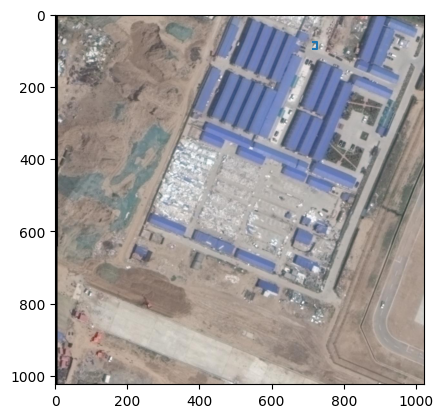

In [110]:
x=[]
y=[]
for i in range(0,len(xy)):
    x.append(xy[i][0])
    y.append(xy[i][1])
plt.figure()
plt.imshow(img)
plt.plot(x,y)
plt.show()

In [140]:
import cv2
import numpy as np

# 读取灰度图像
image = cv2.imread('/home/wzy/ultralytics/data/SAMRS/gray/P0000_0005.png', 0)  # 加载灰度图像
thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)[1]  # 二值化处理

# 寻找对象轮廓
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 获取边界框坐标并存储到列表中
bounding_boxes = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    bounding_boxes.append([x, y, x + w, y + h])  # COCO 格式的边界框坐标 [x1, y1, x2, y2]

# 将边界框坐标转换为一维列表
flatten_boxes = [coord for box in bounding_boxes for coord in box]

# 打印边界框坐标列表
print(flatten_boxes)


error: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/contours.cpp:195: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


In [10]:
from shapely.geometry import Polygon

# 创建一个矩形Polygon对象
poly = Polygon([(0, 0), (0, 1), (1, 1), (1, 0)])

print(type(poly))  # 输出：<class 'shapely.geometry.polygon.Polygon'>
simplified_poly = poly.simplify(0.5, preserve_topology=False)

print(type(simplified_poly))  # 输出：<class 'shapely.geometry.multipolygon.MultiPolygon'>

<class 'shapely.geometry.polygon.Polygon'>
<class 'shapely.geometry.polygon.Polygon'>


In [6]:
image_path = '/home/wzy/ultralytics/tools/SAMRS_data_deal/TRY/P0541_0001.png'
img=Image.open(image_path)
img=np.array(img)